In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For examalignple, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/defaultonpaymentdata/UCI_Credit_Card.csv
/kaggle/input/creditcardfaultdata/creditcard_2023.csv


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio; pio.renderers.default = "kaggle"
import warnings; warnings.filterwarnings("ignore")

pd.set_option('display.max_column', None)

%matplotlib inline

In [7]:
## Reading the data stored in .csv file as dataframe for credit_card_fault
file_path = "/kaggle/input/creditcardfaultdata/creditcard_2023.csv"
data_fraud = pd.read_csv(file_path).drop(columns=["id"], axis=1)

print(f"shape of the feature stored data: {data_fraud.shape}\n")
data_fraud.head()

shape of the feature stored data: (568630, 30)



V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.130006  0.727159  0.637735 -0.987020  0.293438 -0.941386  0.549020   
1 -0.133118  0.347452  0.529808  0.140107  1.564246  0.574074  0.627719   
2 -0.095576 -0.261297  0.690708 -0.272985  0.659201  0.805173  0.616874   
3 -0.065130 -0.205698  0.575231 -0.752581  0.737483  0.592994  0.559535   
4 -0.212660  1.049921  0.968046 -1.203171  1.029577  1.439310  0.241454   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.804879  0.215598  0.512307  0.333644  0.124270  0.091202 -0.110552   
1  0.706121  0.789188  0.403810  0.201799 -0.340687 -0.233984 -0.194936   
2  3.069025 -0.577514  0.886526  0.239442 -2.366079  0.361652 -0.005020   
3 -0.697664 -0.030669  0.242629  2.178616 -1.345060 -0.378223 -0.146927   
4  0.153008  0.224538  0.366466  0.291782  0.445317  0.247237 -0.106984   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.217606 -0.134794  0.165959  0.126280 -0.434824 -0.081230 -0.151045   
1 -0.605761  0.079469 -0.577395  0.190090  0.296503 -0.248052 -0.064512   
2  0.702906  0.945045 -1.154666 -0.605564 -0.312895 -0.300258 -0.244718   
3 -0.038212 -0.214048 -1.893131  1.003963 -0.515950 -0.165316  0.048424   
4  0.729727 -0.161666  0.312561 -0.414116  1.071126  0.023712  0.419117   

     Amount  Class  
0  17982.10      0  
1   6531.37      0  
2   2513.54      0  
3   5384.44      0  
4  14278.97      0

In [3]:
def sevemSigma(df: pd.DataFrame):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    ## Display the shape of the datset
    print(f"\nShape of the feature store dataset: {df.shape}\n")
    
    ## Display a sample of dataset
    print("\nSamples of records from the dataset:\n")
    display(df.sample(5).style.background_gradient(cmap="Blues"))
    
    ## Display general information about the dataset
    print("\nInformation about the dataset:\n")
    display(df.info())
    
    ## Display descriptive statistics for numerical columns
    print("\nDescription of the dataset for numerical column:\n")
    display(df.describe().style.background_gradient(cmap="Blues"))
    
    ## Display number of unique values for each columns
    print(f"\nUnique values within the entire dataset:\n{df.nunique()}\n")
    
    ## Display the percentage of null values for dataset
    print(f"\nNull values within entire the datset: {df.isnull().sum().sum() / (df.shape[0] * (df.shape[1]-1)) * 100:.2f} %\n")
    
    ## Display the duplicated rows in the dataset
    print("\nDuplicated rows in the dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap="Blues"))
    

In [24]:
sevemSigma(data_fraud)


Shape of the feature store dataset: (568630, 30)


Samples of records from the dataset:




Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 

None


Description of the dataset for numerical column:




Unique values within the entire dataset:
V1        552035
V2        552035
V3        552035
V4        552035
V5        552035
V6        552035
V7        552035
V8        552035
V9        552035
V10       552035
V11       552035
V12       552035
V13       552035
V14       552035
V15       552035
V16       552035
V17       552035
V18       552035
V19       552035
V20       552035
V21       552035
V22       552035
V23       552035
V24       552035
V25       552035
V26       552035
V27       552035
V28       552035
Amount    506485
Class          2
dtype: int64


Null values within entire the datset: 0.00 %


Duplicated rows in the dataset:


**There is only one duplicate row so no need to delete it.**

**No missing or null values are there in the dataset.**

In [6]:
## Let's visualize the distribution of the data related to each tag
from collections import Counter

all_tags = Counter(data_fraud.Class)
all_tags.most_common()

[(0, 284315), (1, 284315)]

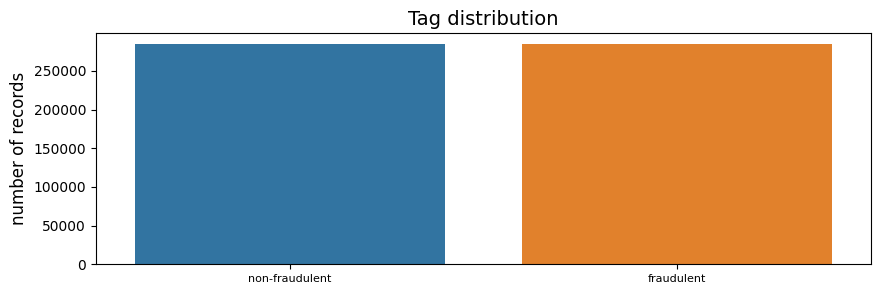

In [7]:
## Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(["non-fraudulent", "fraudulent"], rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("number of records", fontsize=12)
plt.show()

**There is no such problem regarding the imbalanced data.**

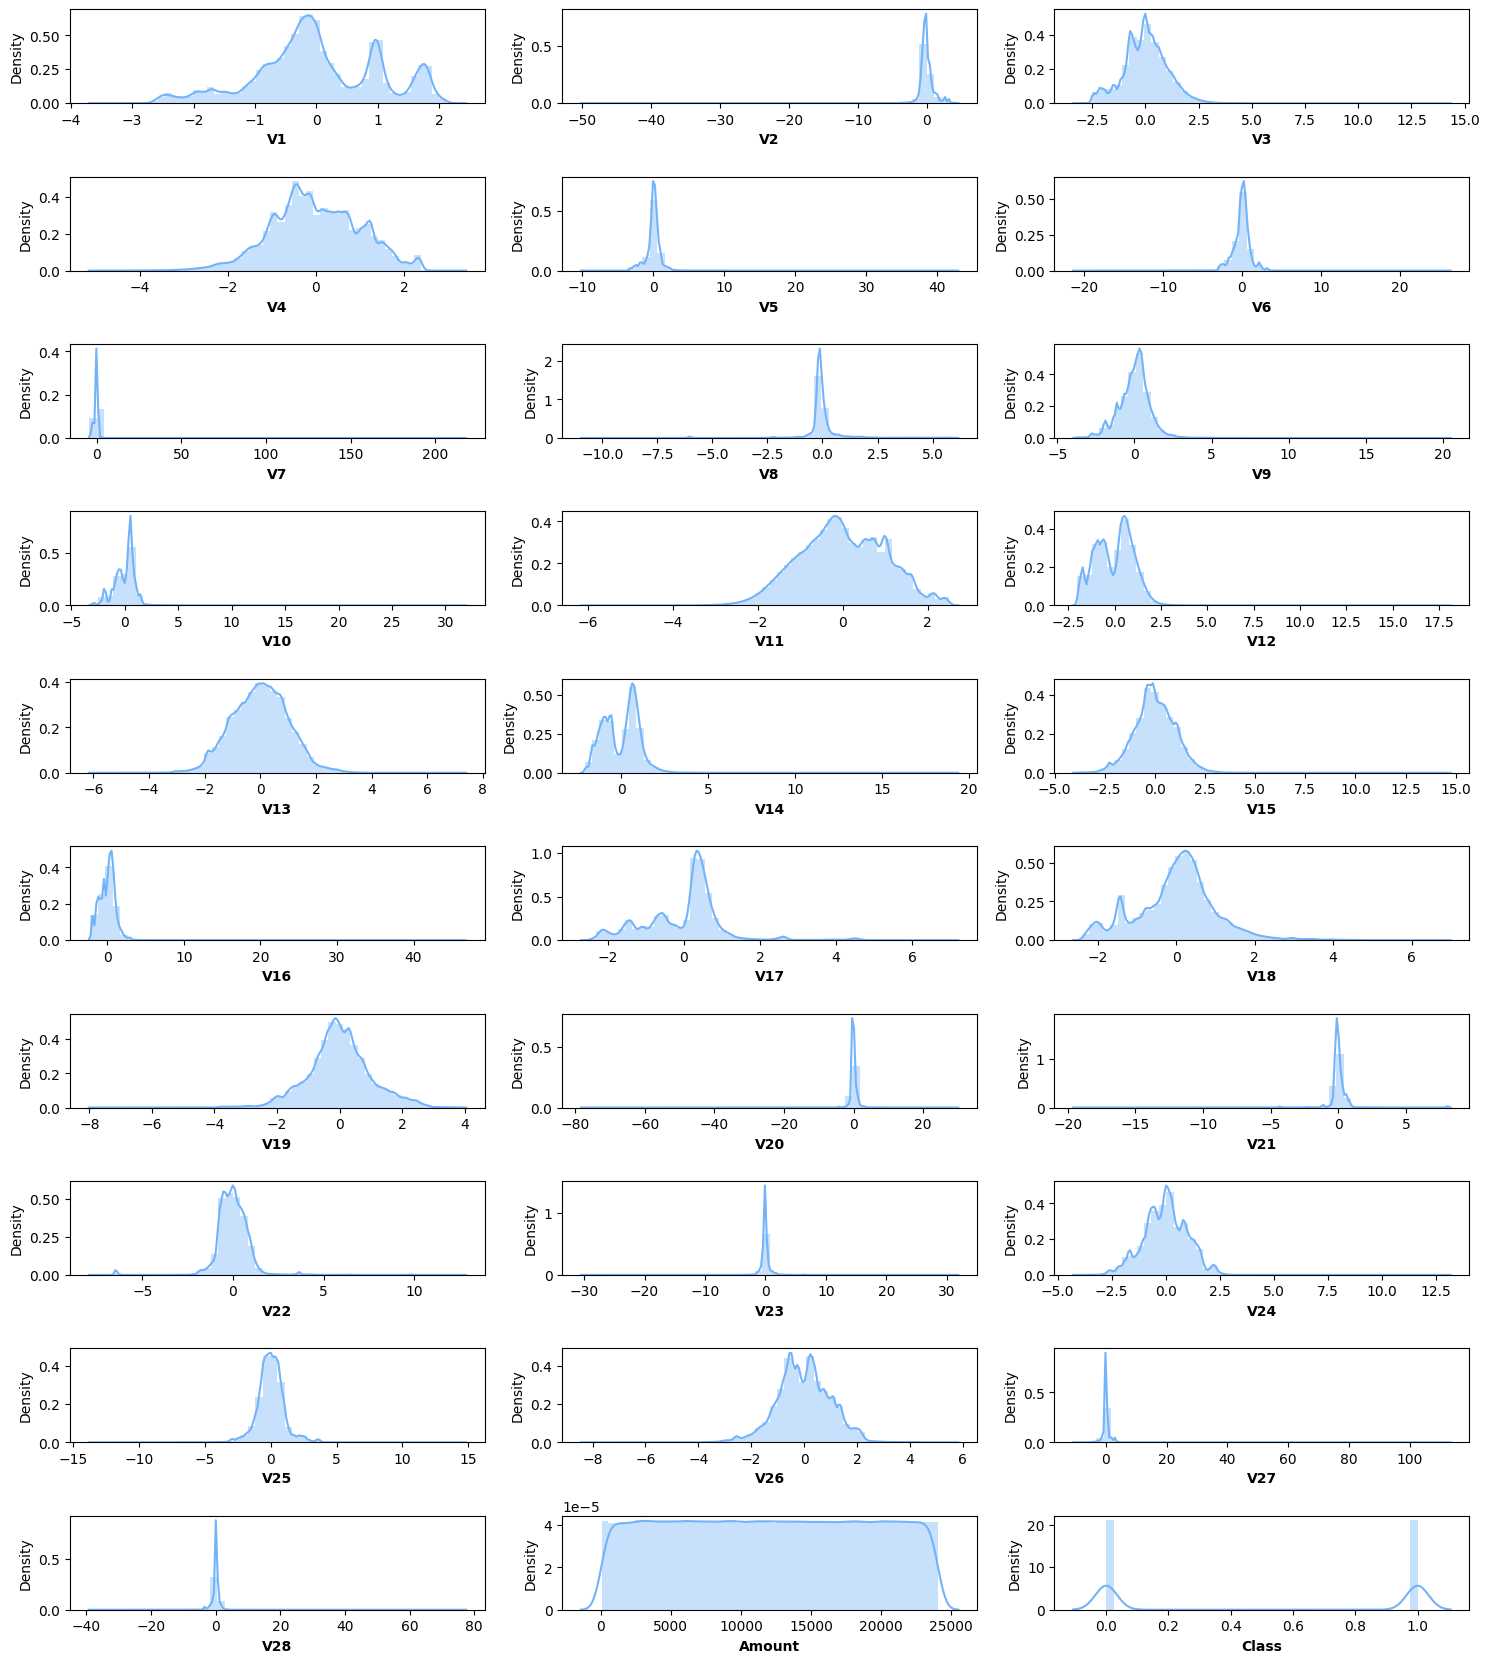

In [8]:
plt.figure(figsize = (15, 100))

for i, col in enumerate(data_fraud.columns):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=data_fraud[col], color='#73b3f9')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

**Not all the distribution are normal. we're gonna handle them by using various data transformation methods.**

In [120]:
## Getting the features having zero std
def get_zero_std_features(df: pd.DataFrame):
    
    """Return a list of columns having std zero"""
    
    cols_to_drop = []
    cols_name = [col for col in df.columns if df[col].dtype != 'O']
    
    for col in cols_name:
        if df[col].std() == 0:
            cols_to_drop.append(col)
            
    return cols_to_drop

In [10]:
cols_to_drop = get_zero_std_features(data_fraud)
print(f"There are {len(cols_to_drop)} features having zero std value.")

There are 0 features having zero std value.


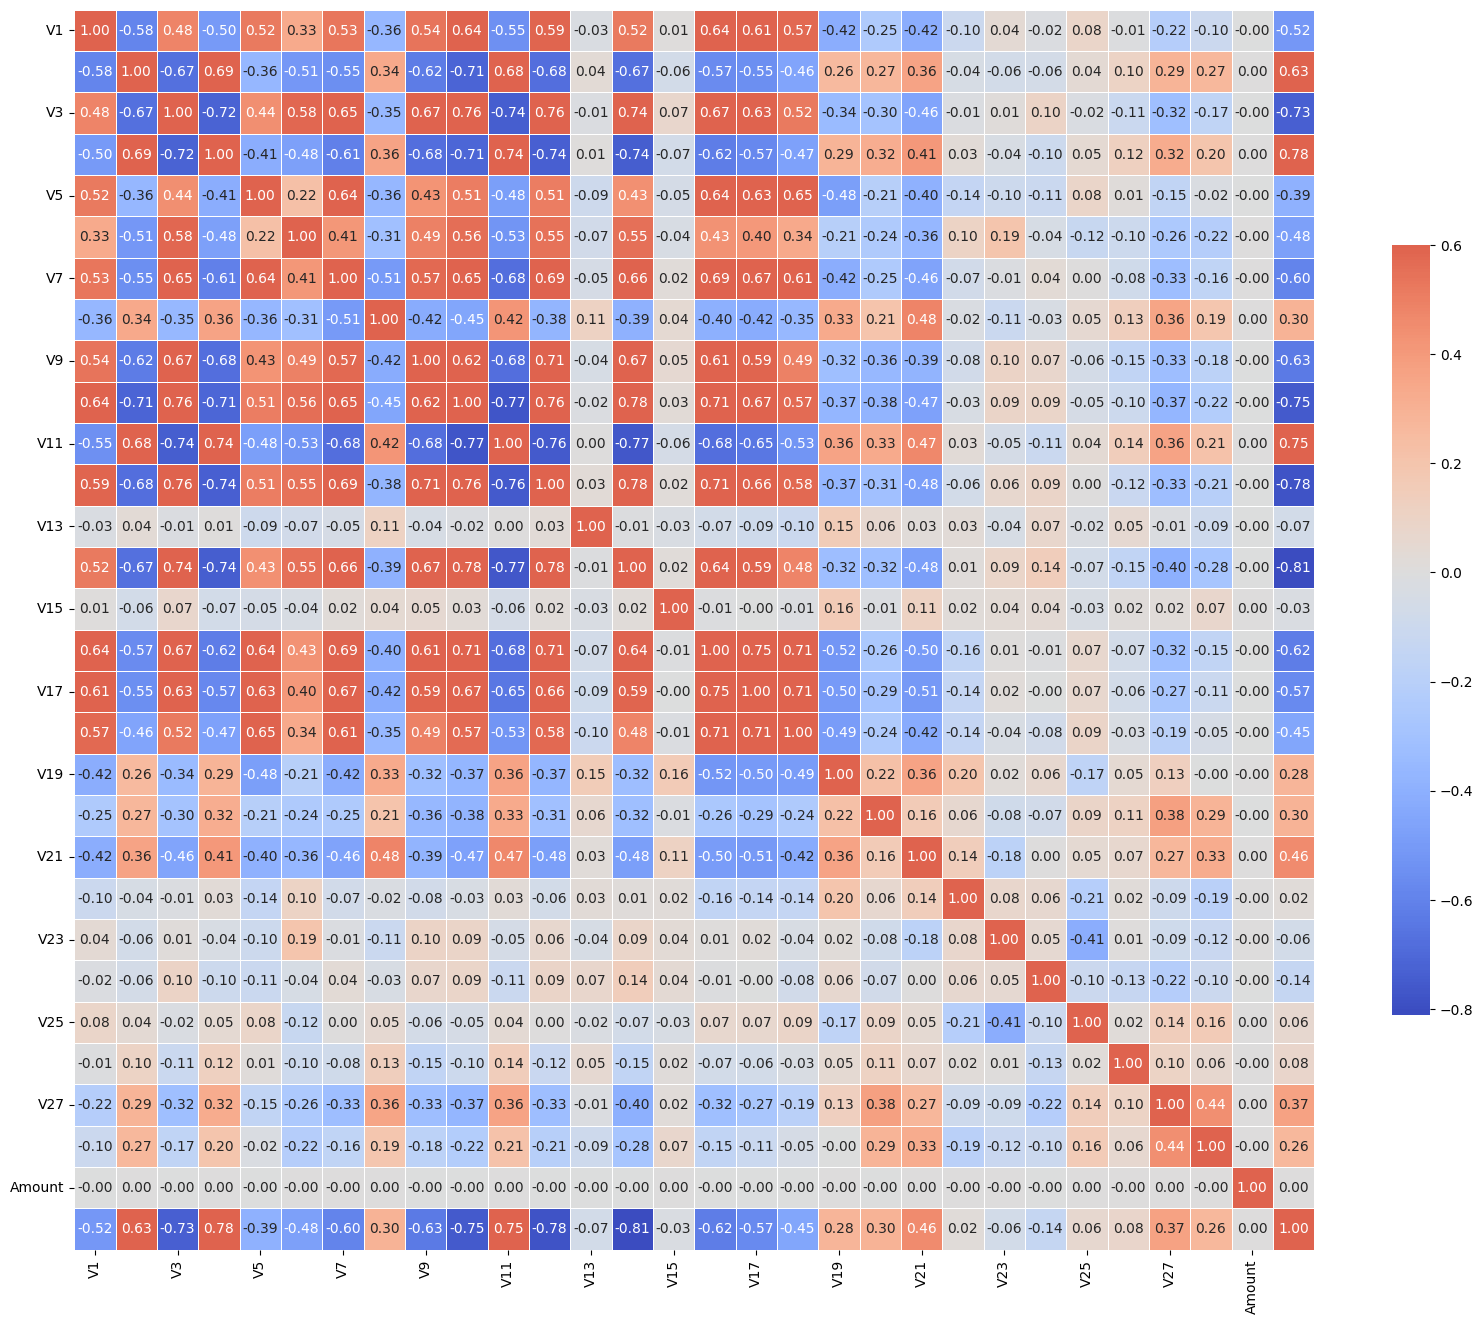

In [14]:
## Checking the correlation between each features
corr_df = data_fraud.corr(method="spearman")

g = sns.heatmap(corr_df, vmax=.6, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f", cmap="coolwarm")
g.figure.set_size_inches(20,20)

plt.show()

In [36]:
def find_high_correlations(df, threshold=0.90, exclude_column=None):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than threshold
    high_corr = [(upper.index[i], upper.columns[j], upper.iloc[i, j])
                 for i in range(len(upper.index))
                 for j in range(len(upper.columns))
                 if upper.iloc[i, j] > threshold]

    # Sort by correlation value
    high_corr.sort(key=lambda x: x[2], reverse=True)

    # Remove pairs involving the excluded column
    if exclude_column:
        high_corr = [pair for pair in high_corr if exclude_column not in pair]

    return high_corr

highly_correlated_features = find_high_correlations(data_fraud, threshold=0.90, exclude_column='Class')

if len(highly_correlated_features) == 0:
    print(f"There is no features pairs having correlation > 0.90")
else:
    print("Highly correlated feature pairs (correlation > 0.90):")
    for feat1, feat2, corr in highly_correlated_features:
        print(f"{feat1} - {feat2}: {corr:.2f}")

There is no features pairs having correlation > 0.90


In [12]:
## Correlation of each feature with respect to dependent feature "Class"
data_fraud.corr(method="spearman")["Class"].sort_values()

V14      -0.810303
V12      -0.779501
V10      -0.754268
V3       -0.734373
V9       -0.632380
V16      -0.618732
V7       -0.596388
V17      -0.571833
V1       -0.515954
V6       -0.476268
V18      -0.451667
V5       -0.393023
V24      -0.136682
V13      -0.066306
V23      -0.062283
V15      -0.026760
Amount    0.002261
V22       0.019081
V25       0.059838
V26       0.079475
V28       0.264503
V19       0.279498
V20       0.295228
V8        0.296481
V27       0.365438
V21       0.461828
V2        0.634777
V11       0.754951
V4        0.778862
Class     1.000000
Name: Class, dtype: float64

**We can drop certain features because they don't have the high correlation with the target feature.**

**But we're not gonna drop them because they might have a non-linear relation ship with the target feature which is not being captured by correlation.**

In [19]:
## removing the features not having high correlation with dependent feature
# cols_to_drop = ["V13", "V23", "V15", "V22", "V25", "V26", "V24", "V28", "V19"]

# data_fraud.drop(columns=cols_to_drop, axis=1, inplace=True)

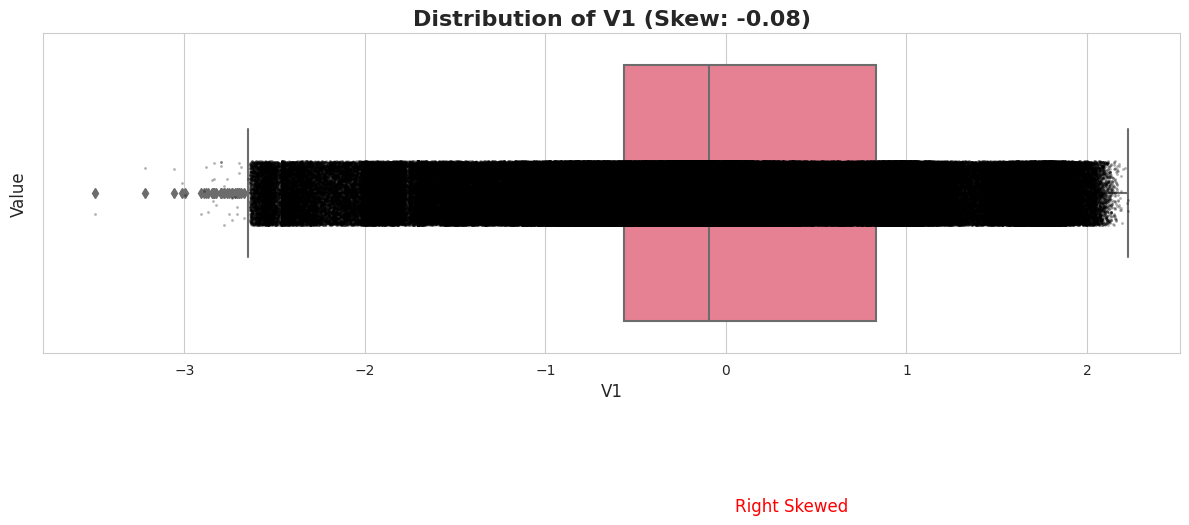

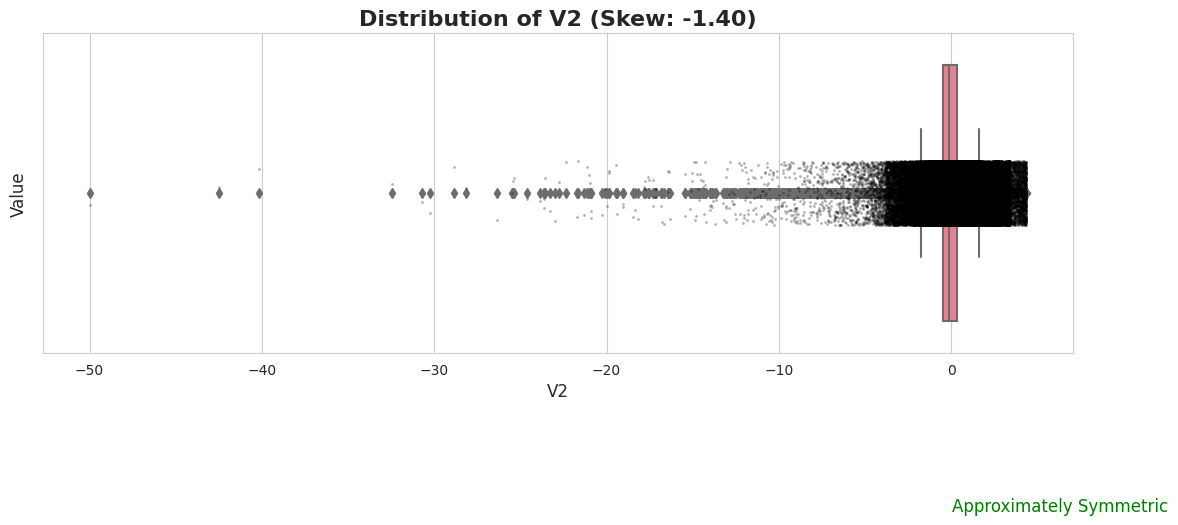

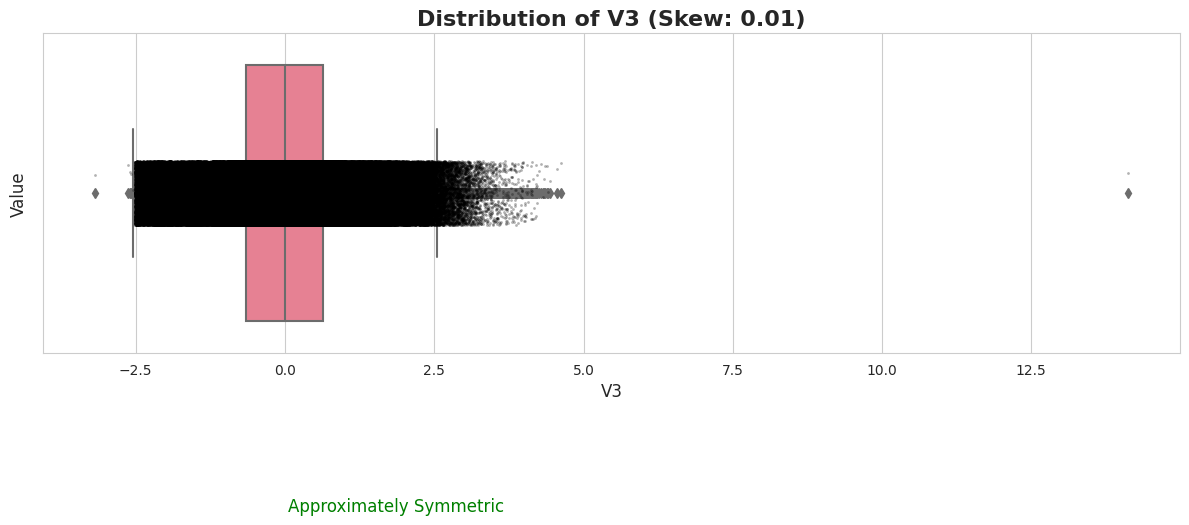

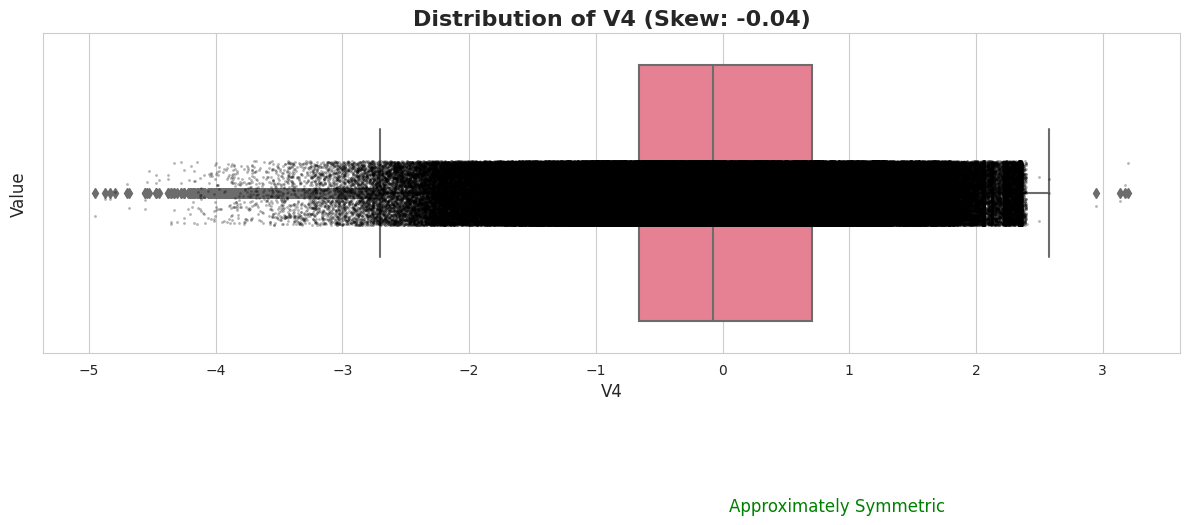

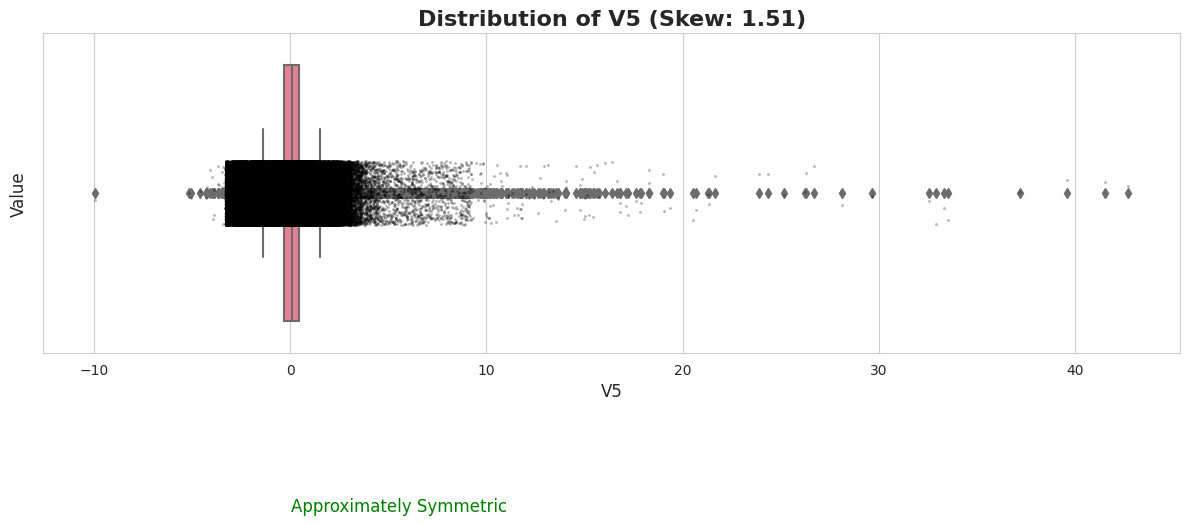

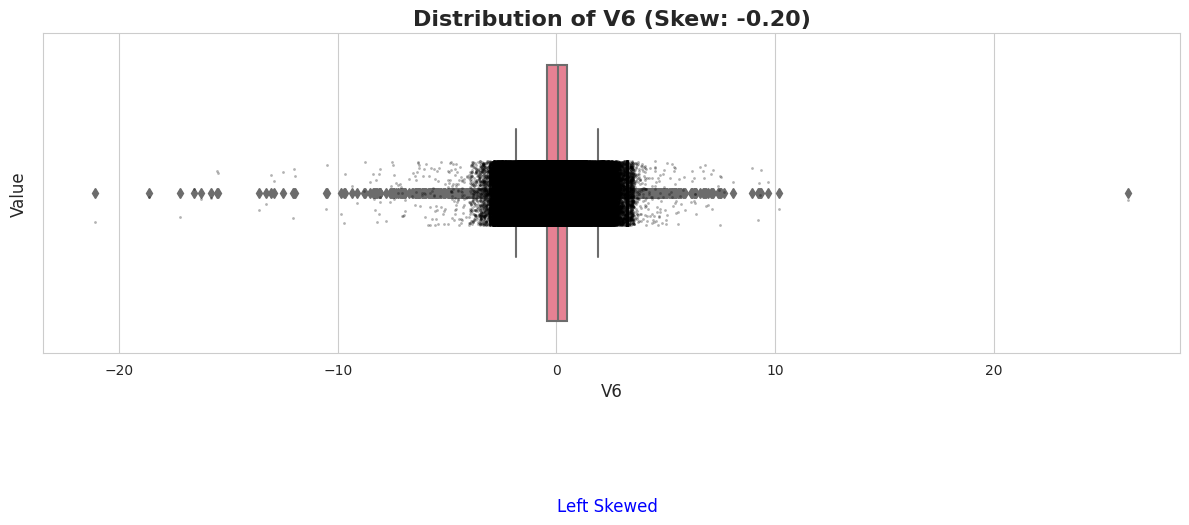

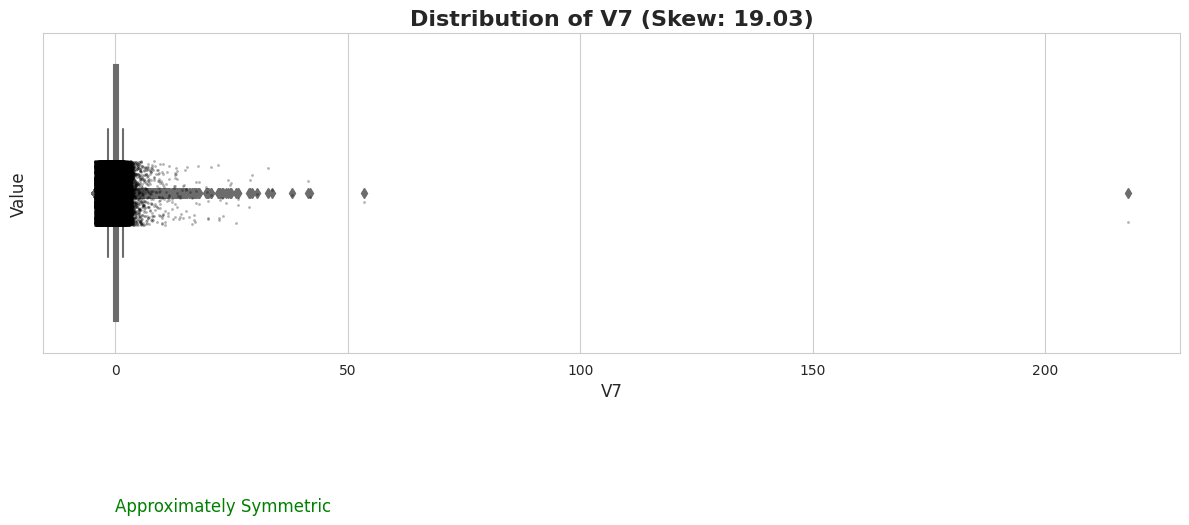

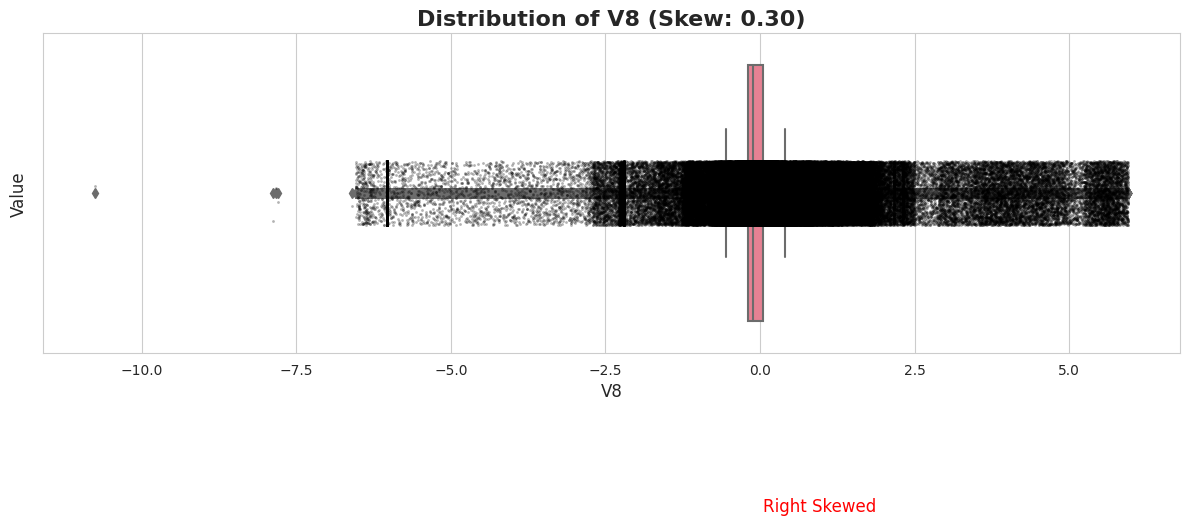

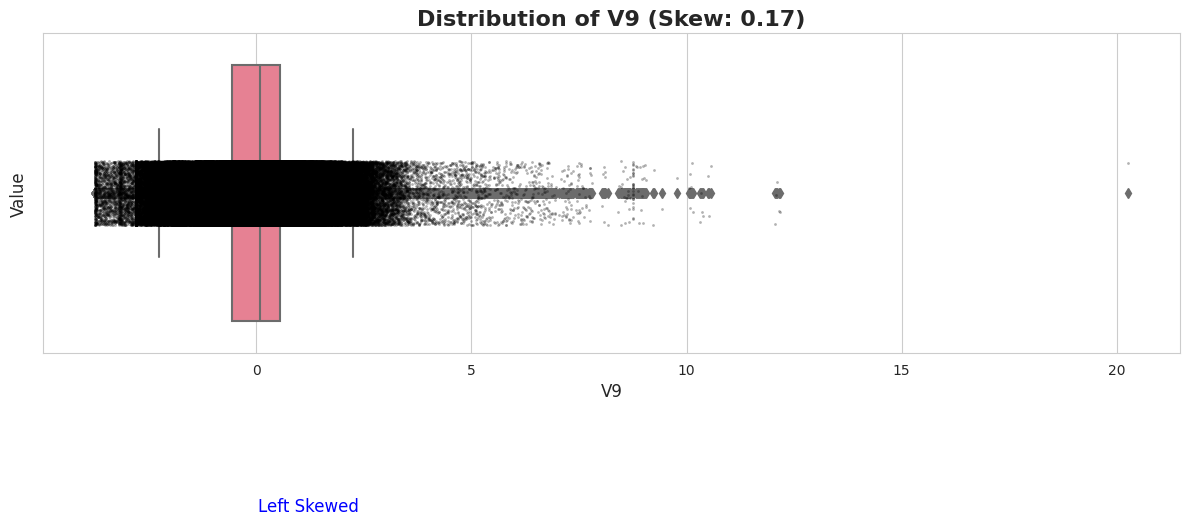

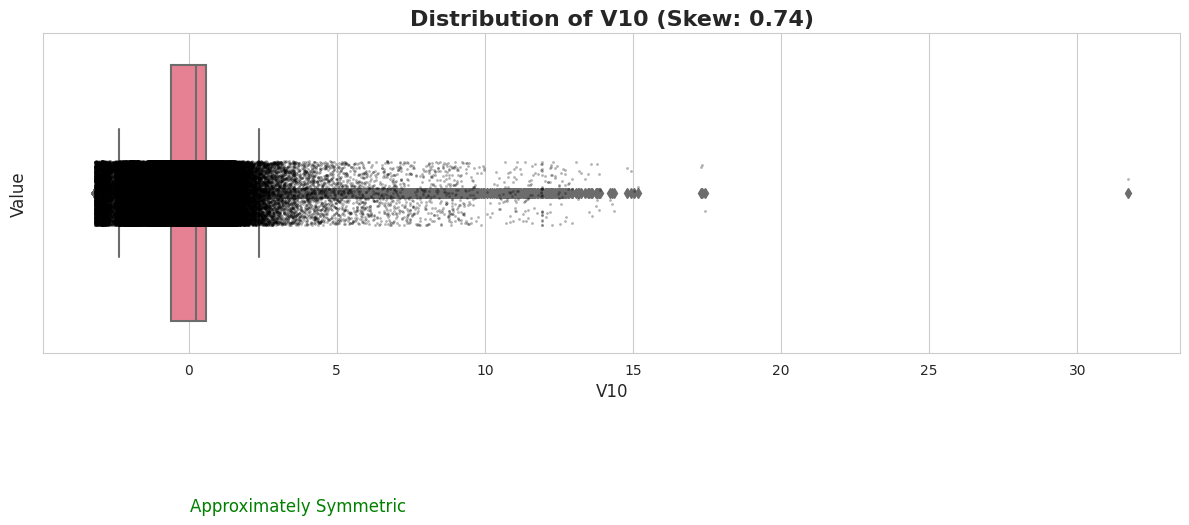

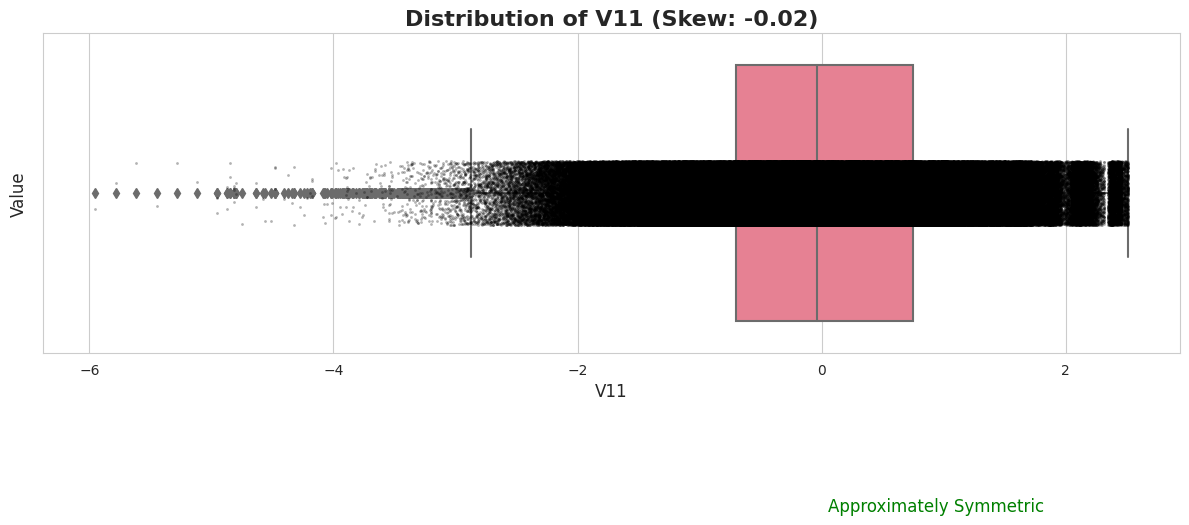

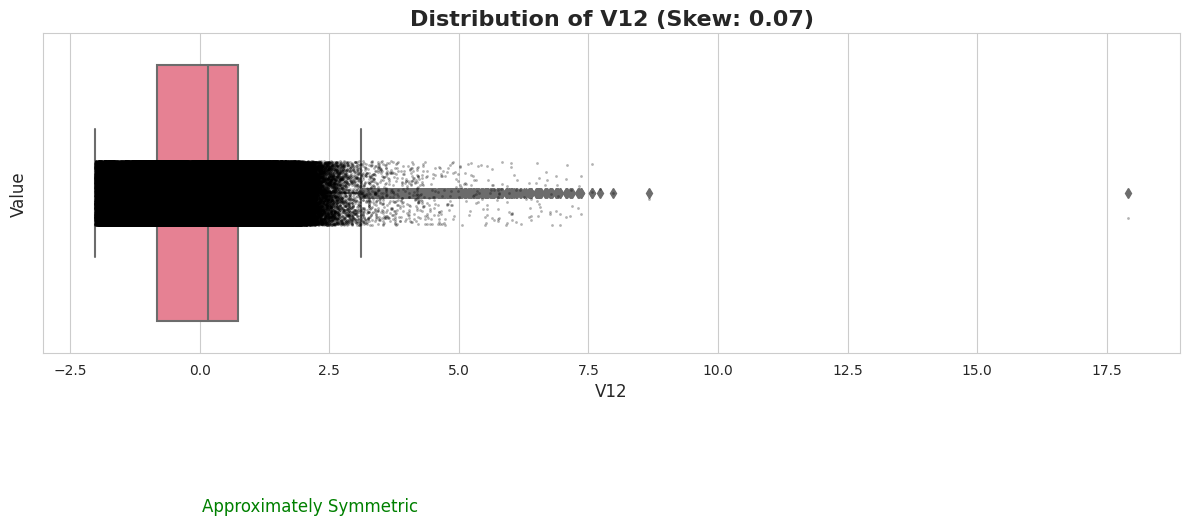

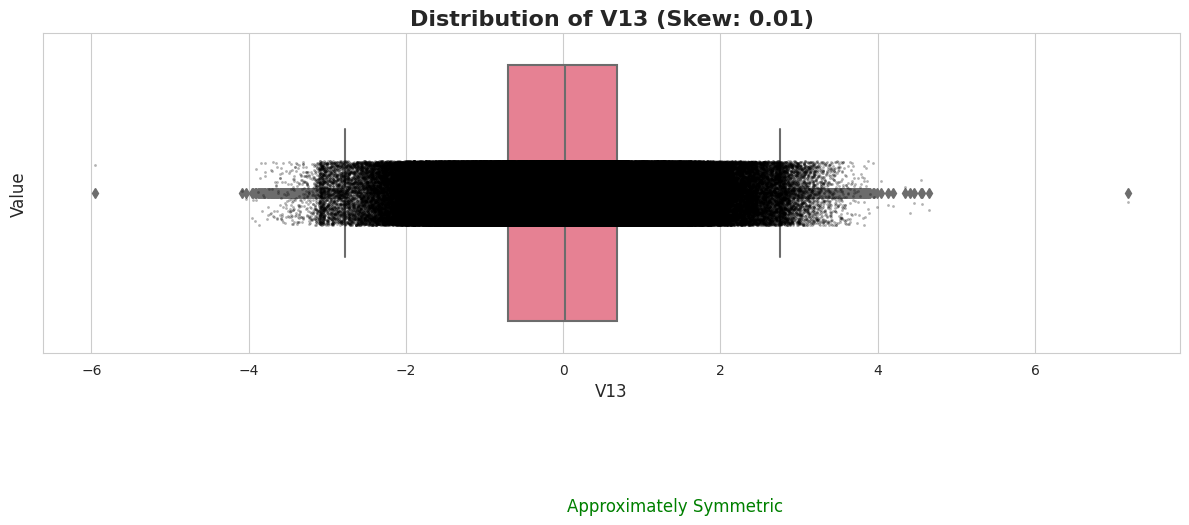

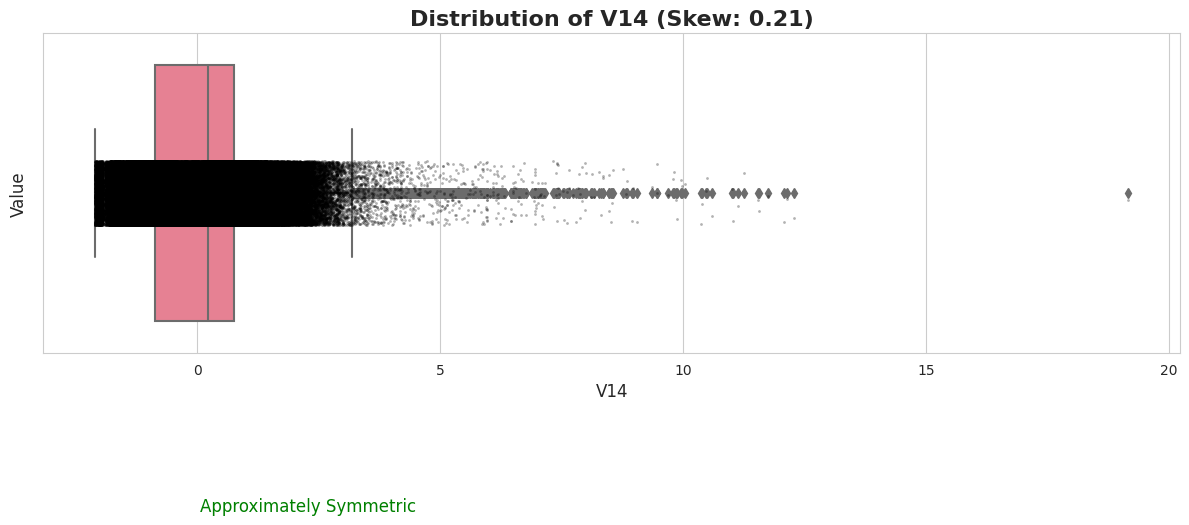

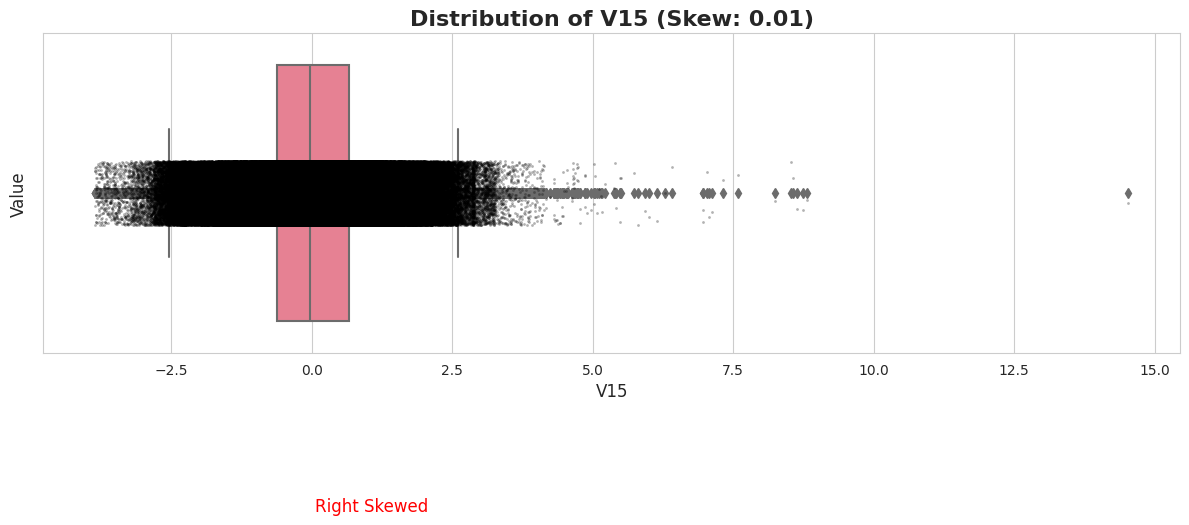

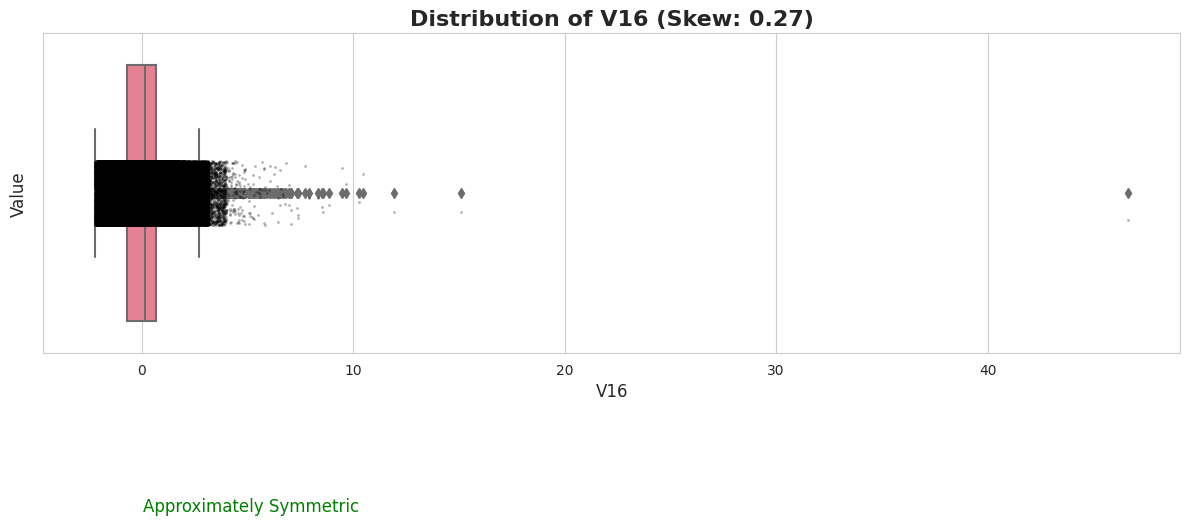

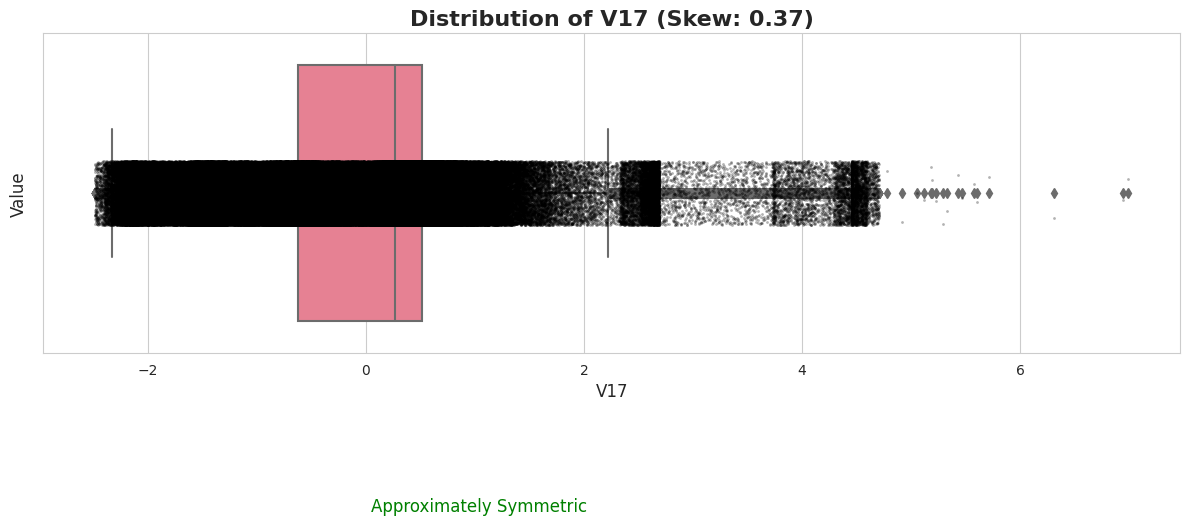

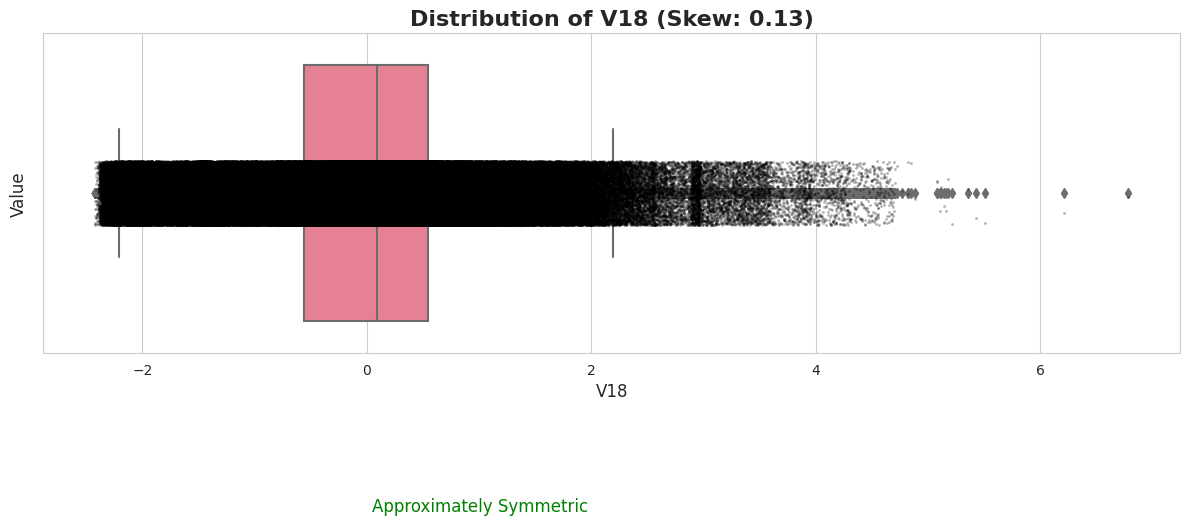

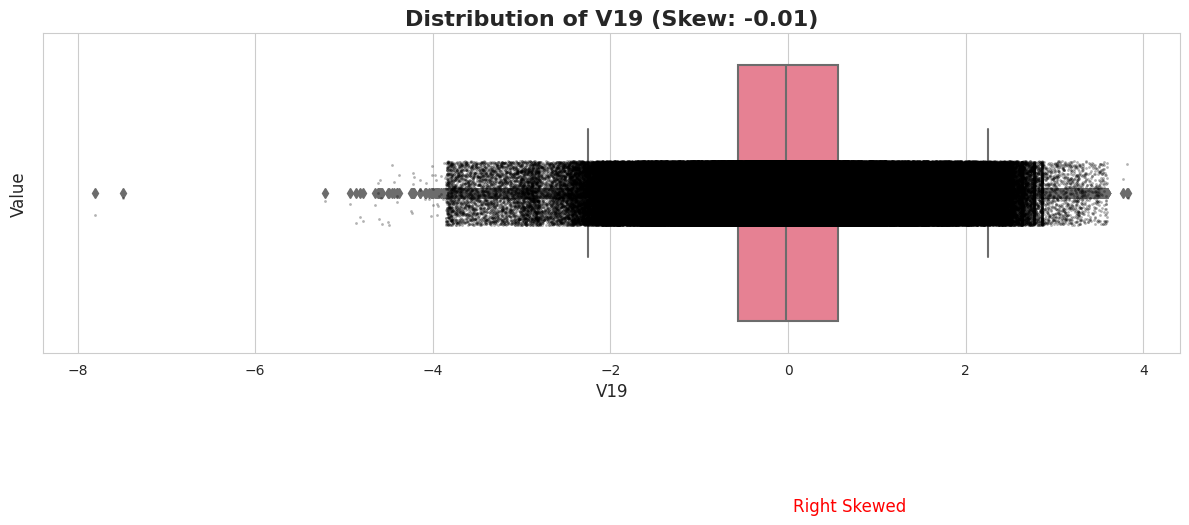

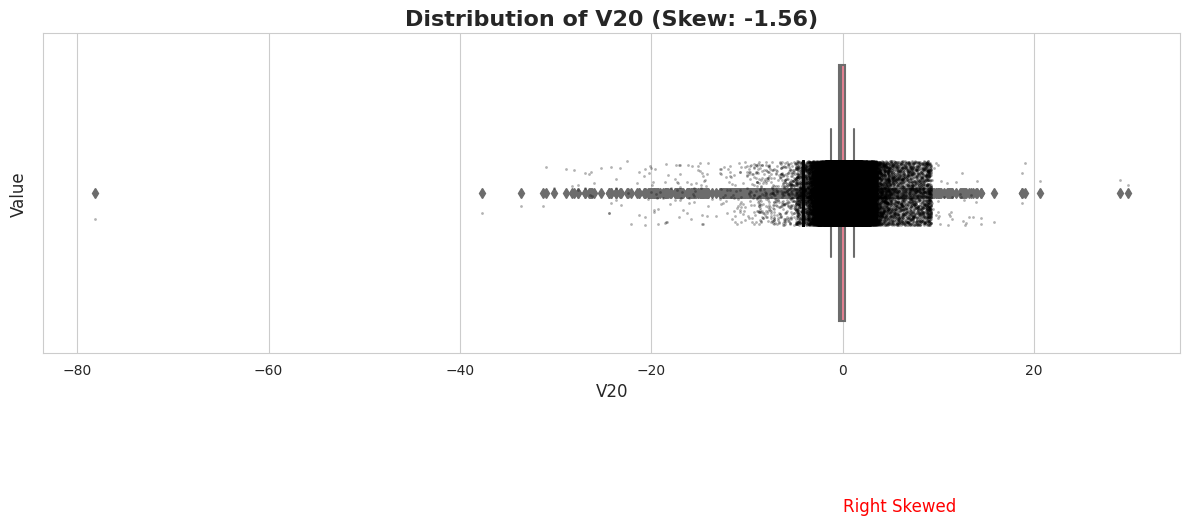

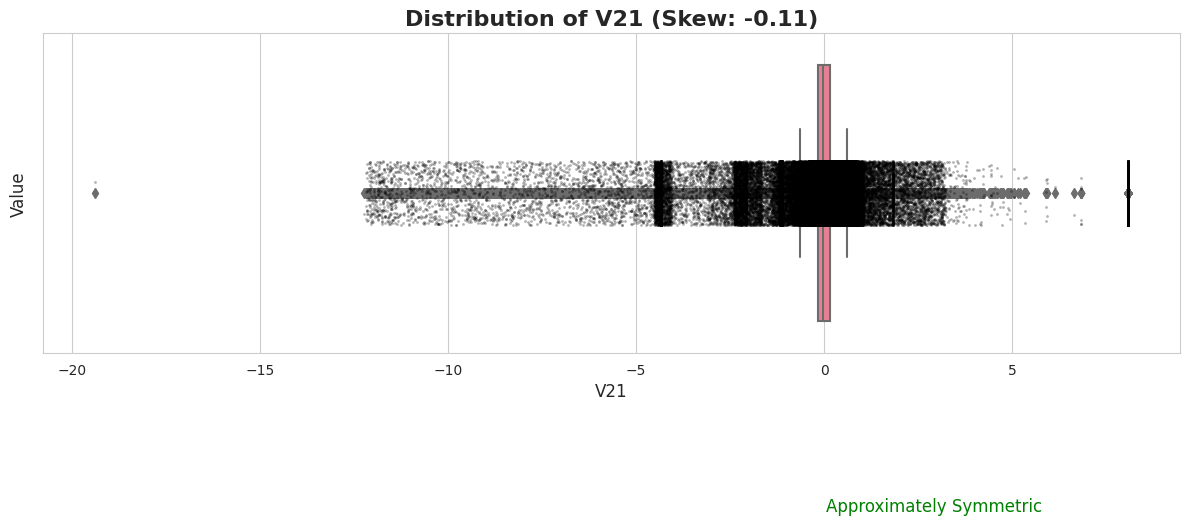

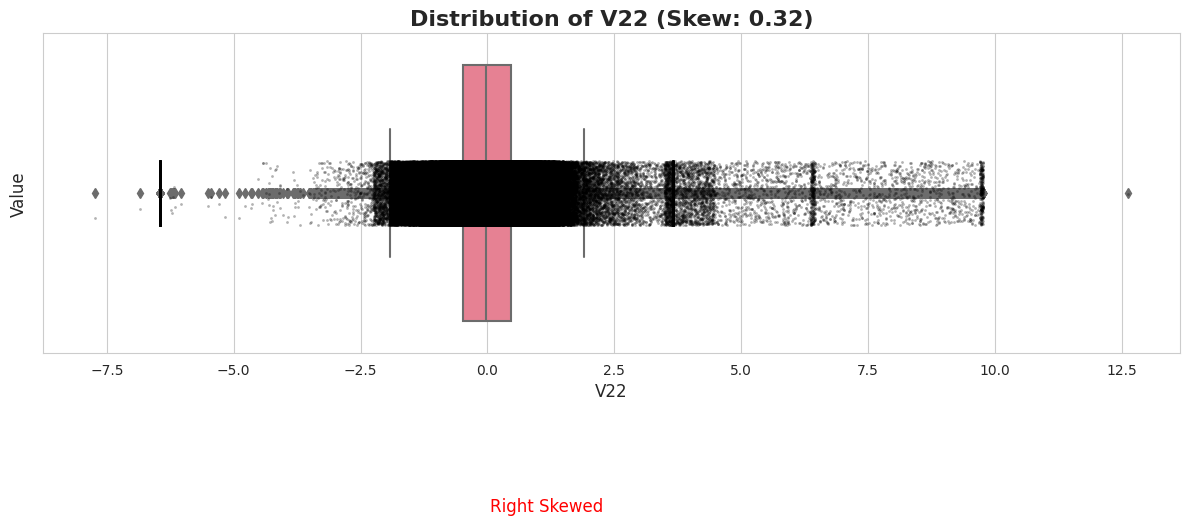

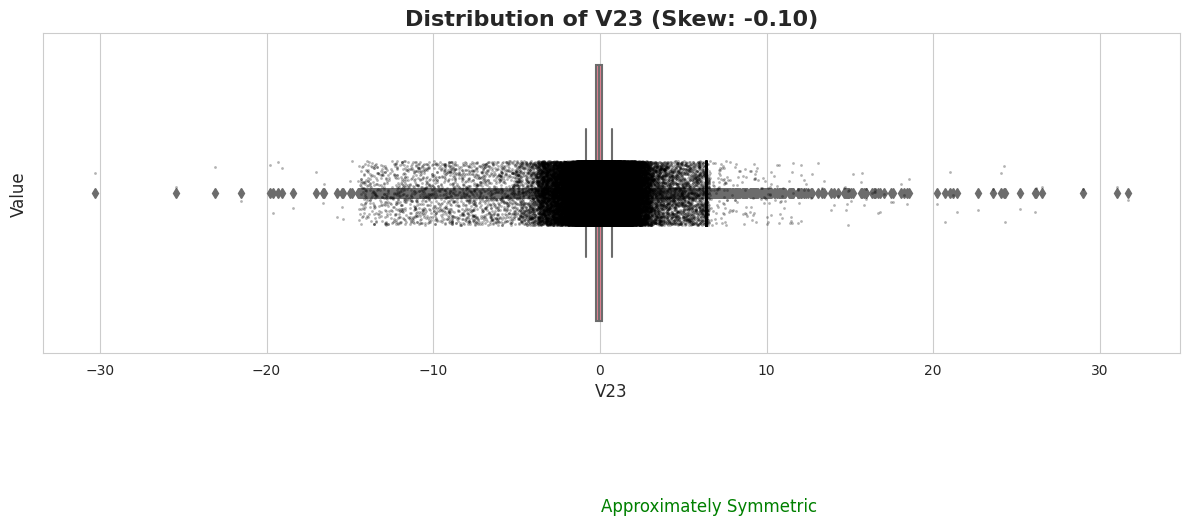

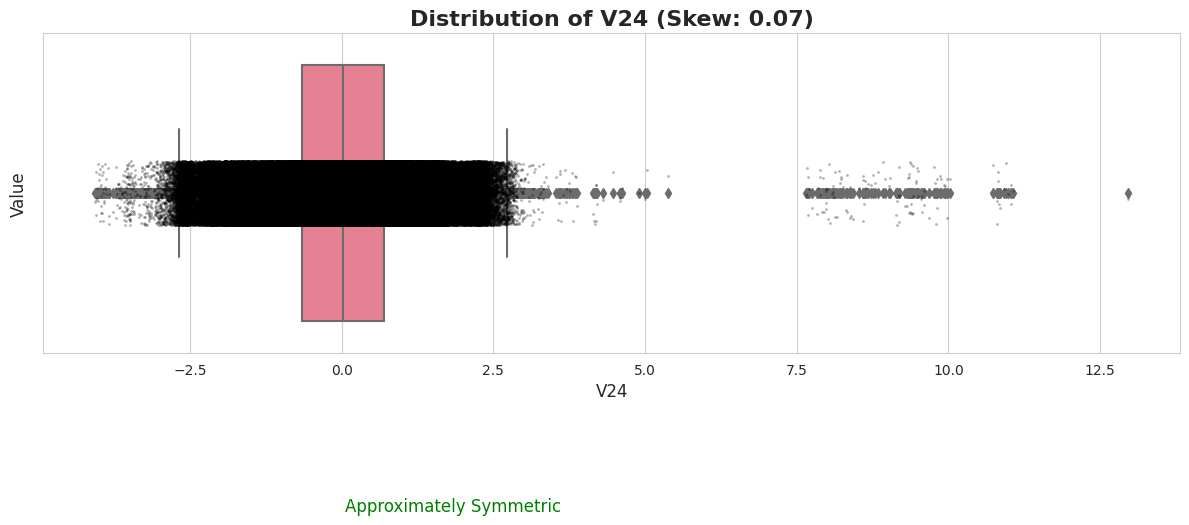

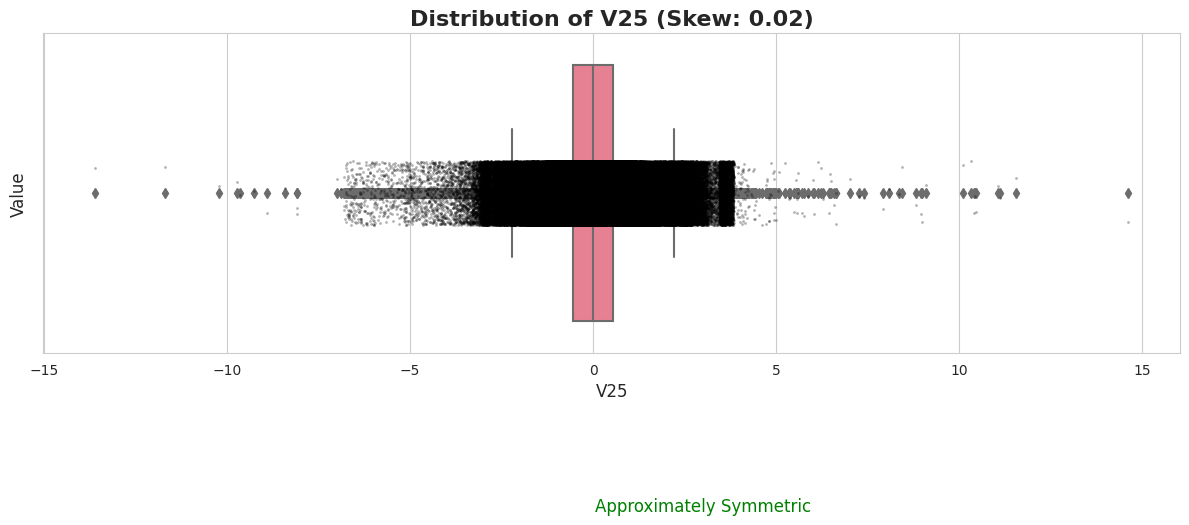

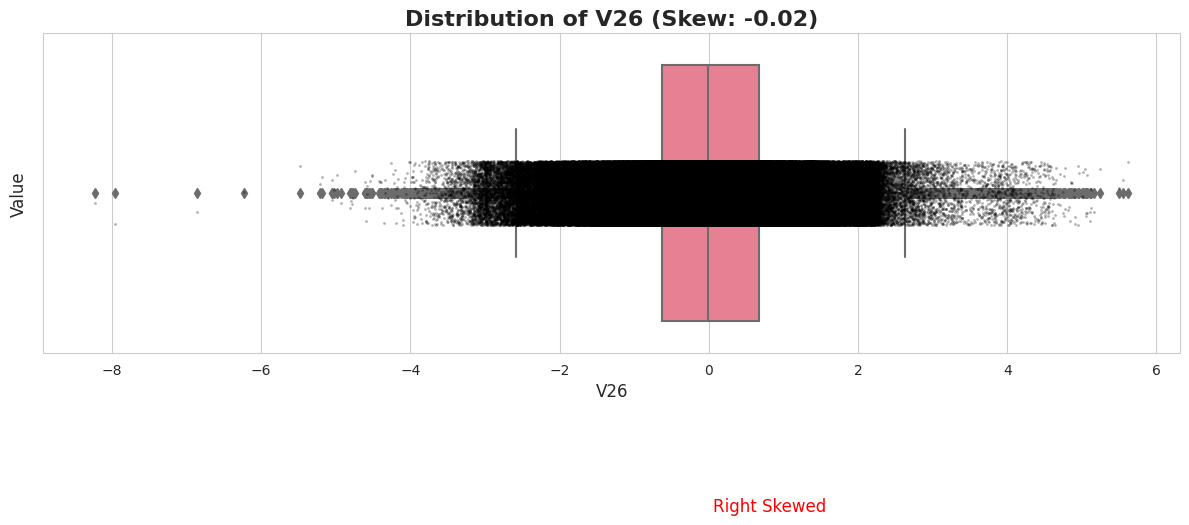

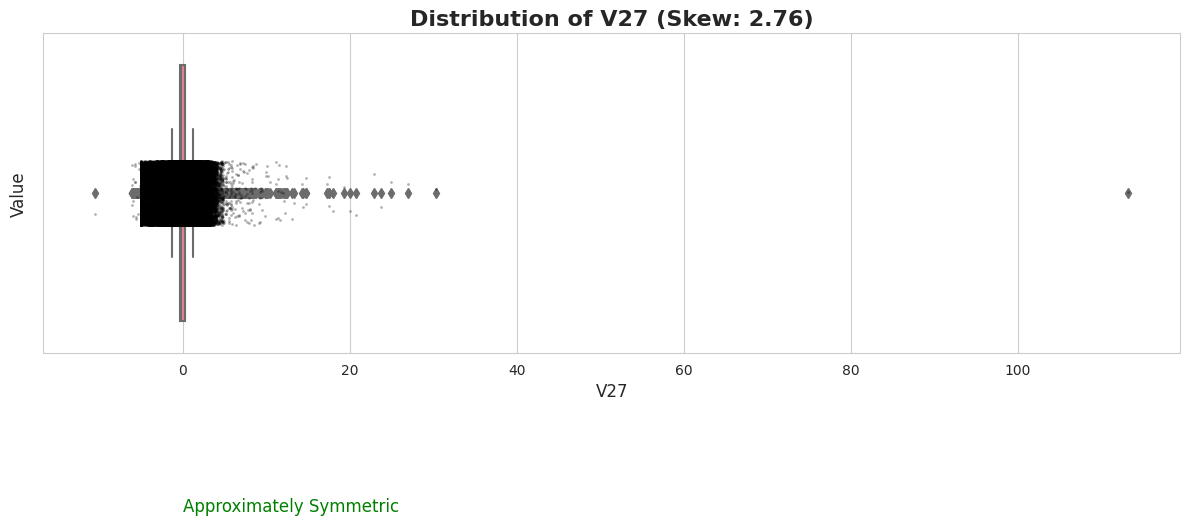

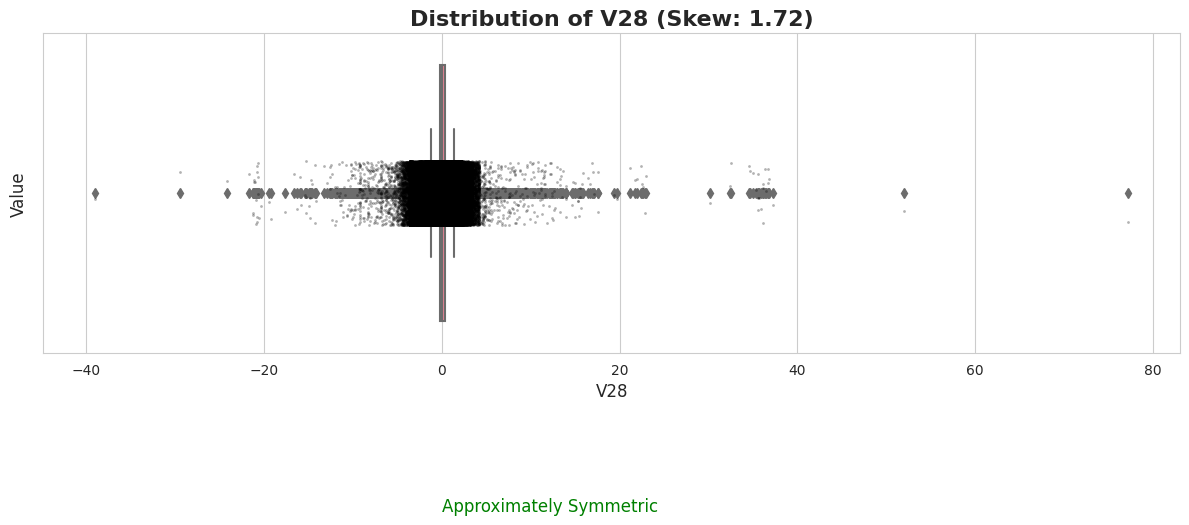

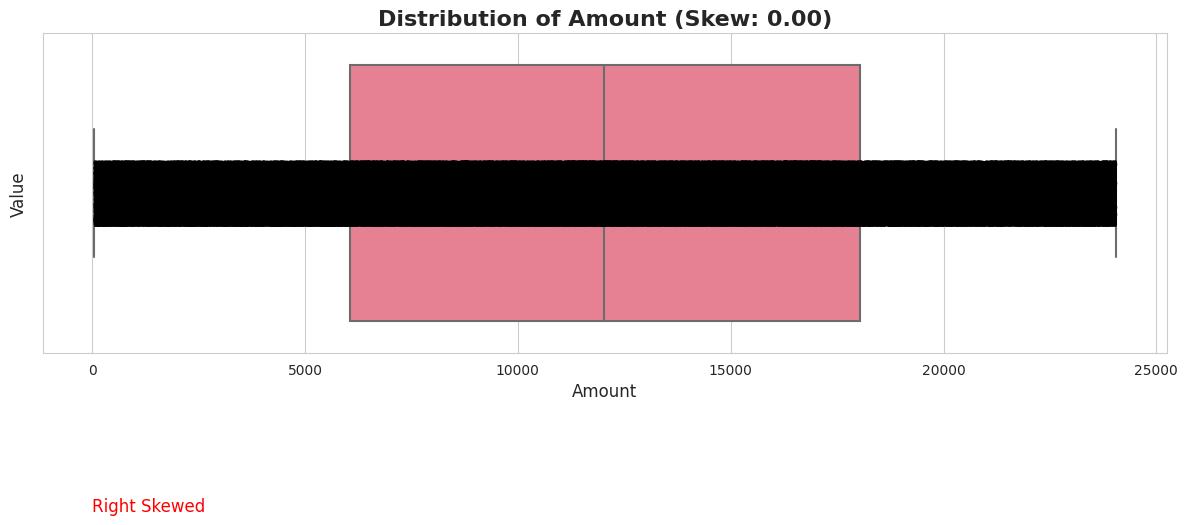

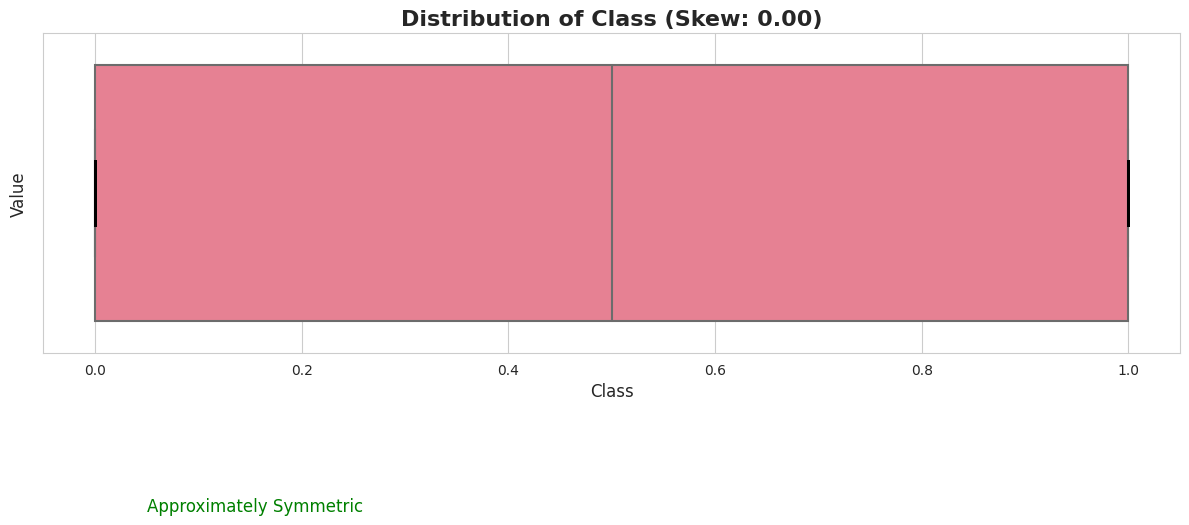

In [4]:
## Checking for the outliers in the data

import pandas as pd
import seaborn as sns
import numpy as np

# Improved checking_for_outliers function with skewness detection
def checking_for_outliers(df: pd.DataFrame, skew_features):
  # Set the style for seaborn
  sns.set_style("whitegrid")

  # Create a color palette
  colors = sns.color_palette("husl", 8)

  # Iterate through numeric columns
  for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(12, 6))

    # Create boxplot
    sns.boxplot(x=df[col], color=colors[0])

    # Calculate statistics for skewness detection
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().iloc[0]  # Assuming single mode

    # Title with skew indicator
    skew_text = f"Skew: {df[col].skew():.2f}"
    plt.title(f"Distribution of {col} ({skew_text})", fontsize=16, fontweight='bold')

    # Label axes
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Value', fontsize=12)

    # Add strip plot
    sns.stripplot(x=df[col], color='black', size=2, alpha=0.3)

    # Skew interpretation based on mean, median, mode
    if mean > median > mode:
      plt.text(0.05, 0.95, "Right Skewed", ha='left', va='top', fontsize=12, color='red')
      skew_features.append(col)
    elif mean < median < mode:
      plt.text(0.05, 0.95, "Left Skewed", ha='left', va='top', fontsize=12, color='blue')
      skew_features.append(col)
    else:
      plt.text(0.05, 0.95, "Approximately Symmetric", ha='left', va='top', fontsize=12, color='green')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
  return skew_features

skewed_features = checking_for_outliers(data_fraud, list())

In [6]:
skewed_features

['V1', 'V6', 'V8', 'V9', 'V15', 'V19', 'V20', 'V22', 'V26', 'Amount']

**There are certain skewed features for which we can apply log transformation or Box-cox transformation.**

### Splitting the dataset into train, validation and holdout data

In [8]:
from sklearn.model_selection import train_test_split

test_size = 0.3
train_data, test_data = train_test_split(data_fraud, stratify=data_fraud.Class, 
                                         test_size=test_size, random_state=30)

In [9]:
## Making sure that the split are having equal number of data with repsect to each class
train_data.Class.value_counts()

Class
0    199021
1    199020
Name: count, dtype: int64

In [10]:
test_data.Class.value_counts() * int((1 - test_size) / test_size)

Class
1    170590
0    170588
Name: count, dtype: int64

In [11]:
test_data.sample(5)

V1        V2        V3        V4        V5        V6        V7  \
39302   0.991134 -0.376767  0.254947 -0.302182  0.584835  0.711669  0.533322   
157467 -0.134955 -0.286062  2.413743 -1.187134  0.441121  0.261272  0.600633   
475434 -0.919764 -0.236563 -0.756051  0.022567  0.116434  0.202580 -0.523574   
116420 -0.201860 -0.829180  1.000442 -1.229929  0.560448 -1.122742  0.366317   
219327  1.806167 -0.391912 -0.170960 -0.443291  0.550874 -0.049502  0.557072   

              V8        V9       V10       V11       V12       V13       V14  \
39302  -0.123881  0.316367  0.690992 -0.492476  0.588862 -1.055117  1.358023   
157467 -0.161259  1.649880  0.137236  0.195604 -0.253781  0.522817  1.930261   
475434 -0.289918 -0.806979 -0.783868  0.215662 -0.746403 -1.168732 -0.261136   
116420 -0.228447 -0.160645  0.819992 -0.715400  0.738758  0.524017  0.774595   
219327 -0.208686  0.778287  0.432069 -1.114316  0.469551 -0.413036  0.337308   

             V15       V16       V17       V18       V19       V20       V21  \
39302   0.487875  0.671072  0.230026  0.291976  0.031583 -0.307030 -0.239906   
157467 -0.840681  0.762132  0.335591  0.997381 -0.836965 -0.301186 -0.205129   
475434  0.294757 -1.118009 -0.849444 -1.455841 -0.480111 -0.351762 -0.221969   
116420 -0.129634 -0.155714  0.413161  0.472188 -1.343925 -0.829338 -0.345928   
219327  0.220463  0.611104  0.710167  0.215752 -0.213473 -0.329130 -0.205014   

             V22       V23       V24       V25       V26       V27       V28  \
39302  -0.998313 -0.100077 -2.252723  0.796997 -1.371459 -0.245968 -0.109821   
157467 -0.465362 -0.306398 -0.208366  0.532921 -2.579117 -0.389937 -0.506392   
475434  1.410792 -0.227808 -0.436325  1.383535  1.679757  0.891571 -2.332528   
116420 -1.180294  0.432479  2.013417 -2.476258  0.540193 -0.137385  0.604555   
219327 -0.605598  0.177391  0.671626 -0.171004  0.777428 -0.324575 -0.184964   

          Amount  Class  
39302    3611.82      0  
157467   1549.97      0  
475434   2561.21      1  
116420   2593.77      0  
219327  21579.76      0

In [10]:
## getting validation data to help the model improve its hyperparameters
train_data, validation_data = train_test_split(train_data, test_size=0.2, 
                                               stratify=train_data.Class,
                                               random_state=30)

In [11]:
train_data.Class.value_counts()

Class
0    159216
1    159216
Name: count, dtype: int64

In [12]:
validation_data.Class.value_counts() * int((1 - 0.2) / 0.2)

Class
0    159220
1    159216
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cols_to_preprocess = list(train_data.columns[:-1])
cols_to_preprocess = [col for col in cols_to_preprocess if col not in skewed_features]

power_transformation = PowerTransformer(method="yeo-johnson", copy=False, standardize=True)
standard_scaler = StandardScaler()

power_pipeline = Pipeline(
    steps=[
        ("power_transformation", power_transformation)
    ]
)

numeric_pipeline = Pipeline(
    steps=[
        ("scaler", standard_scaler)
    ]
)

def log_transform(X):
    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        return np.log1p(X.values).reshape(-1, 1)
    else:
        return np.log1p(X).reshape(-1, 1)
# ("log_target", FunctionTransformer(log_transform, validate=False), [skewed_features[-1]]),

preprocessor = ColumnTransformer(
    transformers=[
        ("power_pipeline", power_pipeline, skewed_features),
        ("numeric_pipeline", numeric_pipeline, cols_to_preprocess),
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('power_pipeline',
                                 Pipeline(steps=[('power_transformation',
                                                  PowerTransformer(copy=False))]),
                                 ['V1', 'V6', 'V8', 'V9', 'V15', 'V19', 'V20',
                                  'V22', 'V26', 'Amount']),
                                ('numeric_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['V2', 'V3', 'V4', 'V5', 'V7', 'V10', 'V11',
                                  'V12', 'V13', 'V14', 'V16', 'V17', 'V18',
                                  'V21', 'V23', 'V24', 'V25', 'V27', 'V28'])])

In [14]:
X_train, y_train = train_data.iloc[:,:-1], train_data["Class"]
X_val, y_val = validation_data.iloc[:,:-1], validation_data["Class"]
X_test, y_test = test_data.iloc[:,:-1], test_data["Class"]

print(f"Shape of the train data: {train_data.shape}")
print(f"Shape of the X_train: {X_train.shape}")
print(f"Shape of the y_train: {y_train.shape}\n\n")

print(f"Shape of the test data: {test_data.shape}")
print(f"Shape of the X_test: {X_test.shape}")
print(f"Shape of the y_test: {y_test.shape}\n\n")

print(f"Shape of the validation data: {validation_data.shape}")
print(f"Shape of the X_val: {X_val.shape}")
print(f"Shape of the y_val: {y_val.shape}\n\n")

Shape of the train data: (318432, 30)
Shape of the X_train: (318432, 29)
Shape of the y_train: (318432,)


Shape of the test data: (170589, 30)
Shape of the X_test: (170589, 29)
Shape of the y_test: (170589,)


Shape of the validation data: (79609, 30)
Shape of the X_val: (79609, 29)
Shape of the y_val: (79609,)




In [15]:
cols_names = skewed_features + cols_to_preprocess + list(X_train.columns.difference(skewed_features + cols_to_preprocess))


print("Before Transformation:")
print(X_train[skewed_features].head())

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=cols_names)

print("After Transformation:")
print(X_train[skewed_features].head())

X_val = pd.DataFrame(preprocessor.transform(X_val), columns=cols_names)

X_test = pd.DataFrame(preprocessor.transform(X_test), columns=cols_names)

Before Transformation:
              V1        V6        V8        V9       V15       V19       V20  \
226735  2.015713  0.149473 -0.214584  0.250224 -0.275531  0.690190 -0.143990   
95118   0.923051  0.766239 -0.067435  0.237089  0.040997 -0.054553 -0.085173   
97226   1.212156  0.883943 -0.073949 -0.043697 -0.211462  0.029236 -0.445679   
184124 -0.635649 -0.089575  0.223973  1.465969 -0.789855 -0.434919 -0.578031   
369526 -1.113848 -1.016636  0.668765 -1.239571 -0.082416  1.164288 -0.024831   

             V22       V26    Amount  
226735 -0.118513 -0.635799   6233.27  
95118   0.673274 -0.225575   6504.78  
97226   0.430884  0.125633   8012.94  
184124 -0.300412 -2.276673  22299.35  
369526 -0.237047  1.086680  21579.57  
After Transformation:
         V1        V6        V8        V9       V15       V19       V20  \
0  2.029829  0.124896 -0.200836  0.246890 -0.272853  0.692121 -0.140238   
1  0.922649  0.762751 -0.051463  0.233716  0.043490 -0.051293 -0.081034   
2  1.214934  0.

In [16]:
cols_names = list(X_train.columns)

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model_performance = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1_score", "training_time", "prediction_time", "total_time"])

In [34]:
def plot_result(y_true,y_pred):
    rcParams['figure.figsize'] = 12,10
    plt.plot(y_pred)
    plt.plot(y_true)
    plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
    plt.ylabel('RUL')
    plt.xlabel('training samples')
    plt.legend(('Predicted', 'True'), loc='upper right')
    plt.title('COMPARISION OF Real and Predicted values')
    plt.show()
    return

In [6]:
models = {
    "SVC" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "RandomForestClassifier" : RandomForestClassifier()
}

In [7]:
def evaluate_model(true, predicted, model_name, start_time, end_training, end_prediction):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)

    print(model_name)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("="*35)
    print("\n")

    model_performance.loc[model_name] = [accuracy, precision, recall, f1, end_training-start_time, end_prediction-end_training, end_prediction-start_time]

In [8]:
import time

def model_training(X_train, y_train, X_test, y_test, models):

    for i in range(len(models)):
        start_time = time.time()
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        end_training = time.time()

        y_pred = model.predict(X_test)
        end_prediction = time.time()

        evaluate_model(y_test, y_pred, list(models.keys())[i], start_time, end_training, end_prediction)

In [40]:
model_training(X_train, y_train, X_val, y_val, models)

SVC
Accuracy: 0.9959
Precision: 0.9958
Recall: 0.9961
F1 Score: 0.9959


DecisionTreeClassifier
Accuracy: 0.9968
Precision: 0.9955
Recall: 0.9981
F1 Score: 0.9968


KNeighborsClassifier
Accuracy: 0.9974
Precision: 0.9949
Recall: 1.0000
F1 Score: 0.9974


AdaBoostClassifier
Accuracy: 0.9685
Precision: 0.9763
Recall: 0.9602
F1 Score: 0.9682


GradientBoostingClassifier
Accuracy: 0.9792
Precision: 0.9879
Recall: 0.9704
F1 Score: 0.9790


RandomForestClassifier
Accuracy: 0.9999
Precision: 0.9997
Recall: 1.0000
F1 Score: 0.9999




In [41]:
model_performance

accuracy  precision    recall  f1_score  \
SVC                         0.995930   0.995781  0.996081  0.995931   
DecisionTreeClassifier      0.996809   0.995515  0.998116  0.996814   
KNeighborsClassifier        0.997412   0.994876  0.999975  0.997419   
AdaBoostClassifier          0.968458   0.976296  0.960230  0.968196   
GradientBoostingClassifier  0.979236   0.987902  0.970355  0.979050   
RandomForestClassifier      0.999874   0.999749  1.000000  0.999874   

                            training_time  prediction_time  total_time  
SVC                            483.168979        65.007268  548.176247  
DecisionTreeClassifier          45.741822         0.017163   45.758985  
KNeighborsClassifier             0.058789        65.650308   65.709096  
AdaBoostClassifier             124.567847         0.579908  125.147754  
GradientBoostingClassifier     580.508554         0.167375  580.675930  
RandomForestClassifier         366.018949         1.084664  367.103613

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train, y_train)

y_val_pred = classifier.predict(X_val)

In [18]:
y_val_pred_proba = classifier.predict_proba(X_val)[:, 1]

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9998
Precision: 0.9997
Recall: 0.9999
F1 Score: 0.9998
ROC AUC Score: 1.0000


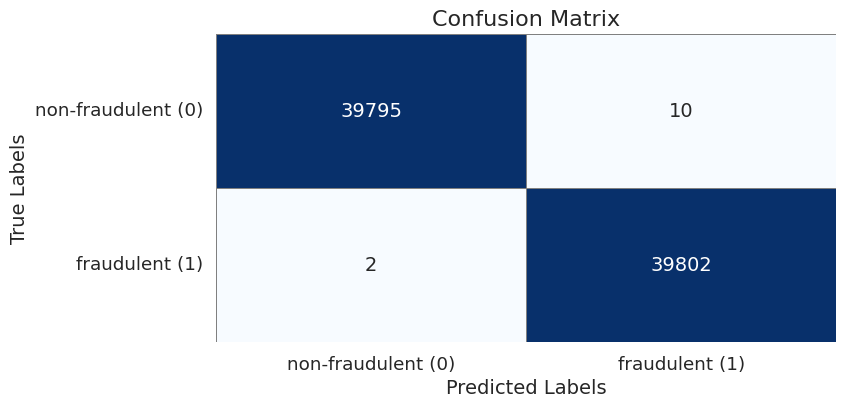

In [27]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_pred)

class_names = ['non-fraudulent (0)', 'fraudulent (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

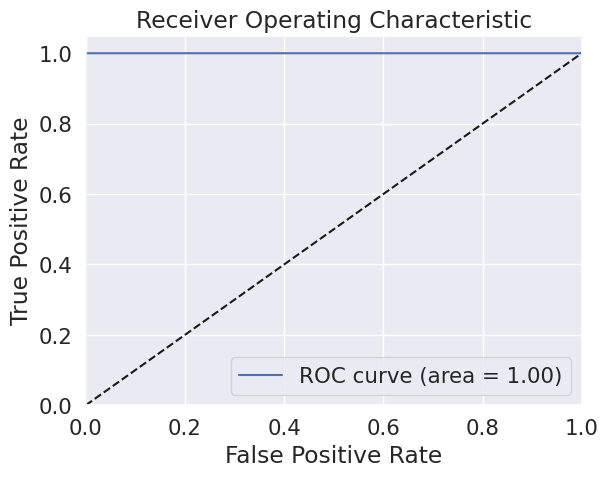

In [23]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
## Evaluating model performance on test dataset
y_test_pred = classifier.predict(X_test)
y_test_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9998
Precision: 0.9997
Recall: 1.0000
F1 Score: 0.9998
ROC AUC Score: 1.0000


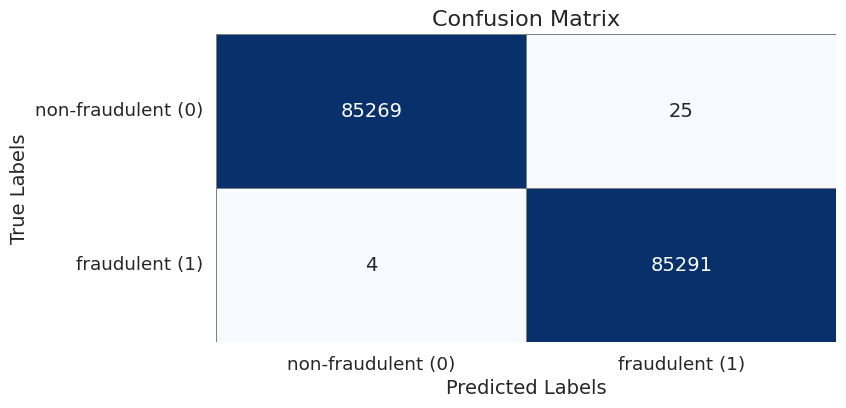

In [30]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['non-fraudulent (0)', 'fraudulent (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

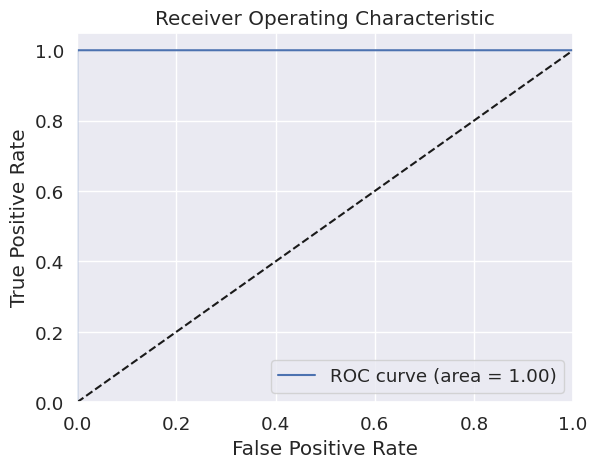

In [31]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Default on Credit Card

In [17]:
## Reading the data stored in .csv file as dataframe for credit_card_fault
file_path = "/kaggle/input/defaultonpaymentdata/UCI_Credit_Card.csv"
payment_df = pd.read_csv(file_path).drop(columns=["ID"], axis=1)

print(f"shape of the feature stored data: {payment_df.shape}\n")
payment_df.head()

shape of the feature stored data: (30000, 24)



LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

In [5]:
sevemSigma(payment_df)


Shape of the feature store dataset: (30000, 24)


Samples of records from the dataset:




Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13

None


Description of the dataset for numerical column:




Unique values within the entire dataset:
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64


Null values within entire the datset: 0.00 %


Duplicated rows in the dataset:


**There is no missing or null values.**

**There are certain duplicated value but because it's a transectional data, we might have duplicate values.**

**All the features are in compitable data type, so don't need to worry about it.**

In [19]:
## Changing the name of the target column and PAY_0
payment_df.rename(columns={"PAY_0" : "PAY_1", "default.payment.next.month" : "default_status_next_month"}, inplace=True)

payment_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_status_next_month  
0       0.0       0.0       0.0                          1  
1    1000.0       0.0    2000.0                          1  
2    1000.0    1000.0    5000.0                          0  
3    1100.0    1069.0    1000.0                          0  
4    9000.0     689.0     679.0                          0  

[5 rows x 24 columns]

In [11]:
from collections import Counter

all_tags = Counter(payment_df.default_status_next_month)
all_tags.most_common()

[(0, 23364), (1, 6636)]

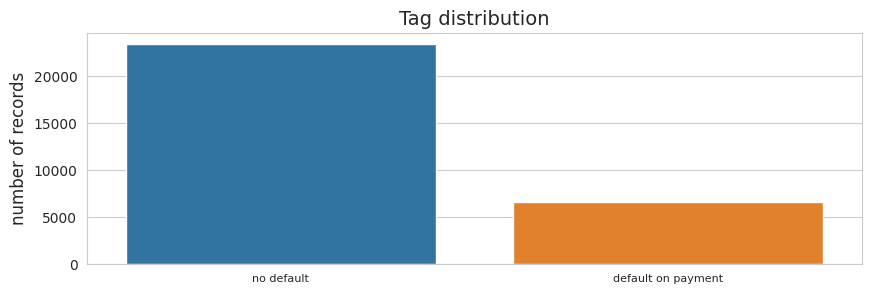

In [12]:
## Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(["no default", "default on payment"], rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("number of records", fontsize=12)
plt.show()

**The dataset is a imbalanced one so we need to look at it because the number of defaulter is less than the number of non defaulter.**

### EDA

<Axes: >

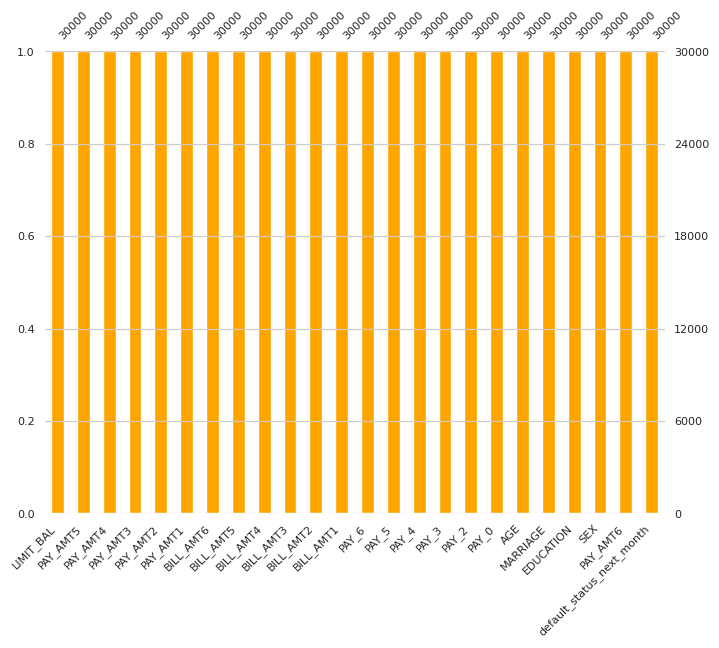

In [16]:
## Let's visualize the missing values
import missingno as msno
msno.bar(payment_df, color='orange', sort='ascending', figsize=(8,6), fontsize=8)

In [13]:
payment_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_status_next_month  
0       0.0       0.0       0.0                          1  
1    1000.0       0.0    2000.0                          1  
2    1000.0    1000.0    5000.0                          0  
3    1100.0    1069.0    1000.0                          0  
4    9000.0     689.0     679.0                          0  

[5 rows x 24 columns]

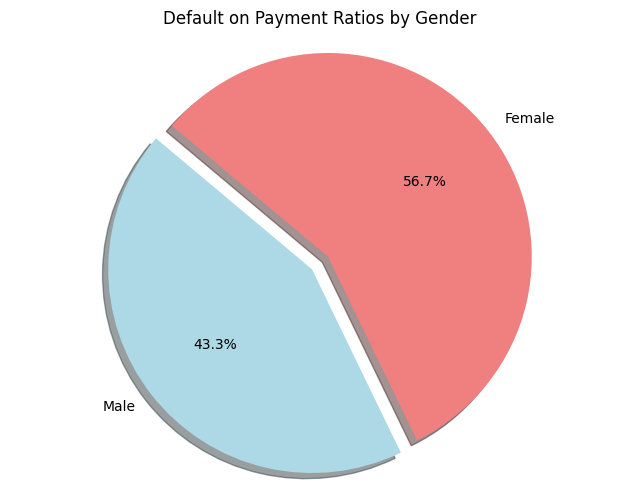

In [4]:
SEX = list(payment_df["SEX"])
DEFAULT = list(payment_df["default_status_next_month"])

male_count = sum(1 for sex, default in zip(SEX, DEFAULT) if sex==1 and default==1)
female_count = sum(1 for sex, default in zip(SEX, DEFAULT) if sex==2 and default==1)

total_default_payment = sum(1 for default in DEFAULT if default==1)

male_default_ratio = male_count / total_default_payment
female_default_ratio = female_count / total_default_payment

labels = ["Male", "Female"]
sizes = [male_default_ratio, female_default_ratio]
colors = ["lightblue", "lightcoral"]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Default on Payment Ratios by Gender")
plt.axis("equal")
plt.show()

**More number of female are default on payment than male.**

total male: 11888
total female: 18112



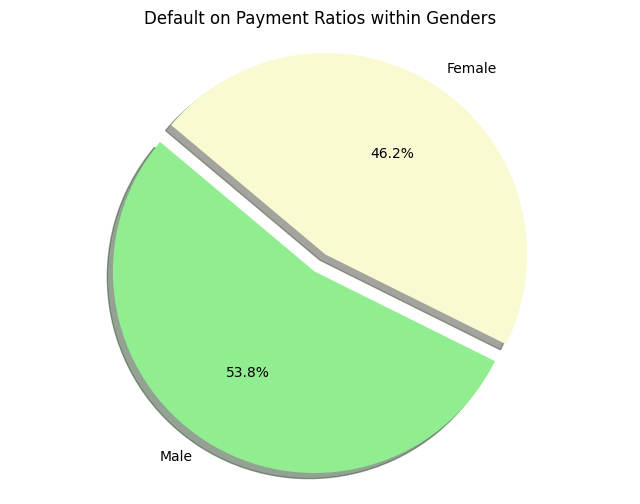

In [5]:
total_male_count = sum(1 for sex in SEX if sex==1)
total_female_count = sum(1 for sex in SEX if sex==2)

print(f"total male: {total_male_count}")
print(f"total female: {total_female_count}\n")

male_default_ratio = male_count / total_male_count
female_default_ratio = female_count / total_female_count

labels = ["Male", "Female"]
sizes = [male_default_ratio, female_default_ratio]
colors = ["lightgreen", "lightgoldenrodyellow"]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Default on Payment Ratios within Genders")
plt.axis("equal")
plt.show()

**Out of 11888 total mens, 53.8% are default on payment and 46.2% of female are default on payment out of 18112 total female.**

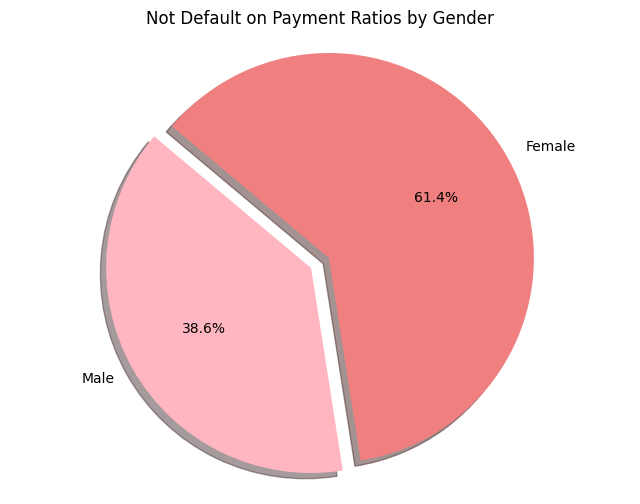

In [6]:
male_count = sum(1 for sex, default in zip(SEX, DEFAULT) if sex==1 and default==0)
female_count = sum(1 for sex, default in zip(SEX, DEFAULT) if sex==2 and default==0)

total_non_default_payment = sum(1 for default in DEFAULT if default==0)

male_default_ratio = male_count / total_non_default_payment
female_default_ratio = female_count / total_non_default_payment

labels = ["Male", "Female"]
sizes = [male_default_ratio, female_default_ratio]
colors = ["lightpink", "lightcoral"]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Not Default on Payment Ratios by Gender")
plt.axis("equal")
plt.show()

**More number of female are not default on payment than male.**

Two Questions to look at:
- what kind of female and male are more likely to be on time?
- what kind of female and male are more likely to default on payment?

In [7]:
education_count = dict(payment_df['EDUCATION'].value_counts())

x = {
    0 : "unknown",
    1 : "graduate school",
    2 : "university",
    3 : "high school",
    4 : "others",
}

counter = 0
for key in list(education_count.keys()):
    if key == 6 or key == 5 or key == 0:
        counter += education_count[key]
    else:
        education_count[x[key]] = education_count[key]
        
    del education_count[key]

education_count["unknown"] = counter
    
education_count

{'university': 14030,
 'graduate school': 10585,
 'high school': 4917,
 'others': 123,
 'unknown': 345}

**People having good educational qualification tends to be the user of credit card.**

EDUCATION
Unknown            0.000000
Graduate School    0.192348
University         0.237349
High School        0.251576
Others             0.056911
Unknown            0.064286
Unknown            0.156863
Name: 1, dtype: float64 



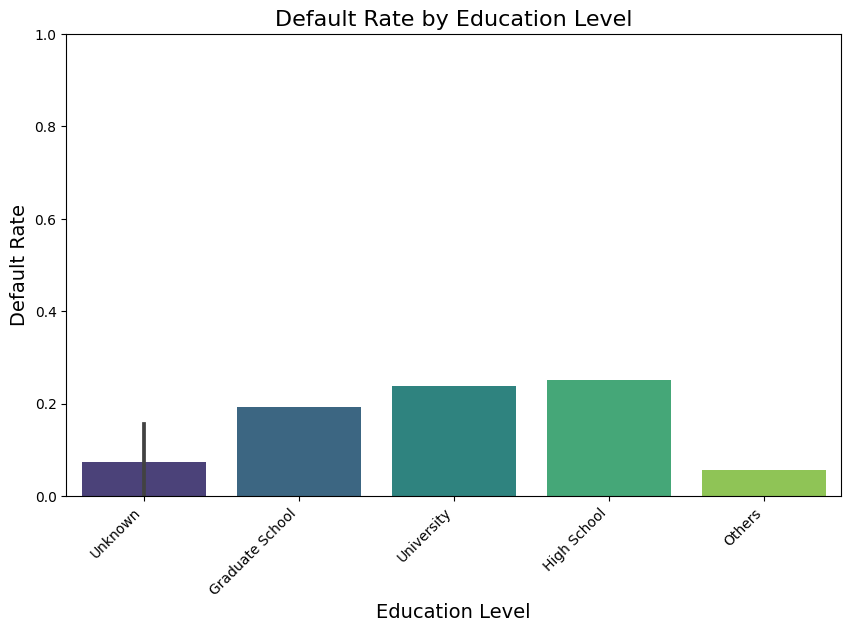

In [8]:
EDUCATION = list(payment_df["EDUCATION"])
DEFAULT = list(payment_df["default_status_next_month"])

education_wise_default_count = payment_df.groupby(["EDUCATION"])["default_status_next_month"].value_counts(normalize=True).unstack().fillna(0)
default_rates = education_wise_default_count[1]

# education_wise_default_count = payment_df[payment_df["default_status_next_month"] == 1]["EDUCATION"].value_counts().sort_index()

education_levels = {
    0: "Unknown",
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown',
    6: 'Unknown'
}

default_rates.index = default_rates.index.map(education_levels)

print(default_rates,"\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='viridis')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.title('Default Rate by Education Level', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

EDUCATION
Unknown            1.000000
Graduate School    0.807652
University         0.762651
High School        0.748424
Others             0.943089
Unknown            0.935714
Unknown            0.843137
Name: 0, dtype: float64 



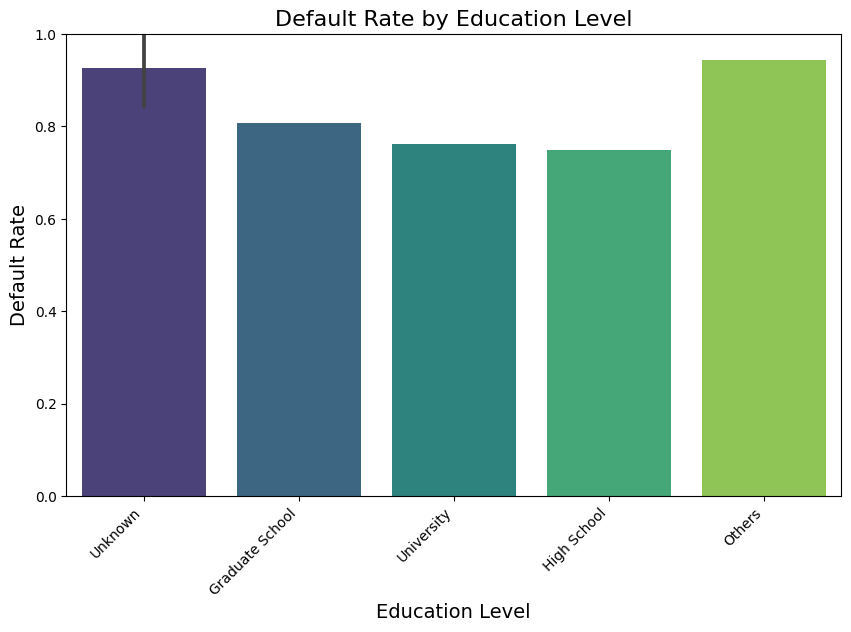

In [9]:
EDUCATION = list(payment_df["EDUCATION"])
DEFAULT = list(payment_df["default_status_next_month"])

education_wise_default_count = payment_df.groupby(["EDUCATION"])["default_status_next_month"].value_counts(normalize=True).unstack().fillna(0)
default_rates = education_wise_default_count[0]

# education_wise_default_count = payment_df[payment_df["default_status_next_month"] == 1]["EDUCATION"].value_counts().sort_index()

education_levels = {
    0: "Unknown",
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown',
    6: 'Unknown'
}

default_rates.index = default_rates.index.map(education_levels)

print(default_rates,"\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='viridis')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.title('Default Rate by Education Level', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

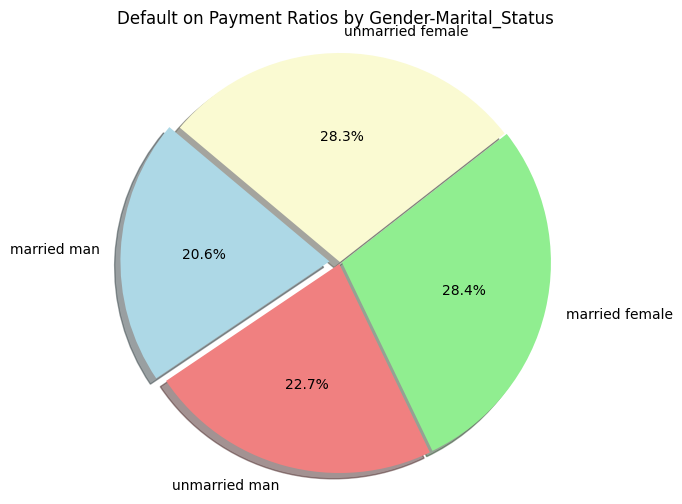

In [10]:
MARITAL_STATUS = list(payment_df["MARRIAGE"])

man_married_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 1 and mar == 1 and default == 1)
man_unmarried_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 1 and mar == 2 and default == 1)
female_married_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 2 and mar == 1 and default == 1)
female_unmarried_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 2 and mar == 2 and default == 1)

man_married_default_ratio = man_married_count / total_default_payment
man_unmarried_default_ratio = man_unmarried_count / total_default_payment
female_married_default_ratio = female_married_count / total_default_payment
female_unmarried_default_ratio = female_unmarried_count / total_default_payment

labels = ["married man", "unmarried man", "married female", "unmarried female"]
sizes = [man_married_default_ratio, man_unmarried_default_ratio, female_married_default_ratio, female_unmarried_default_ratio]
colors = ["lightblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"]
explode = (0.05, 0.01, 0.01, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Default on Payment Ratios by Gender-Marital_Status")
plt.axis("equal")
plt.show()

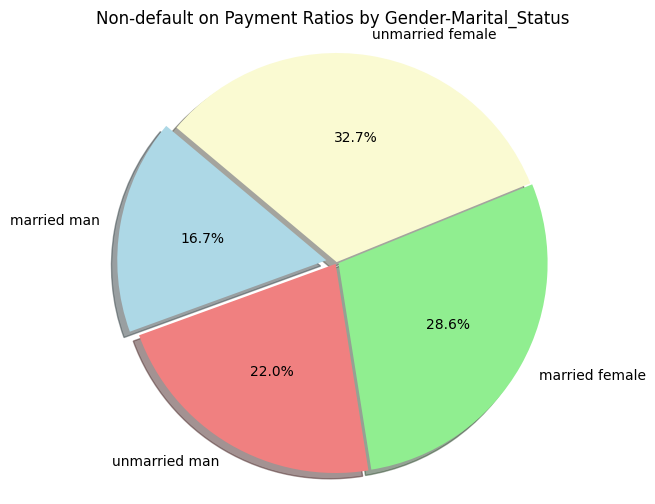

In [11]:
MARITAL_STATUS = list(payment_df["MARRIAGE"])

man_married_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 1 and mar == 1 and default == 0)
man_unmarried_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 1 and mar == 2 and default == 0)
female_married_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 2 and mar == 1 and default == 0)
female_unmarried_count = sum(1 for sex, mar, default in zip(SEX, MARITAL_STATUS, DEFAULT) if sex == 2 and mar == 2 and default == 0)

total_non_default_count = sum(1 for default in DEFAULT if default == 0)

man_married_default_ratio = man_married_count / total_non_default_count
man_unmarried_default_ratio = man_unmarried_count / total_non_default_count
female_married_default_ratio = female_married_count / total_non_default_count
female_unmarried_default_ratio = female_unmarried_count / total_non_default_count

labels = ["married man", "unmarried man", "married female", "unmarried female"]
sizes = [man_married_default_ratio, man_unmarried_default_ratio, female_married_default_ratio, female_unmarried_default_ratio]
colors = ["lightblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"]
explode = (0.05, 0.01, 0.01, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Non-default on Payment Ratios by Gender-Marital_Status")
plt.axis("equal")
plt.show()

In [15]:
payment_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_status_next_month  
0       0.0       0.0       0.0                          1  
1    1000.0       0.0    2000.0                          1  
2    1000.0    1000.0    5000.0                          0  
3    1100.0    1069.0    1000.0                          0  
4    9000.0     689.0     679.0                          0  

[5 rows x 24 columns]

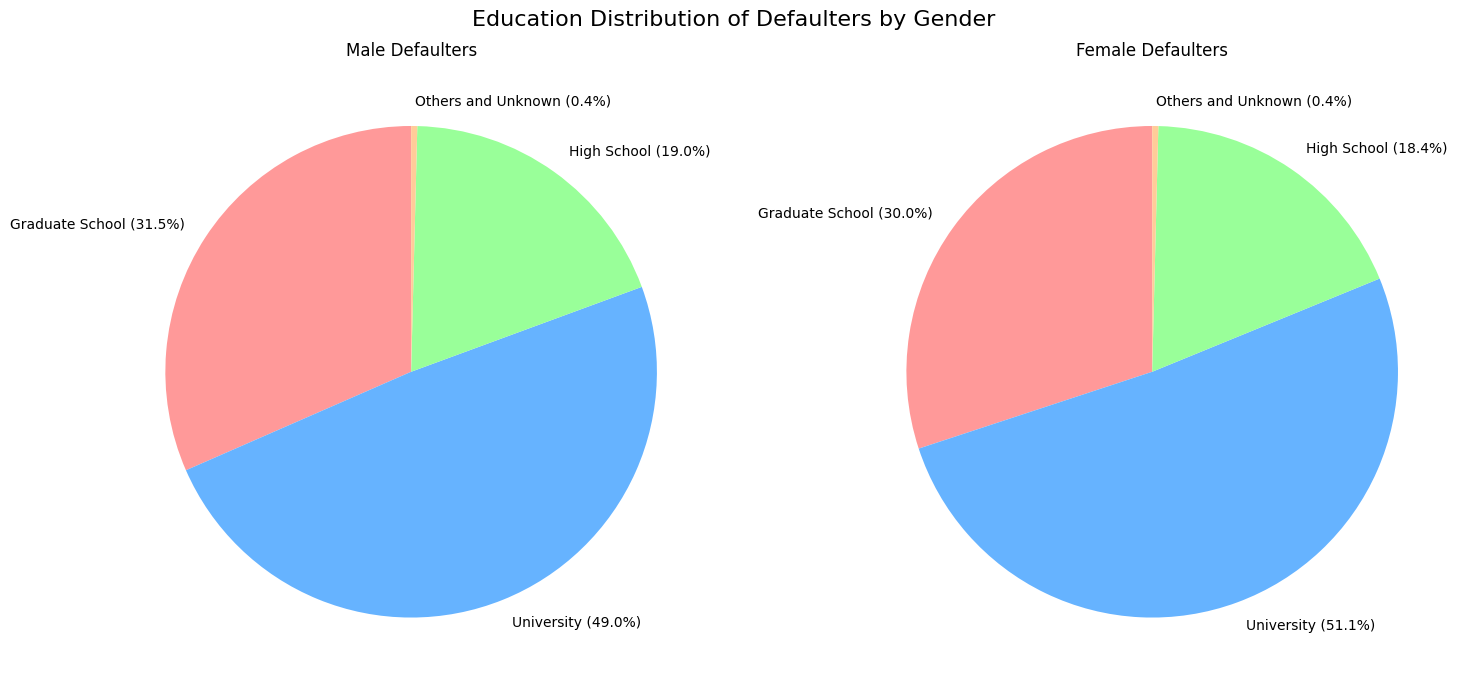

In [12]:
## Gender - Education 
default_df = payment_df[payment_df["default_status_next_month"] == 1]
gender_education_default = default_df.groupby(["SEX"])["EDUCATION"].value_counts(normalize=True).unstack()

male_education_default = gender_education_default.loc[:1]
female_education_default = gender_education_default.loc[2:]

education_levels = {
    0: "Unknown",
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown',
    6: 'Unknown'
}

male_education_default.columns = male_education_default.columns.map(education_levels)
female_education_default.columns = female_education_default.columns.map(education_levels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Education Distribution of Defaulters by Gender', fontsize=16)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#8080ff']

male_data = male_education_default.iloc[0]
male_labels = [f'{l} ({v:.1%})' for l, v in zip(male_data.index, male_data.values) if v > 0]
male_sizes = [v for v in male_data.values if v > 0]

male_labels = male_labels[:3]
male_labels.append("Others and Unknown (0.4%)")
male_data = male_data[:4]
male_data[3] = 0.004000
male_sizes = male_sizes[:3]
male_sizes.append(0.004000)

ax1.pie(male_sizes, labels=male_labels, colors=colors[:len(male_sizes)], autopct='', startangle=90)
ax1.set_title('Male Defaulters')

female_data = female_education_default.iloc[0]
female_labels = [f'{l} ({v:.1%})' for l, v in zip(female_data.index, female_data.values) if v > 0]
female_sizes = [v for v in female_data.values if v > 0]

female_labels = female_labels[:3]
female_labels.append("Others and Unknown (0.4%)")
female_data = female_data[:4]
female_data[3] = 0.004000
female_sizes = female_sizes[:3]
female_sizes.append(0.004000)

ax2.pie(female_sizes, labels=female_labels, colors=colors[:len(female_sizes)], autopct='', startangle=90)
ax2.set_title('Female Defaulters')

plt.tight_layout()
plt.show()

**Both male and female of Graduate School and University are more likely to default on payment than High School.**

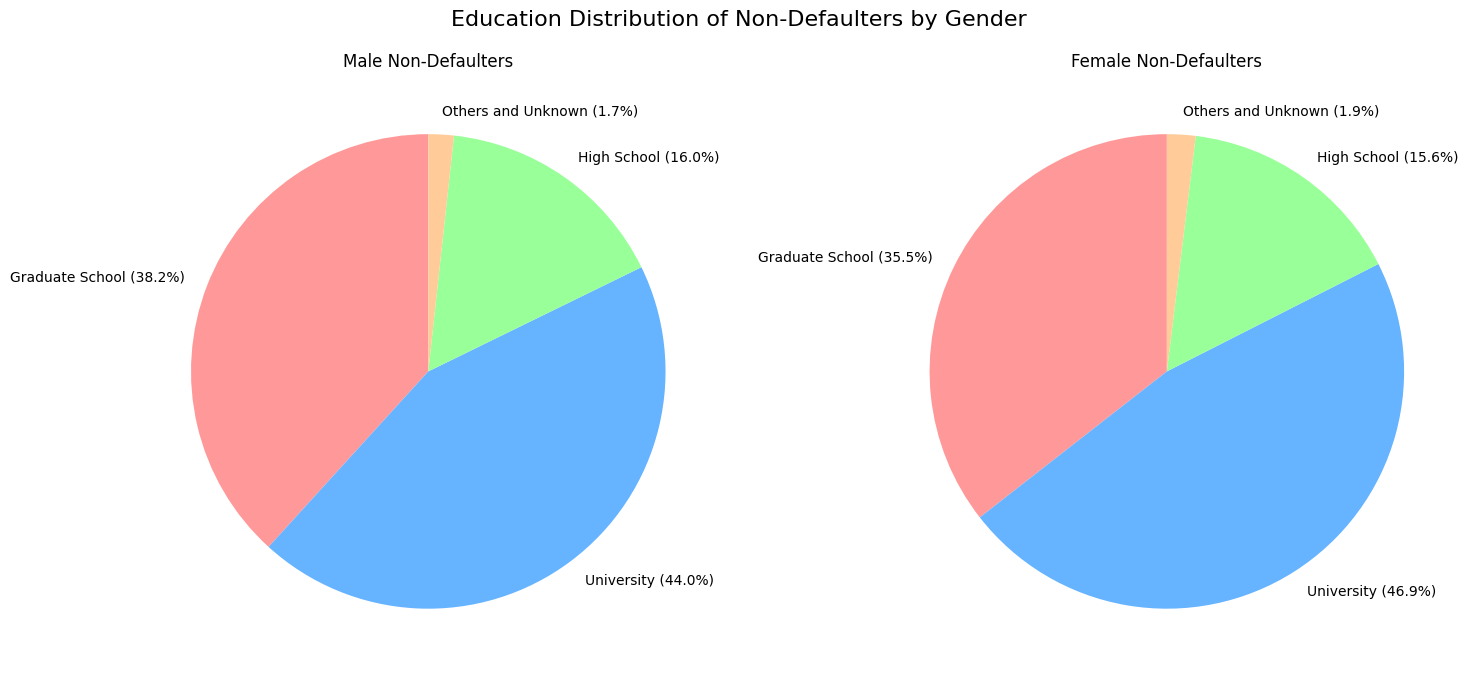

In [13]:
default_df = payment_df[payment_df["default_status_next_month"] == 0]
gender_education_default = default_df.groupby(["SEX"])["EDUCATION"].value_counts(normalize=True).unstack()

male_education_default = gender_education_default.loc[:1]
female_education_default = gender_education_default.loc[2:]

education_levels = {
    0: "Unknown",
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown',
    6: 'Unknown'
}

male_education_default.columns = male_education_default.columns.map(education_levels)
female_education_default.columns = female_education_default.columns.map(education_levels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Education Distribution of Non-Defaulters by Gender', fontsize=16)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#8080ff']

male_data = male_education_default.iloc[0]
male_labels = [f'{l} ({v:.1%})' for l, v in zip(male_data.index, male_data.values) if v > 0]
male_sizes = [v for v in male_data.values if v > 0]

male_labels = male_labels[1:4]
male_labels.append("Others and Unknown (1.7%)")
male_data = male_data[1:5]
male_data[3] = 0.0173030
male_sizes = male_sizes[1:4]
male_sizes.append(0.017304492512479203)

ax1.pie(male_sizes, labels=male_labels, colors=colors[:len(male_sizes)], autopct='', startangle=90)
ax1.set_title('Male Non-Defaulters')

female_data = female_education_default.iloc[0]
female_labels = [f'{l} ({v:.1%})' for l, v in zip(female_data.index, female_data.values) if v > 0]
female_sizes = [v for v in female_data.values if v > 0]

female_labels = female_labels[1:4]
female_labels.append("Others and Unknown (1.9%)")
female_data = female_data[1:5]
female_data[3] = 0.019444
female_sizes = female_sizes[1:4]
female_sizes.append(0.01944386368388041)

ax2.pie(female_sizes, labels=female_labels, colors=colors[:len(female_sizes)], autopct='', startangle=90)
ax2.set_title('Female Non-Defaulters')

plt.tight_layout()
plt.show()

**male and female of Graduate School and University have the higher chances to make payments on time.**

In [107]:
payment_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_status_next_month  
0       0.0       0.0       0.0                          1  
1    1000.0       0.0    2000.0                          1  
2    1000.0    1000.0    5000.0                          0  
3    1100.0    1069.0    1000.0                          0  
4    9000.0     689.0     679.0                          0  

[5 rows x 24 columns]

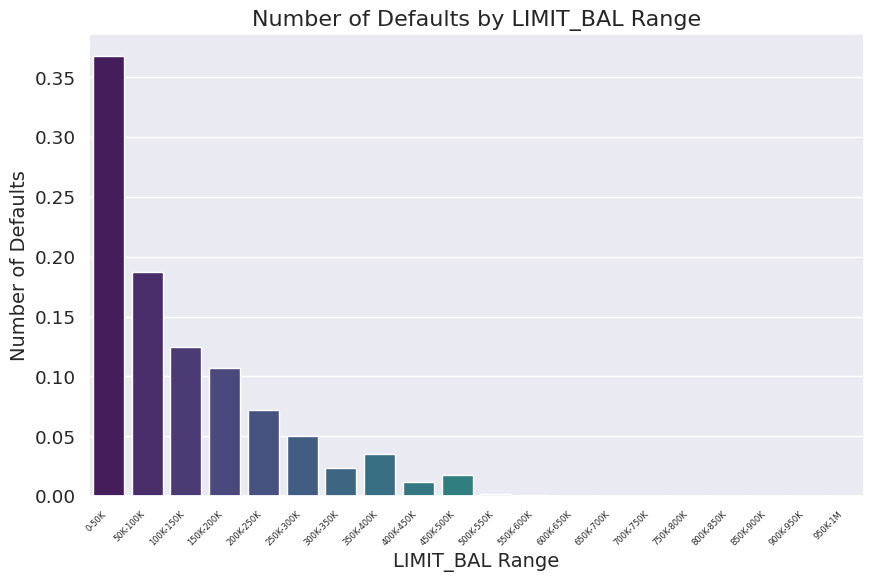

In [233]:
data = payment_df[["LIMIT_BAL", "default_status_next_month"]]

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 
        600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000]
labels = ["0-50K", "50K-100K", "100K-150K", "150K-200K", "200K-250K", "250K-300K", "300K-350K",
          "350K-400K", "400K-450K", "450K-500K", "500K-550K", "550K-600K", "600K-650K", "650K-700K",
          "700K-750K", "750K-800K", "800K-850K", "850K-900K", "900K-950K", "950K-1M"]

data["LIMIT_BAL_RANGE"] = pd.cut(data["LIMIT_BAL"], bins=bins, labels=labels)

default_counts = data[data["default_status_next_month"] == 1]["LIMIT_BAL_RANGE"].value_counts().sort_index()
total_default_count = data[data["default_status_next_month"] == 1]["default_status_next_month"].value_counts()

for x in range(len(default_counts)):
    answer = default_counts[x] / total_default_count
    default_counts[x] = answer
    
plt.figure(figsize=(10, 6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette="viridis")
plt.xlabel('LIMIT_BAL Range', fontsize=14)
plt.ylabel('Number of Defaults', fontsize=14)
plt.title('Number of Defaults by LIMIT_BAL Range', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()

**Credit card holder having the LIMIT_BAL more than 500K are not likely to default on payment.**

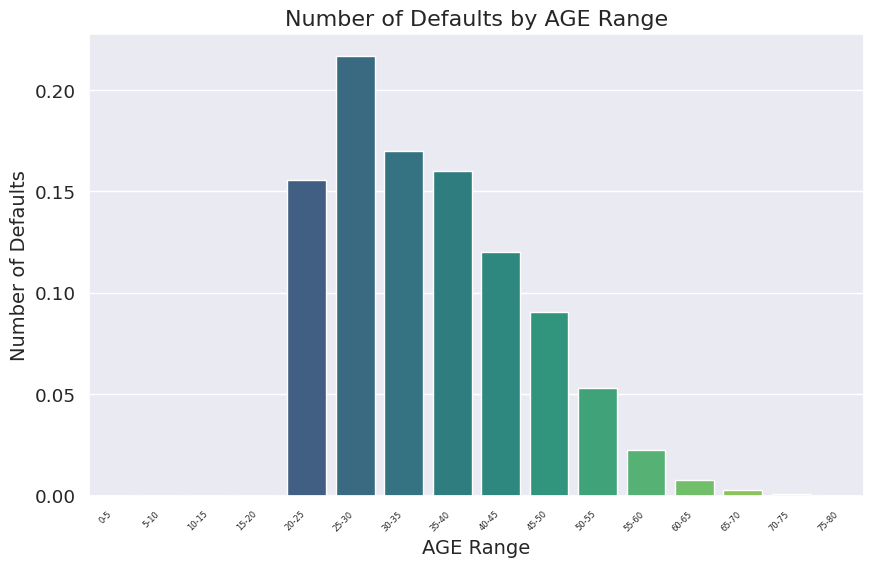

In [236]:
data = payment_df[["AGE", "default_status_next_month"]]

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50",
          "50-55", "55-60", "60-65", "65-70", "70-75", "75-80"]

data["AGE_RANGE"] = pd.cut(data["AGE"], bins=bins, labels=labels)

default_counts = data[data["default_status_next_month"] == 1]["AGE_RANGE"].value_counts().sort_index()
total_default_count = data[data["default_status_next_month"] == 1]["default_status_next_month"].value_counts()

for x in range(len(default_counts)):
    answer = default_counts[x] / total_default_count
    default_counts[x] = answer
    
plt.figure(figsize=(10, 6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette="viridis")
plt.xlabel('AGE Range', fontsize=14)
plt.ylabel('Number of Defaults', fontsize=14)
plt.title('Number of Defaults by AGE Range', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()

**Most of the defaulters are of AGE between 20 to 60.**

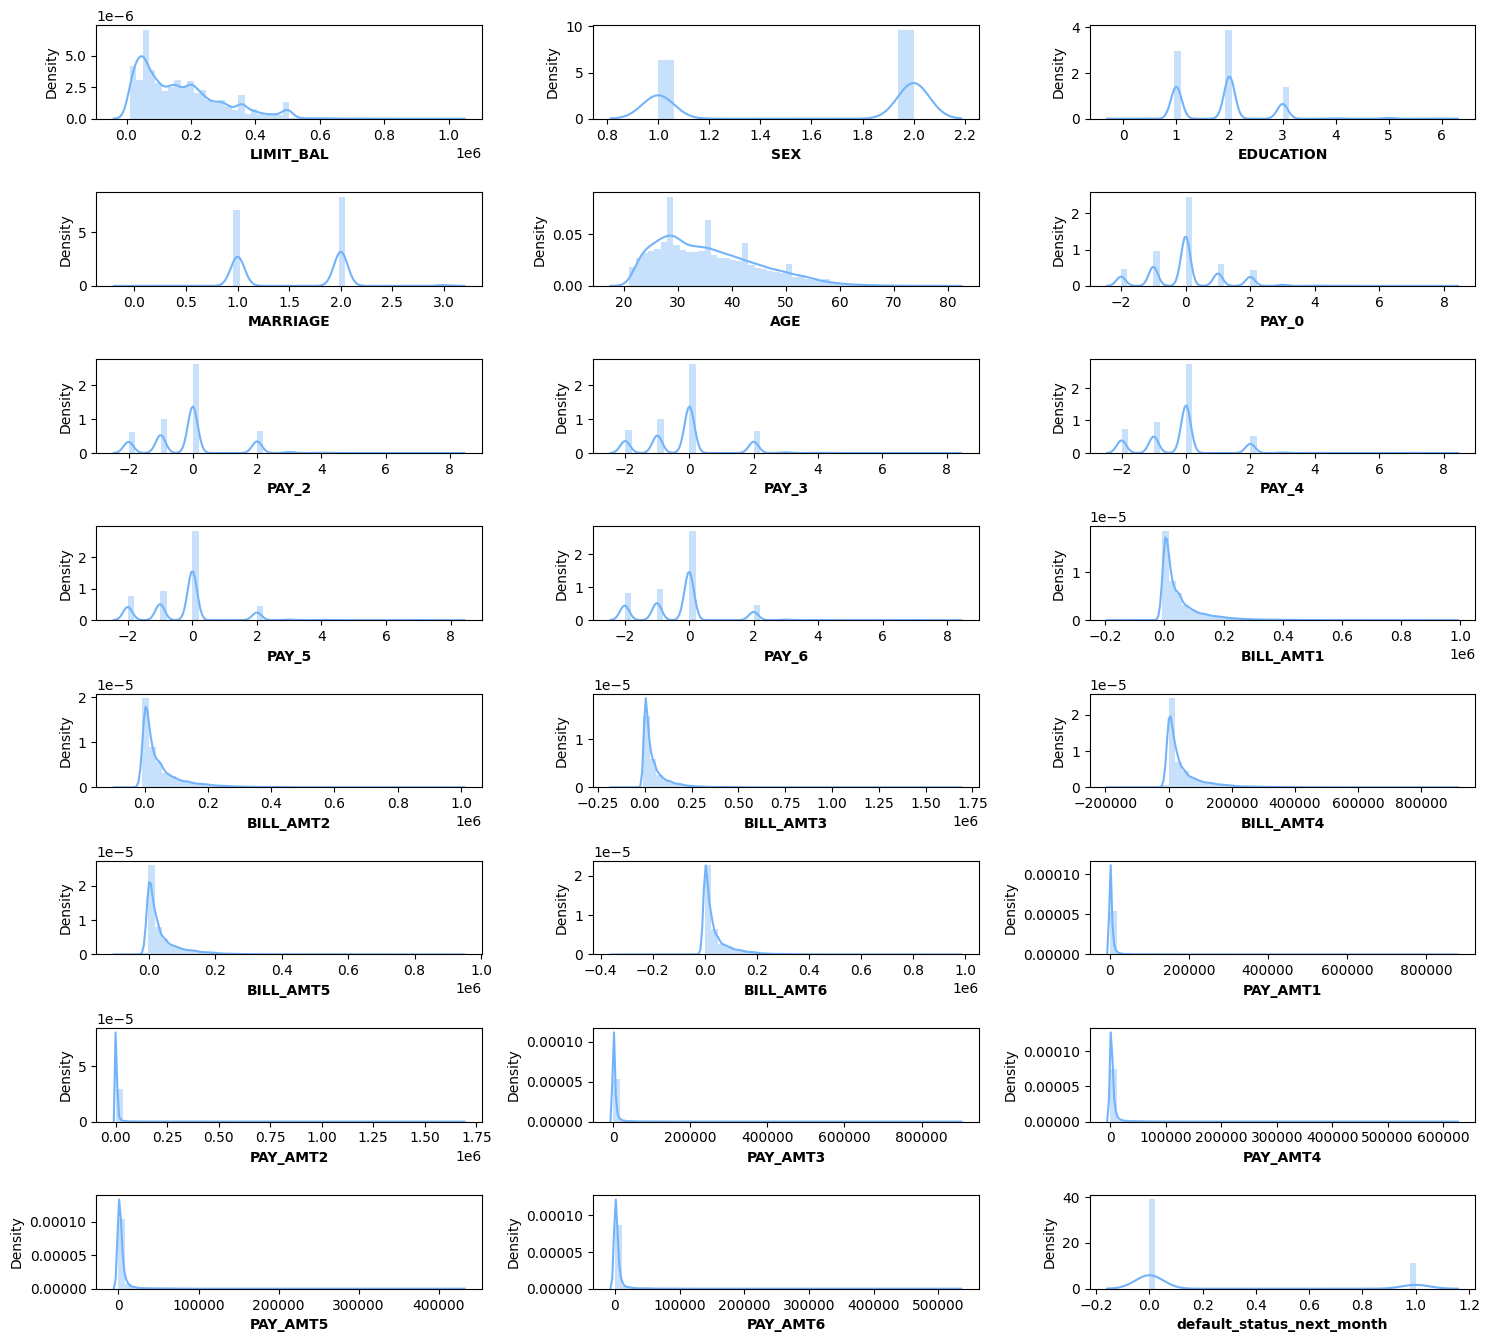

In [112]:
plt.figure(figsize = (15, 100))

for i, col in enumerate(payment_df.columns):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=payment_df[col], color='#73b3f9')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

**Except the features having categories such as SEX, EDUCATION, MARRIAGE etc., we're gonna apply transformation and standardization methods to convert them in normal distribution.**

In [114]:
## Checking for features having zero std value.
cols_to_drop = get_zero_std_features(payment_df)
print(f"There are {len(cols_to_drop)} features having zero std value.")

There are 0 features having zero std value.


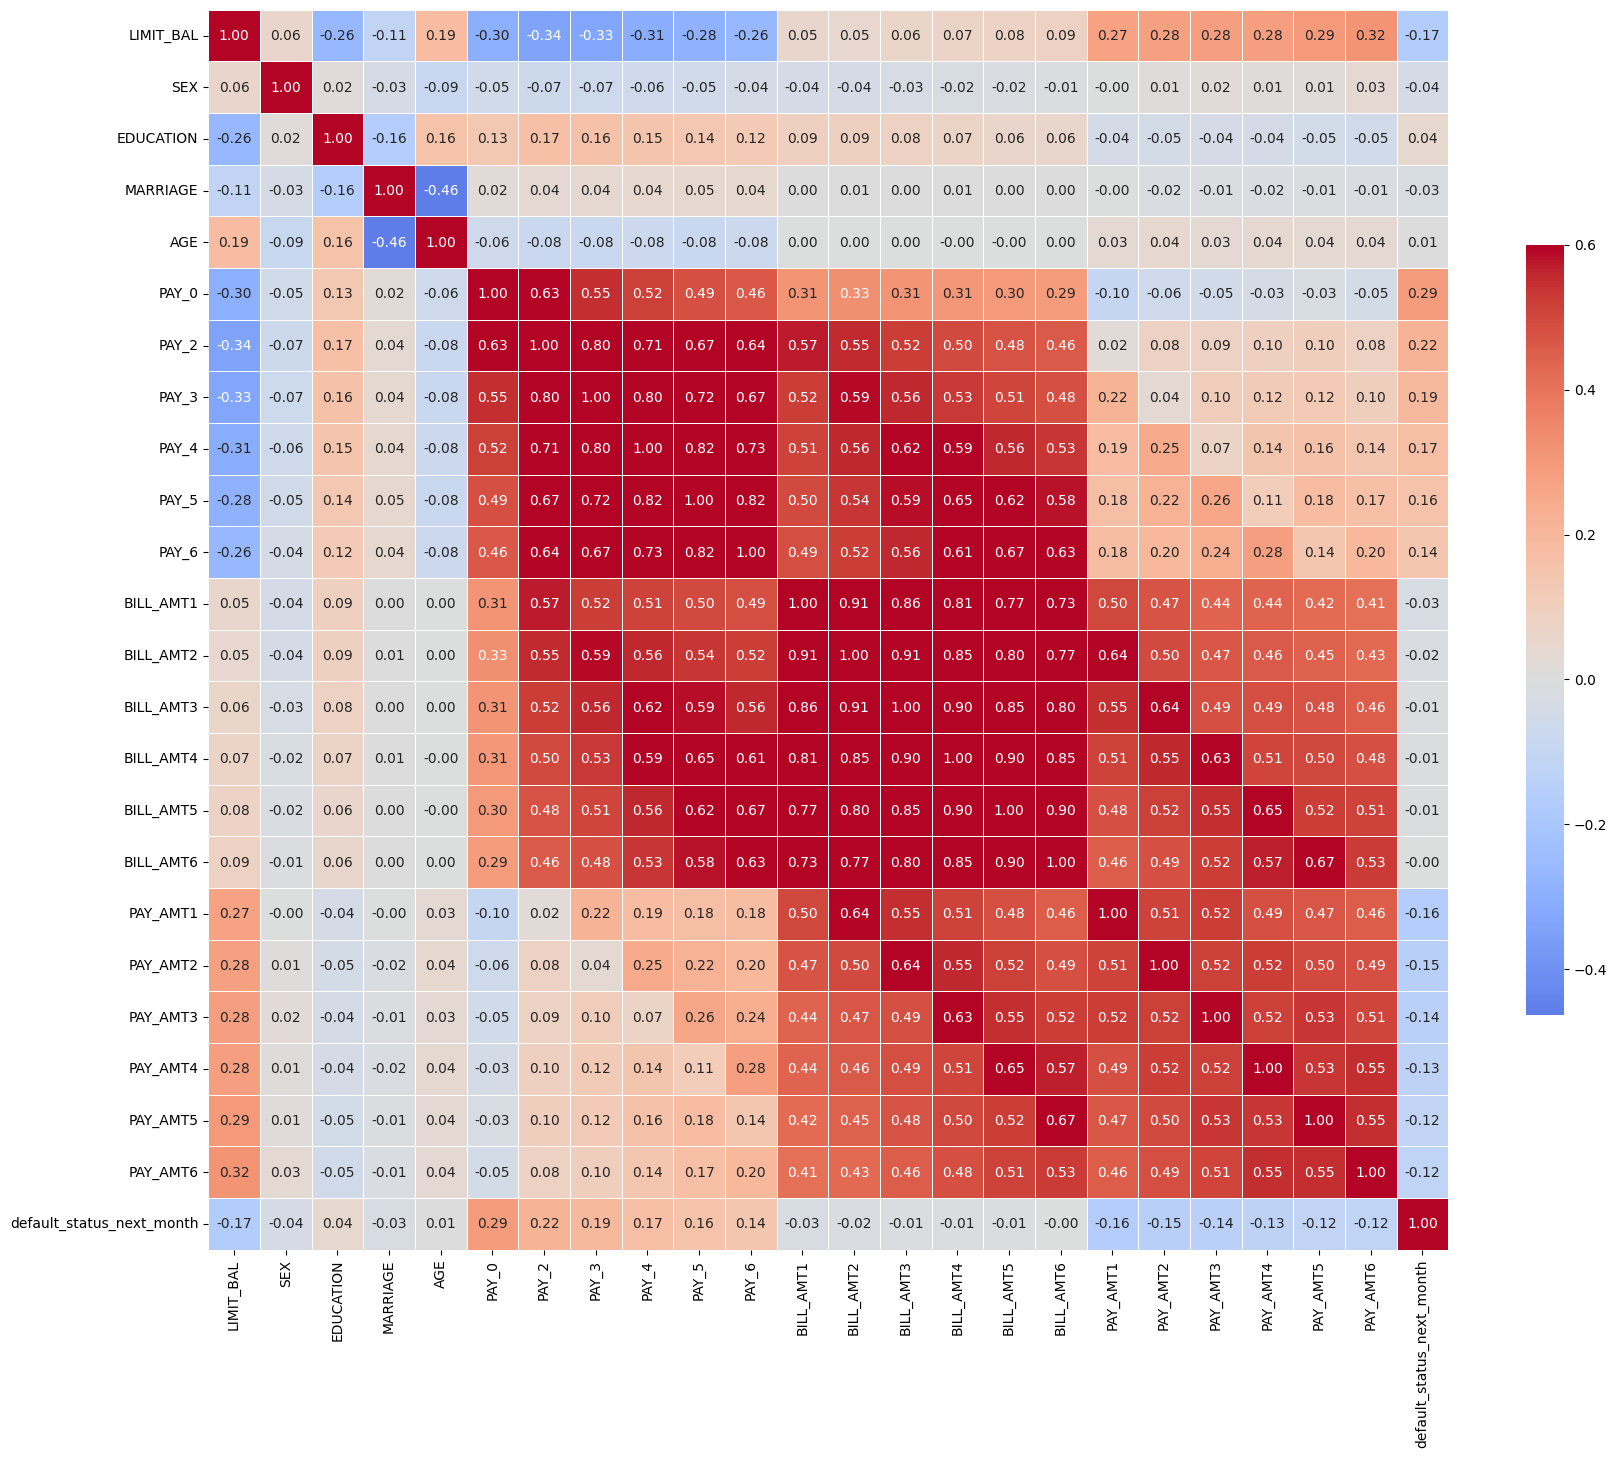

In [115]:
## Checking the correlation between each features
corr_df = payment_df.corr(method="spearman")

g = sns.heatmap(corr_df, vmax=.6, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f", cmap="coolwarm")
g.figure.set_size_inches(20,20)

plt.show()

In [127]:
highly_correlated_features = find_high_correlations(payment_df, threshold=0.90, exclude_column='default_status_next_month')

if len(highly_correlated_features) == 0:
    print(f"There is no features pairs having correlation > 0.90")
else:
    print("Highly correlated feature pairs (correlation > 0.90):")
    for feat1, feat2, corr in highly_correlated_features:
        print(f"{feat1} - {feat2}: {corr:.2f}")

Highly correlated feature pairs (correlation > 0.90):
BILL_AMT1 - BILL_AMT2: 0.95
BILL_AMT5 - BILL_AMT6: 0.95
BILL_AMT4 - BILL_AMT5: 0.94
BILL_AMT2 - BILL_AMT3: 0.93
BILL_AMT3 - BILL_AMT4: 0.92
BILL_AMT4 - BILL_AMT6: 0.90


**We can not drop BILL_AMTX features because they are important to predict the default status.**

In [117]:
## Correlation of each feature with respect to dependent feature "default_status_next_month"
payment_df.corr(method="spearman")["default_status_next_month"].sort_values()

LIMIT_BAL                   -0.169586
PAY_AMT1                    -0.160493
PAY_AMT2                    -0.150977
PAY_AMT3                    -0.139388
PAY_AMT4                    -0.127979
PAY_AMT6                    -0.121444
PAY_AMT5                    -0.116587
SEX                         -0.039961
MARRIAGE                    -0.026490
BILL_AMT1                   -0.025327
BILL_AMT2                   -0.015554
BILL_AMT3                   -0.012670
BILL_AMT4                   -0.008357
BILL_AMT5                   -0.006851
BILL_AMT6                   -0.000076
AGE                          0.005149
EDUCATION                    0.044369
PAY_6                        0.142523
PAY_5                        0.159043
PAY_4                        0.173690
PAY_3                        0.194771
PAY_2                        0.216919
PAY_0                        0.292213
default_status_next_month    1.000000
Name: default_status_next_month, dtype: float64

**We can drop features because they don't have the high correlation with the target feature.**

**But we're not gonna drop them because they might have a non-linear relation ship with the target feature which is not being captured by correlation and also if we're gonna do so then we might end up having zero features because over here it's clearly visible that not a single feature have high correlation with the targeted feature.**

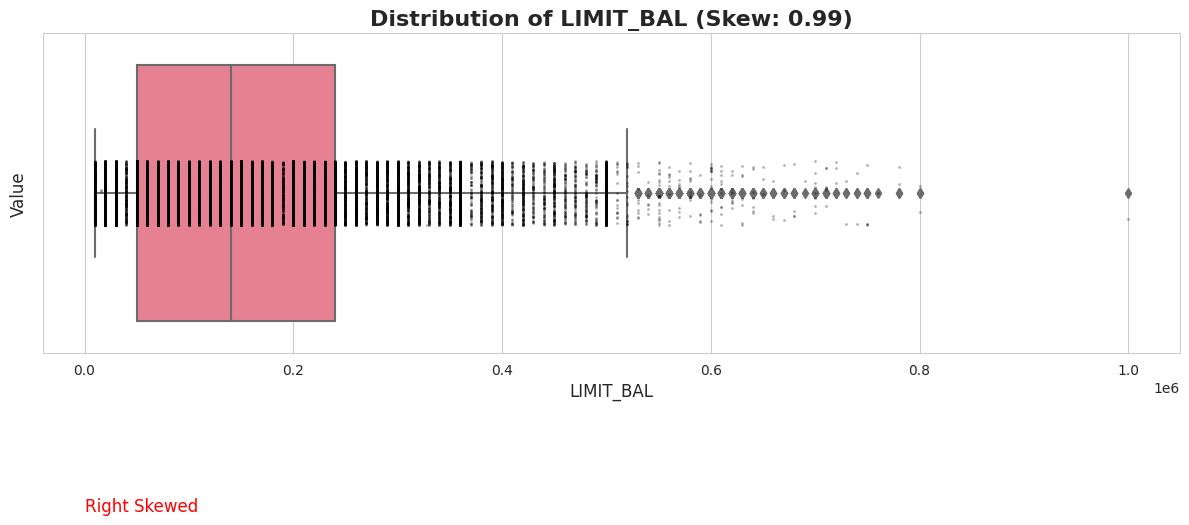

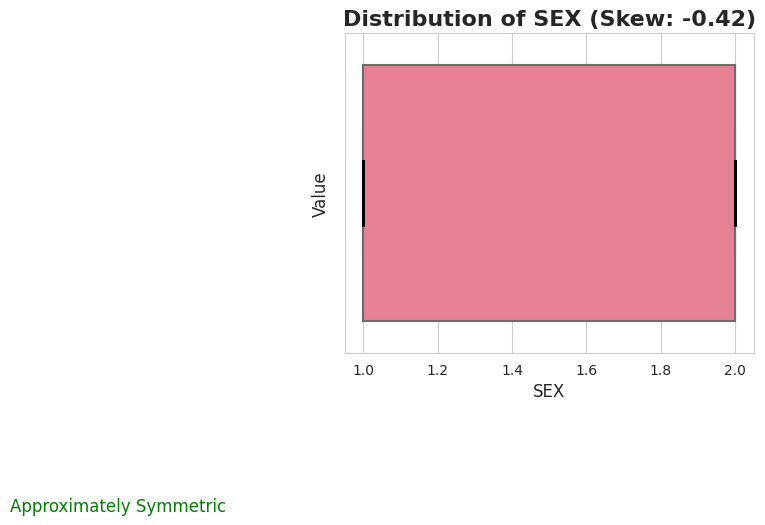

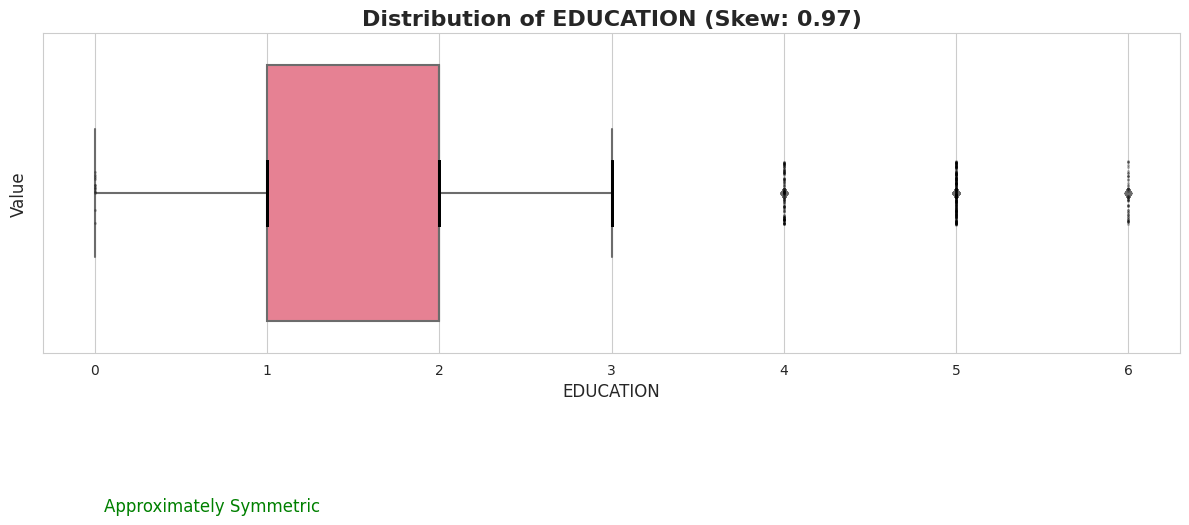

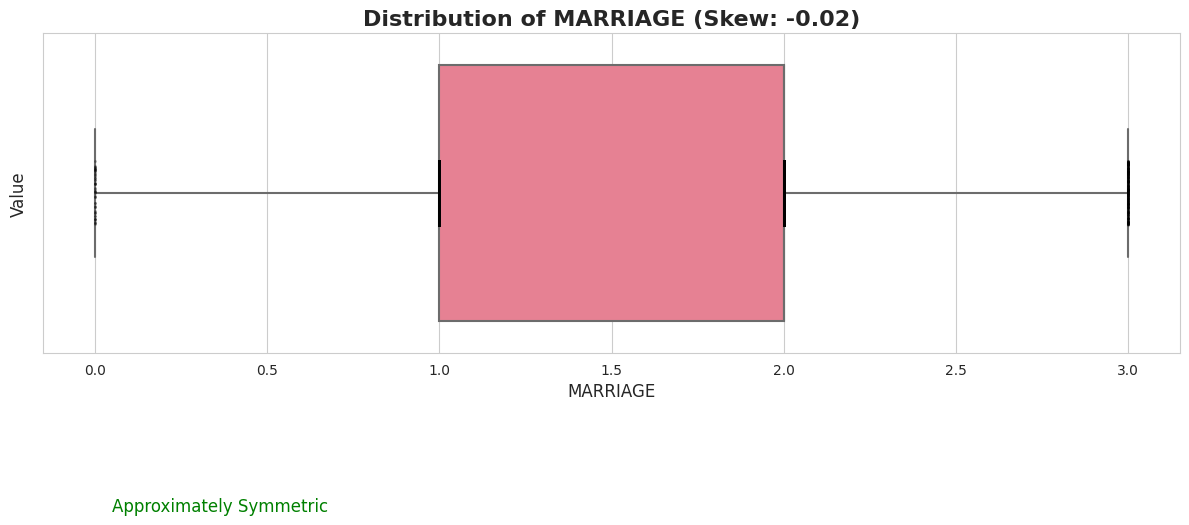

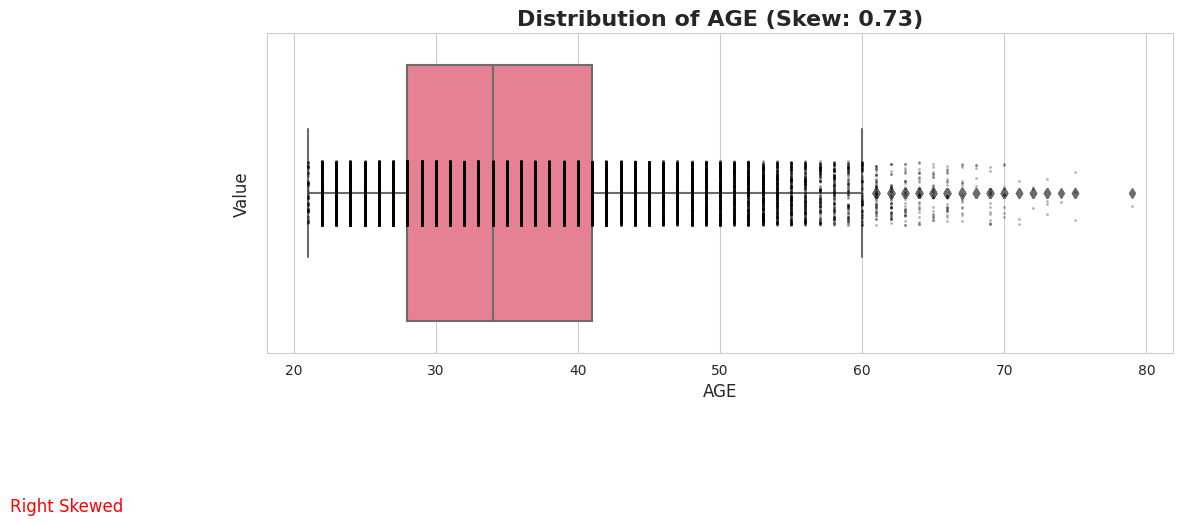

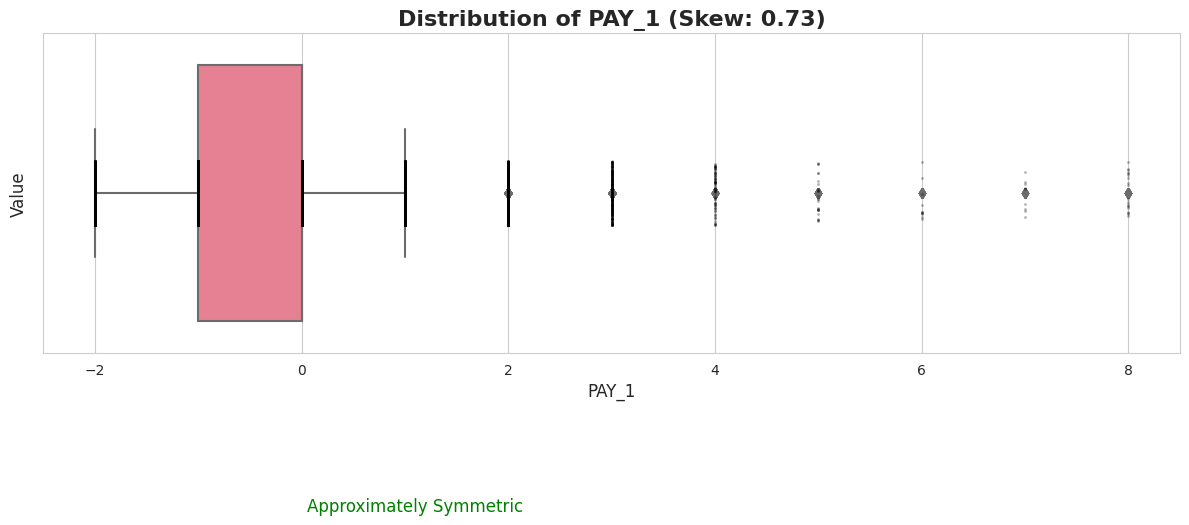

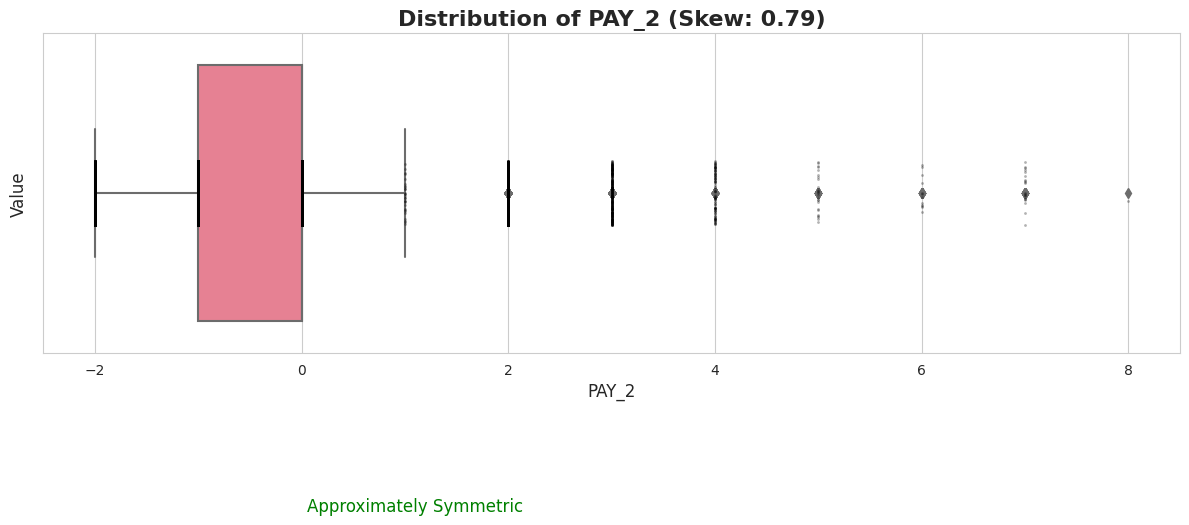

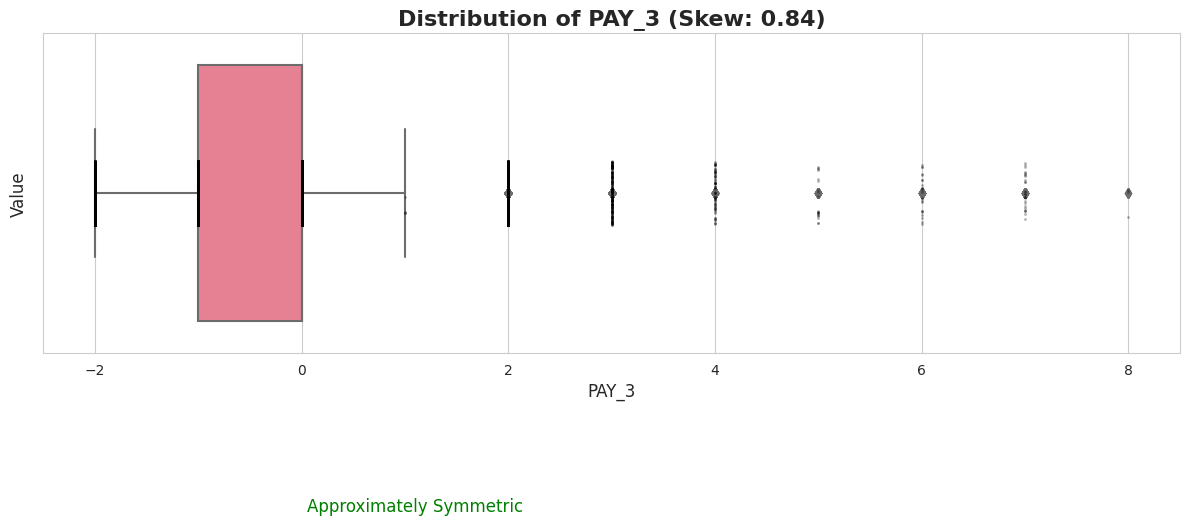

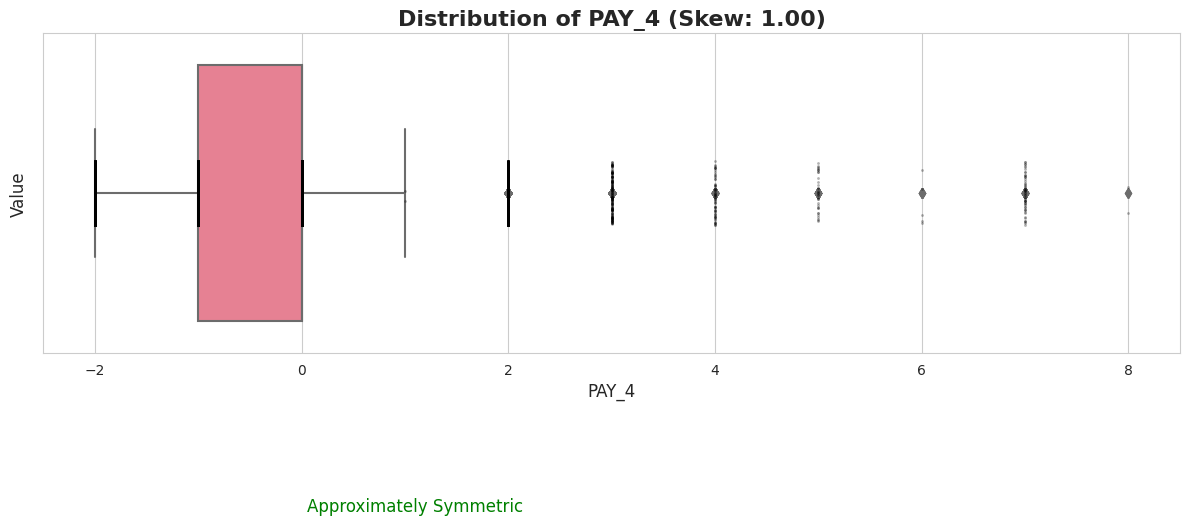

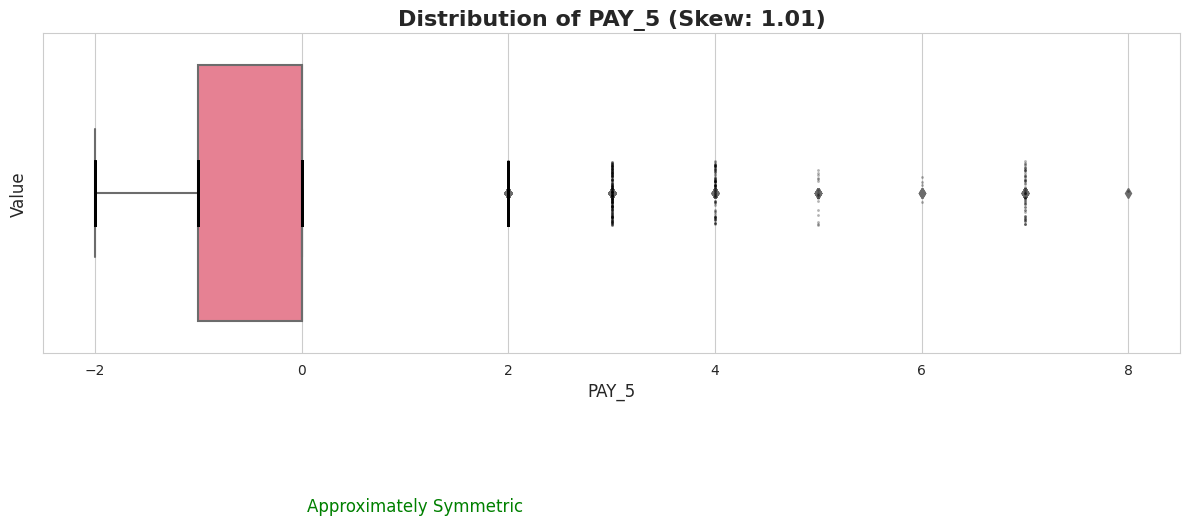

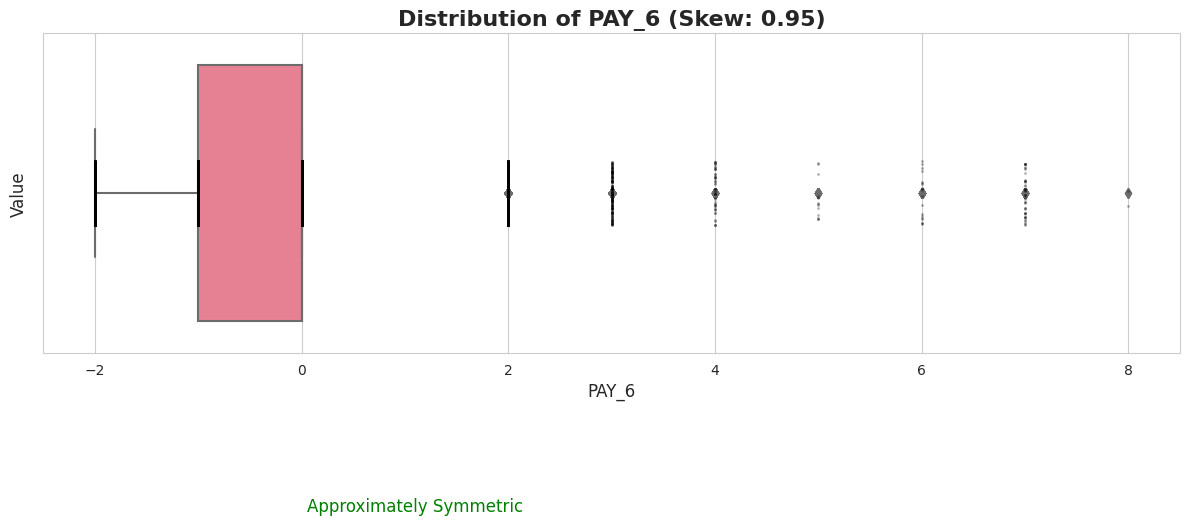

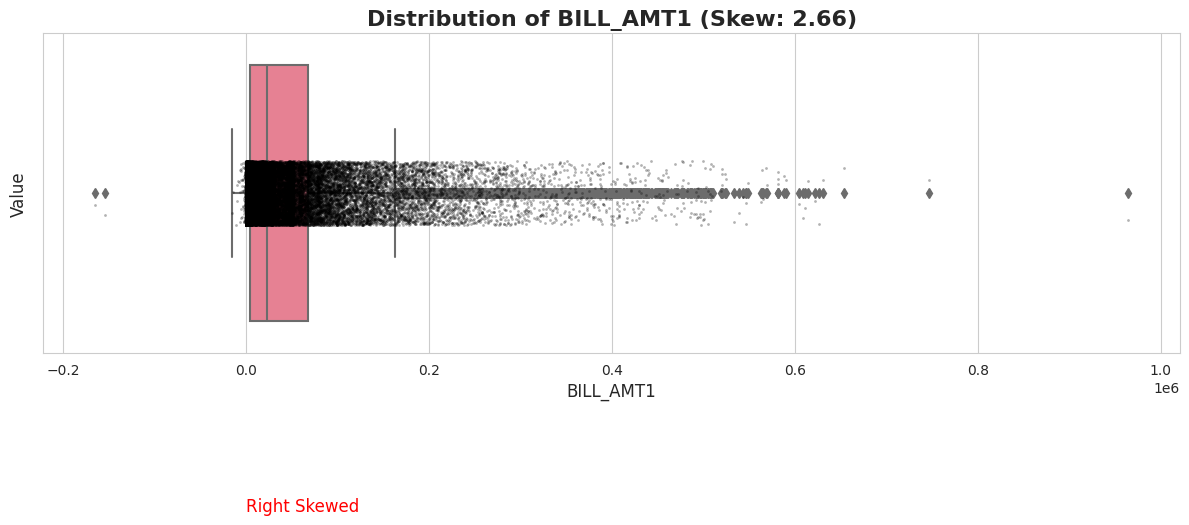

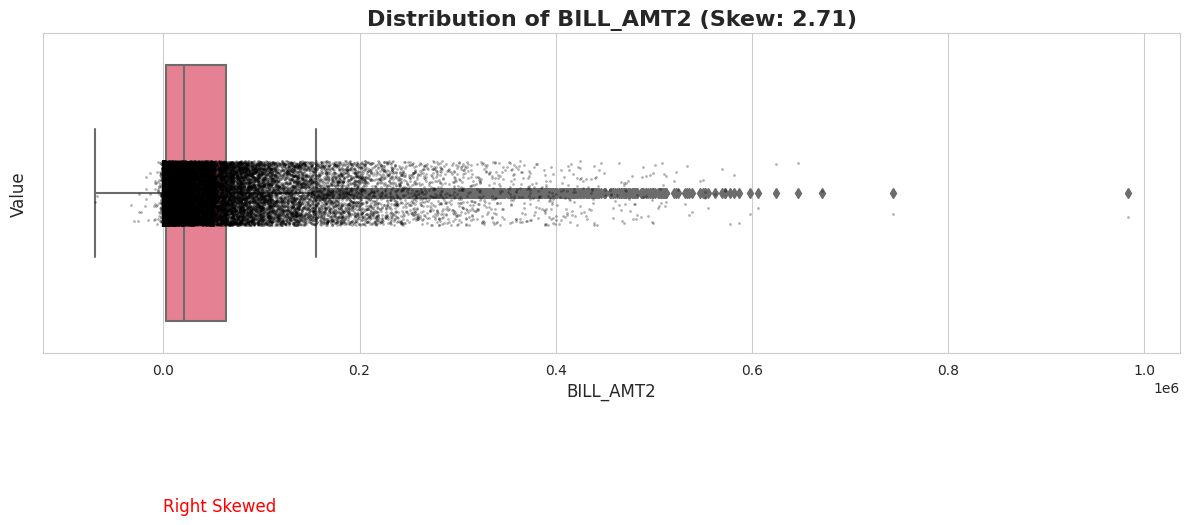

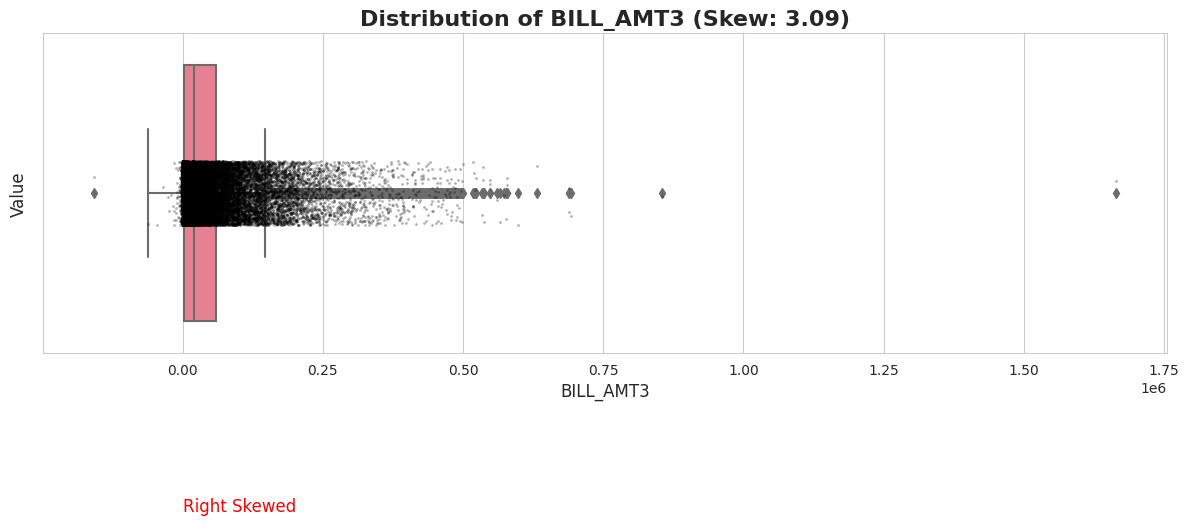

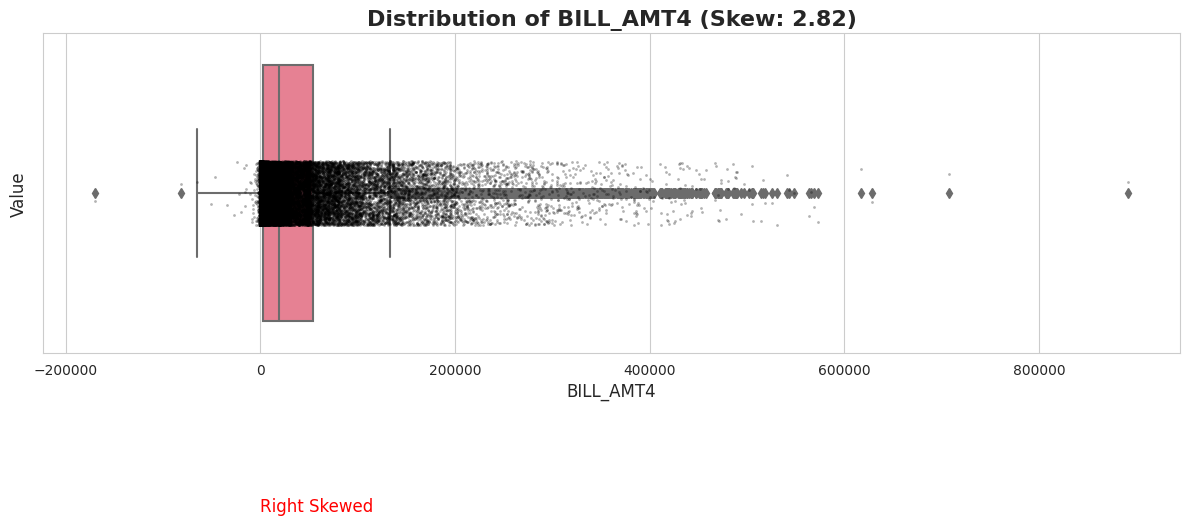

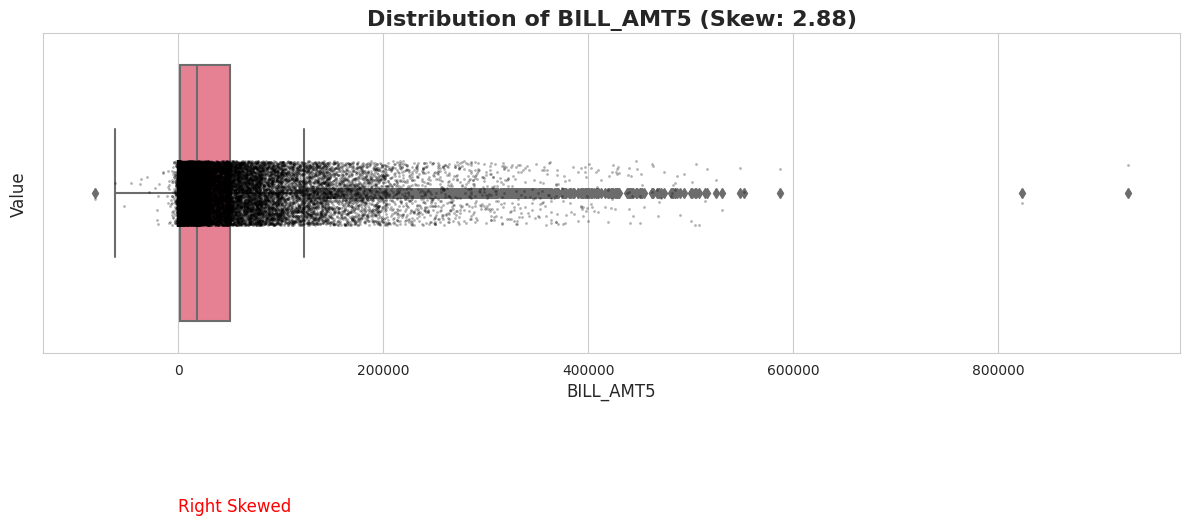

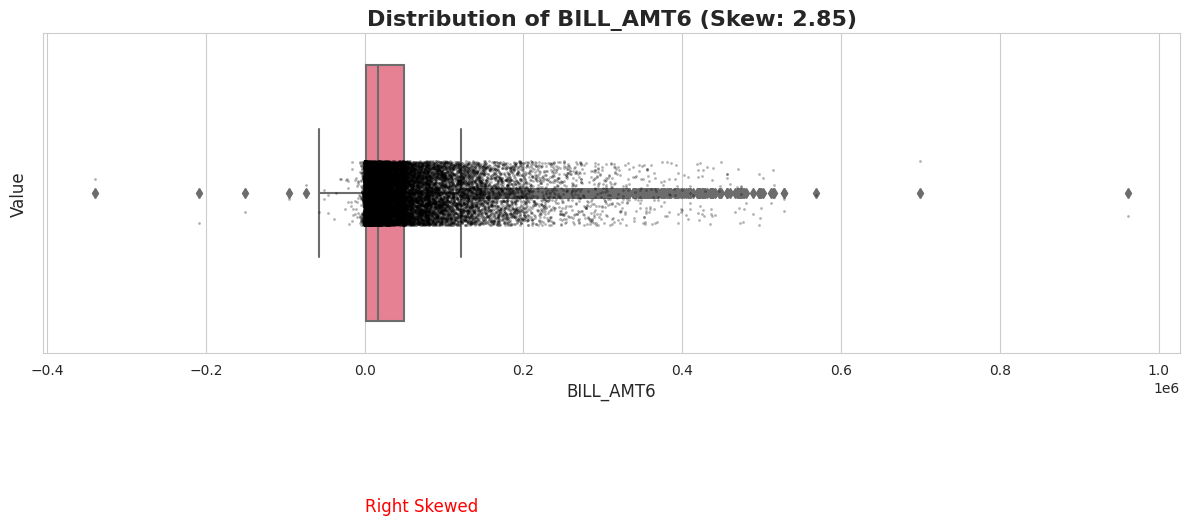

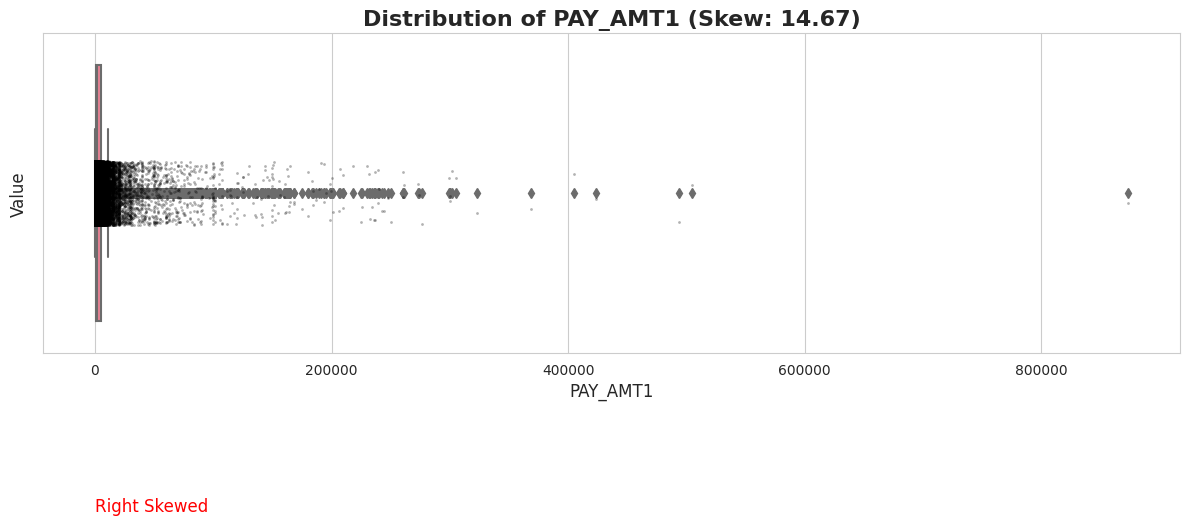

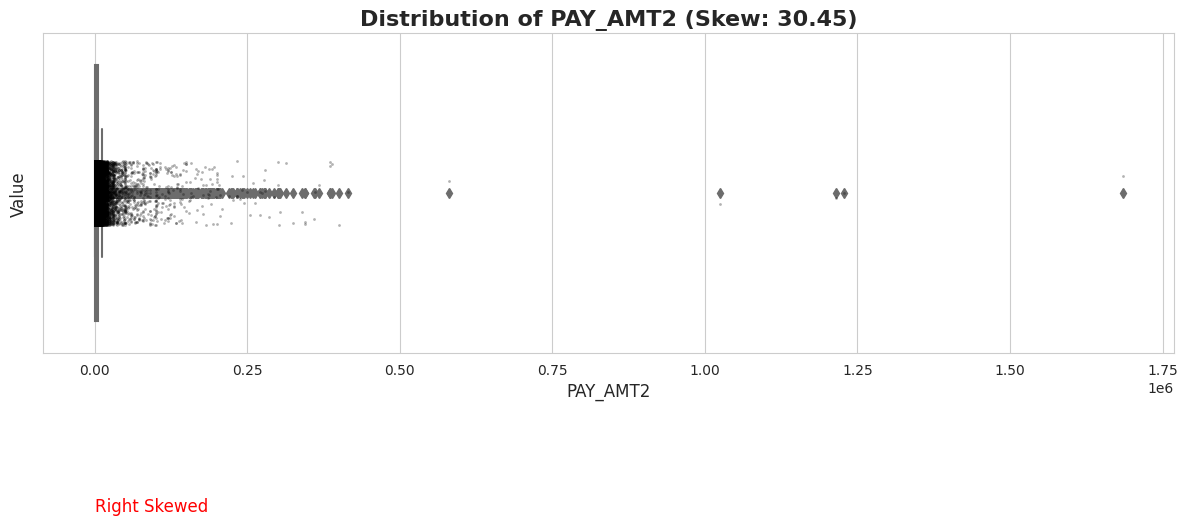

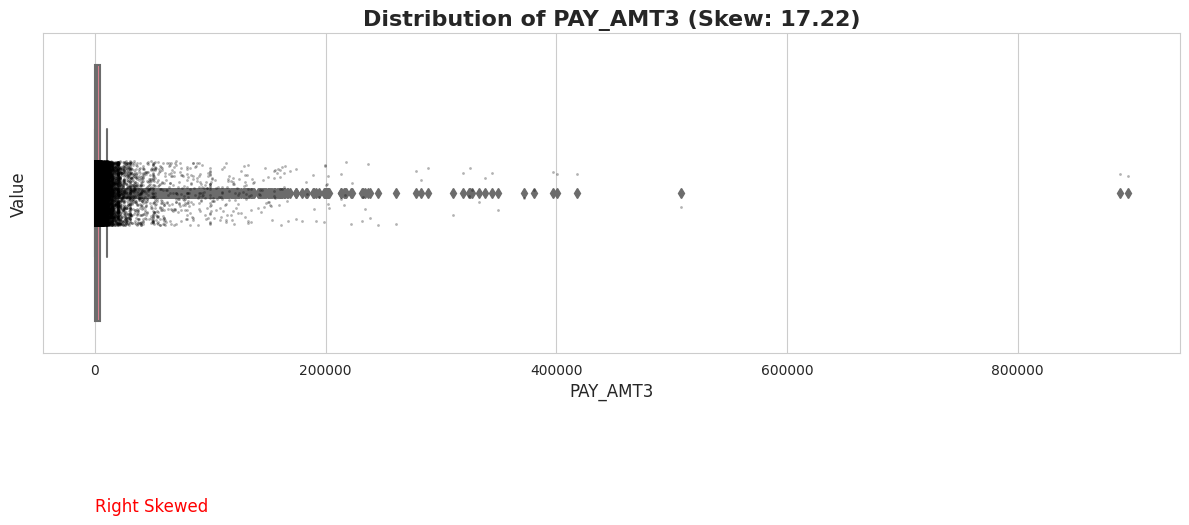

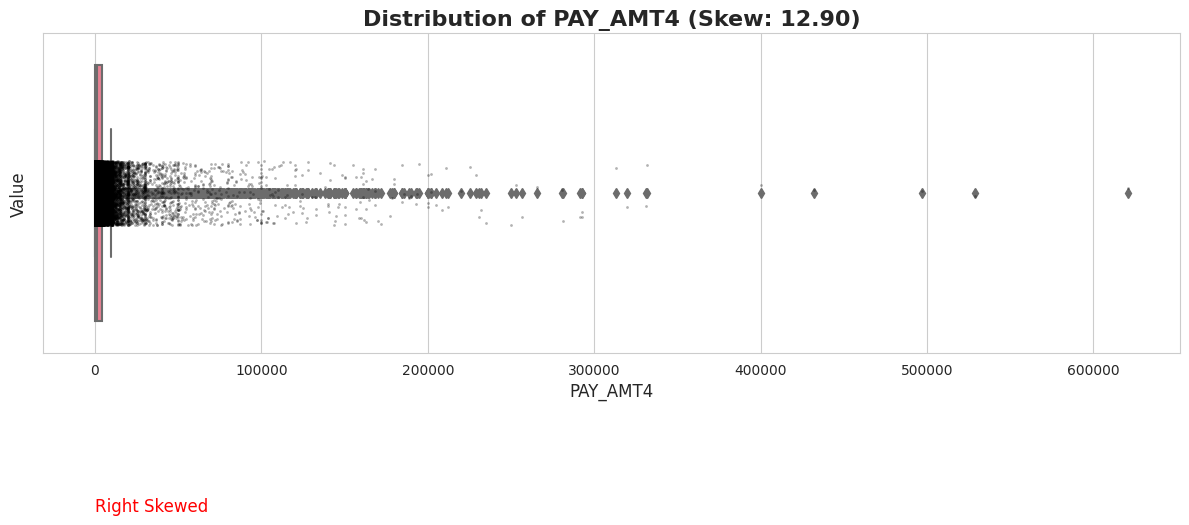

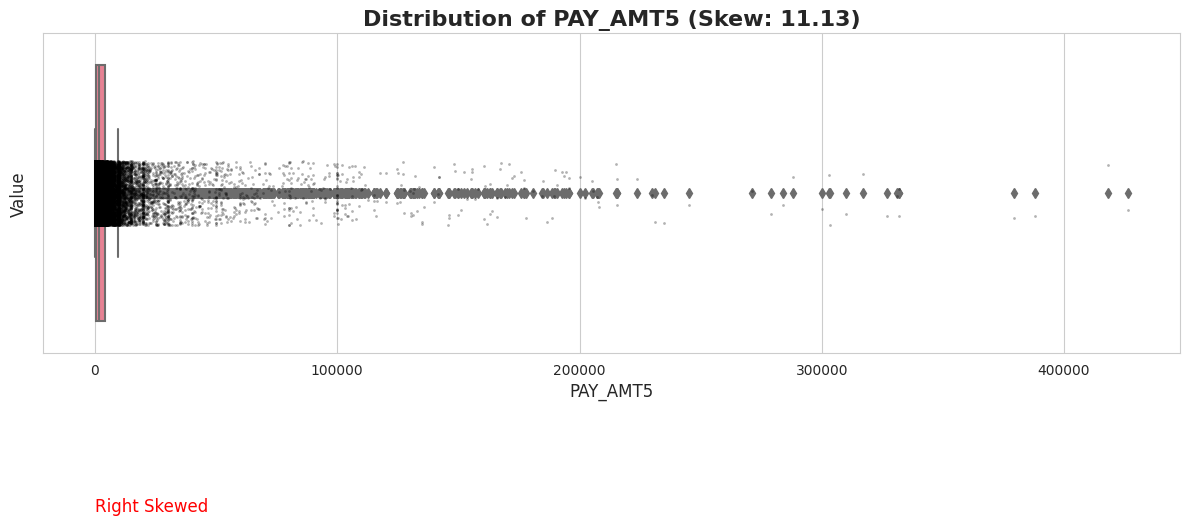

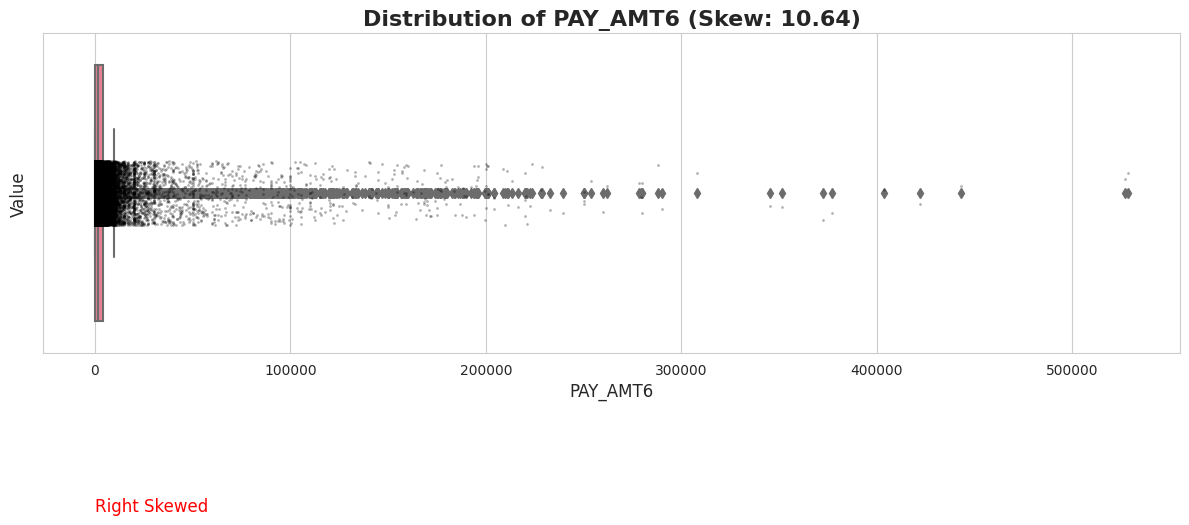

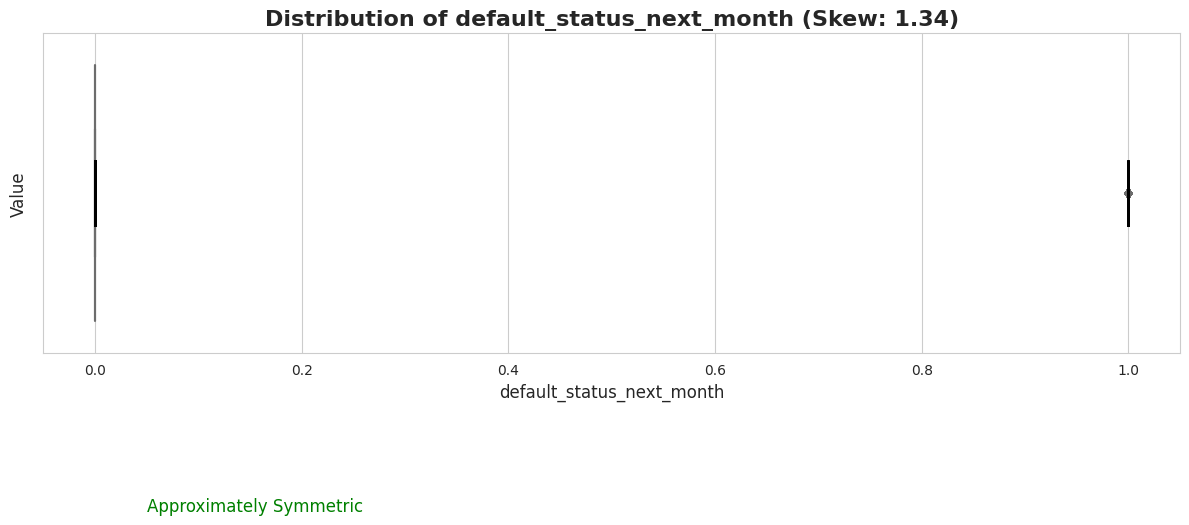

In [20]:
skewed_features = checking_for_outliers(payment_df, list())

In [21]:
skewed_features

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [23]:
numerical_features = []
categorical_features = []

for col in payment_df.columns:
    if payment_df[col].nunique() > 13:
        numerical_features.append(col)
    else:
        categorical_features.append(col)
        
print(f"Here are the numerical features: \n{numerical_features}")
print(f"Here are the categorical features: \n{categorical_features}")

Here are the numerical features: 
['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Here are the categorical features: 
['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_status_next_month']


**All the remaining features except those having categories should be handled using log transformation or box-cox transformation before which we're gonna remove the outliers.**

In [24]:
def remove_outliers(df):
    for col in numerical_features:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        
        df[col] = df[col].clip(lower_bound, upper_bound)
        
    return df

In [25]:
payment_df = remove_outliers(payment_df)

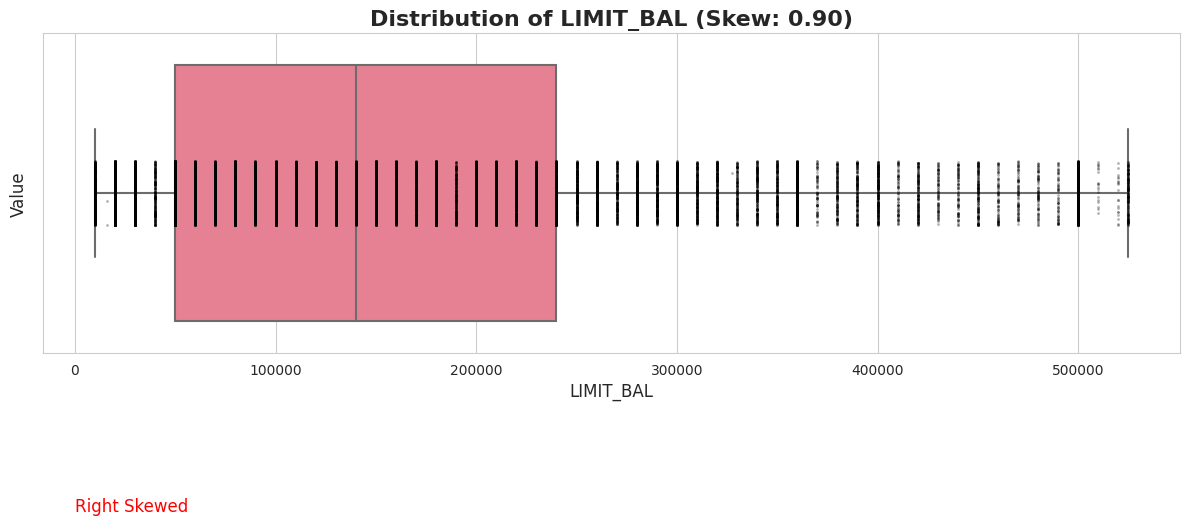

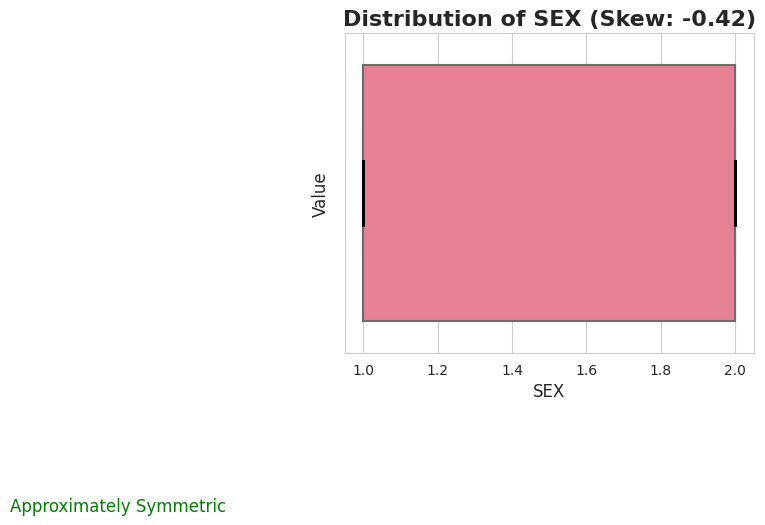

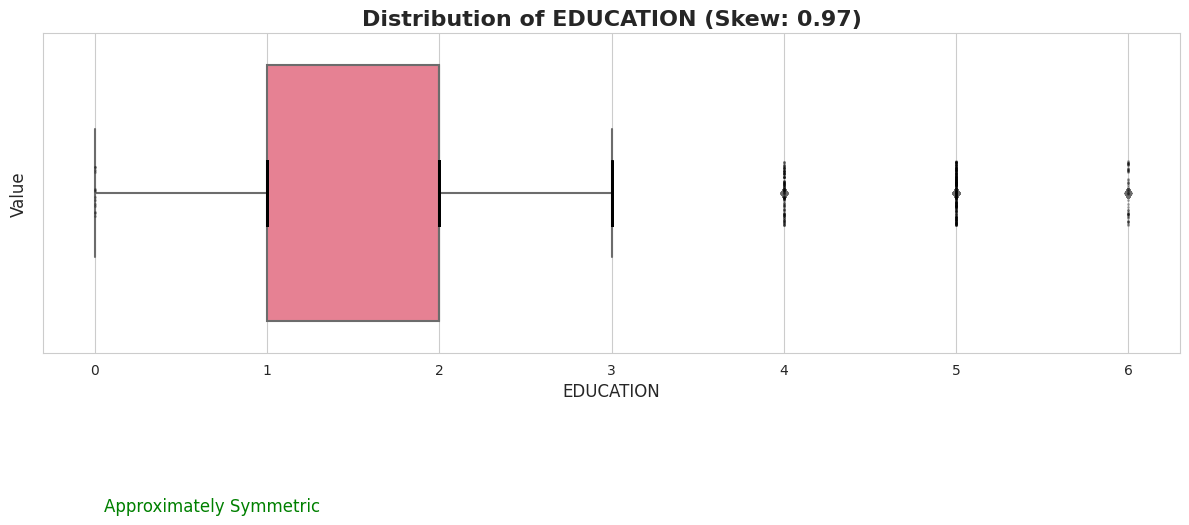

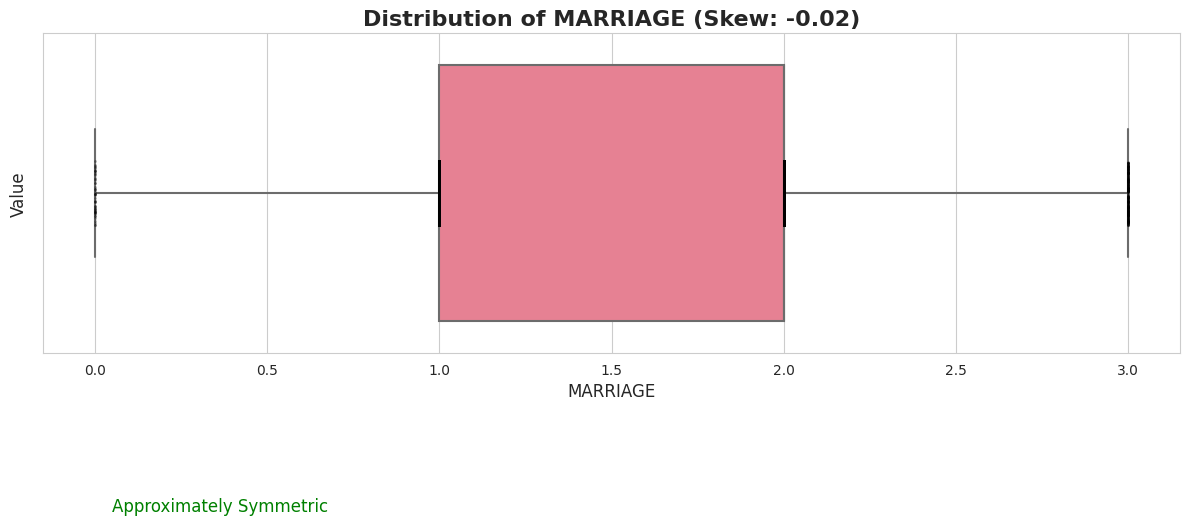

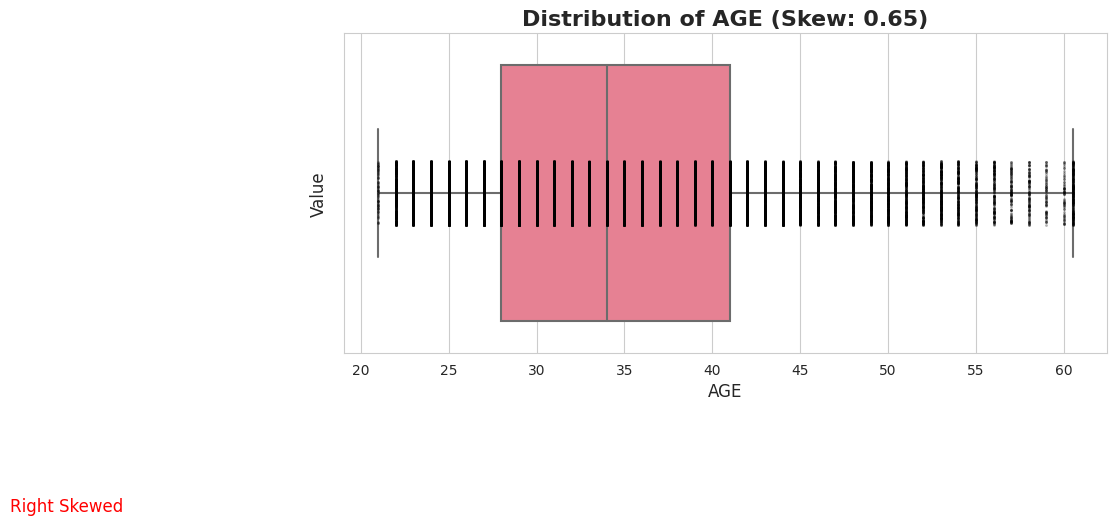

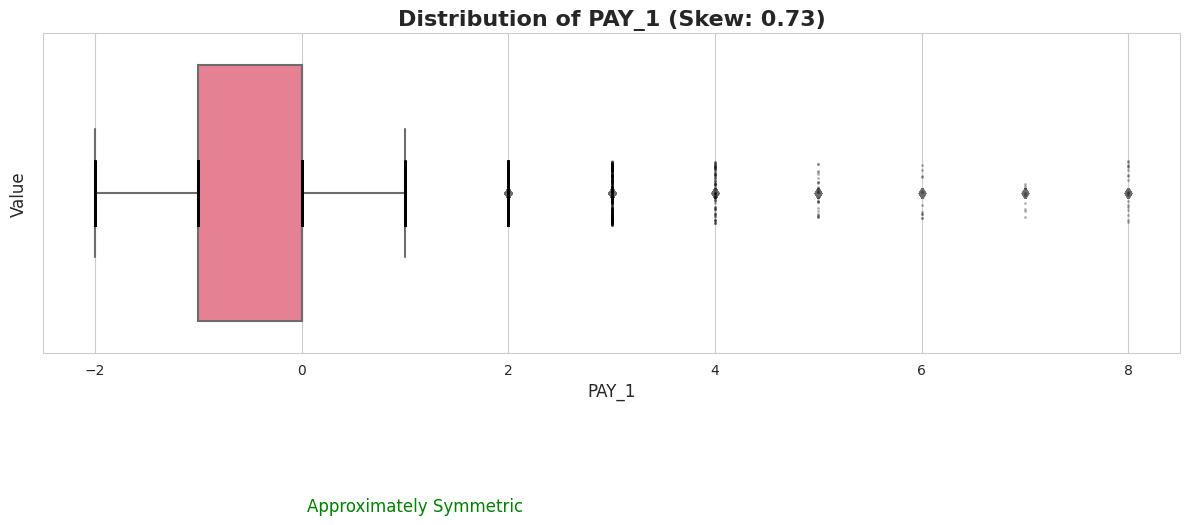

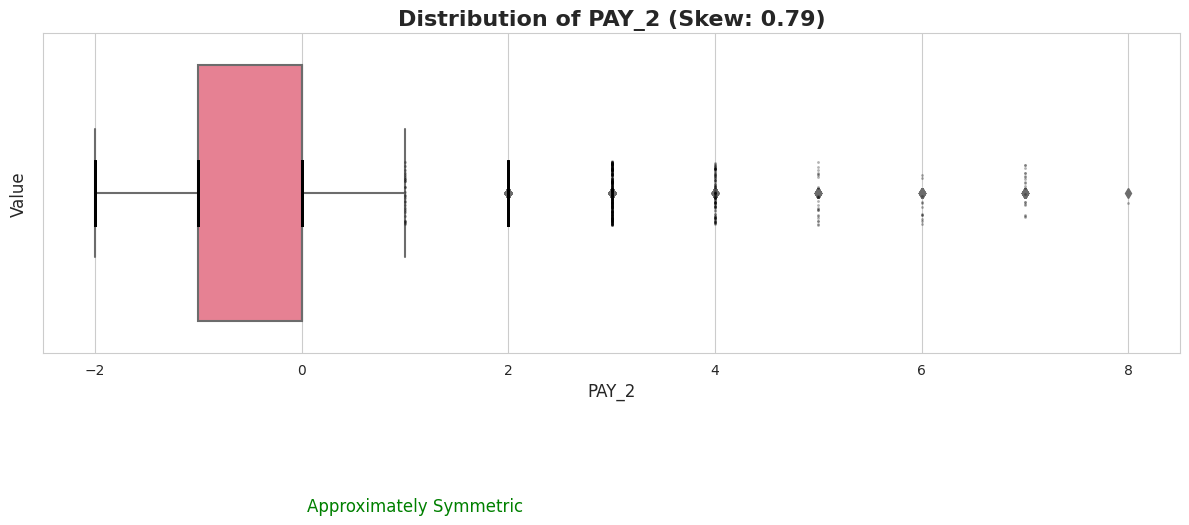

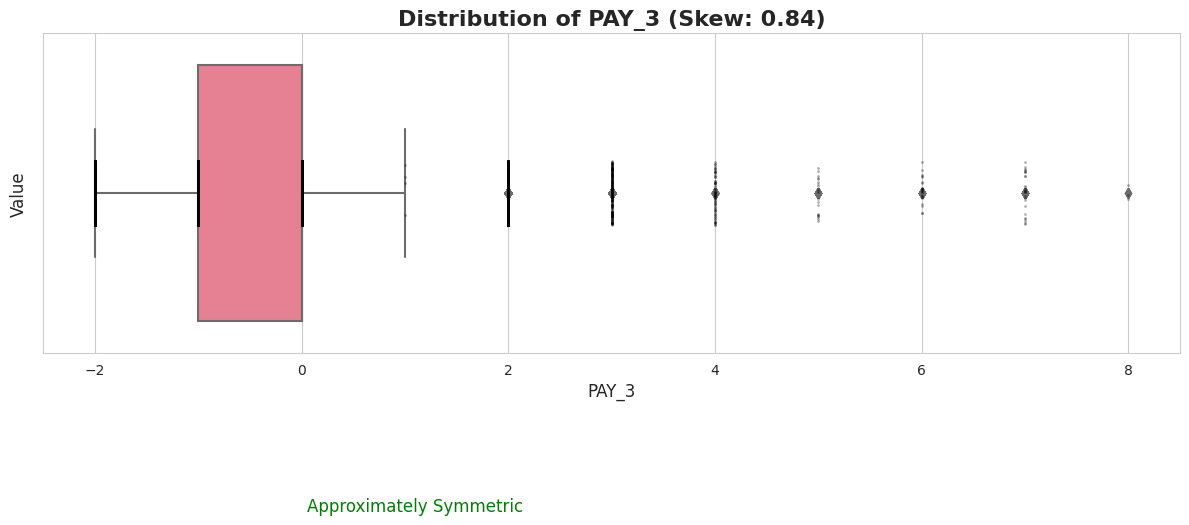

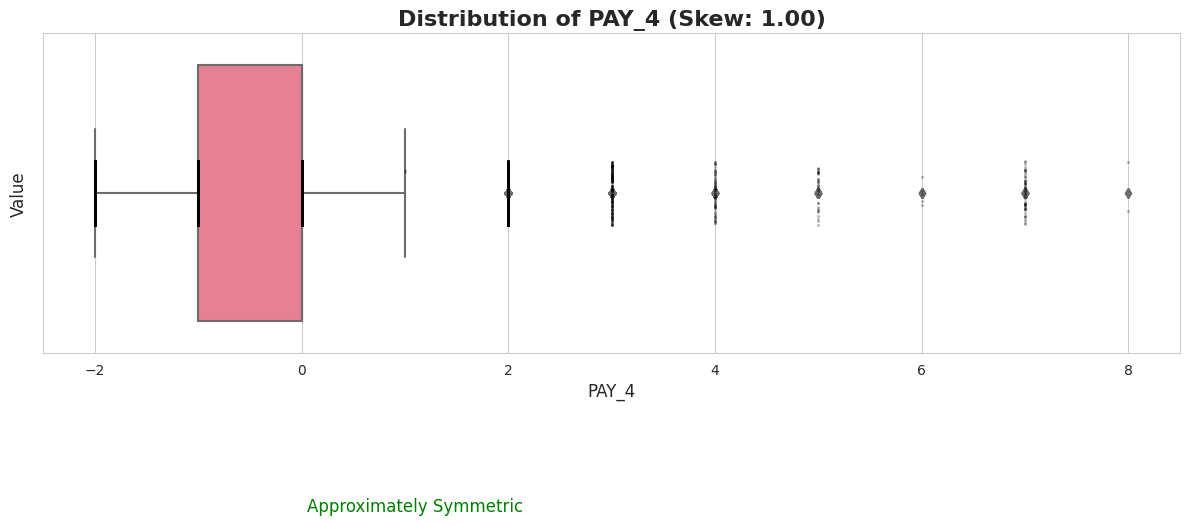

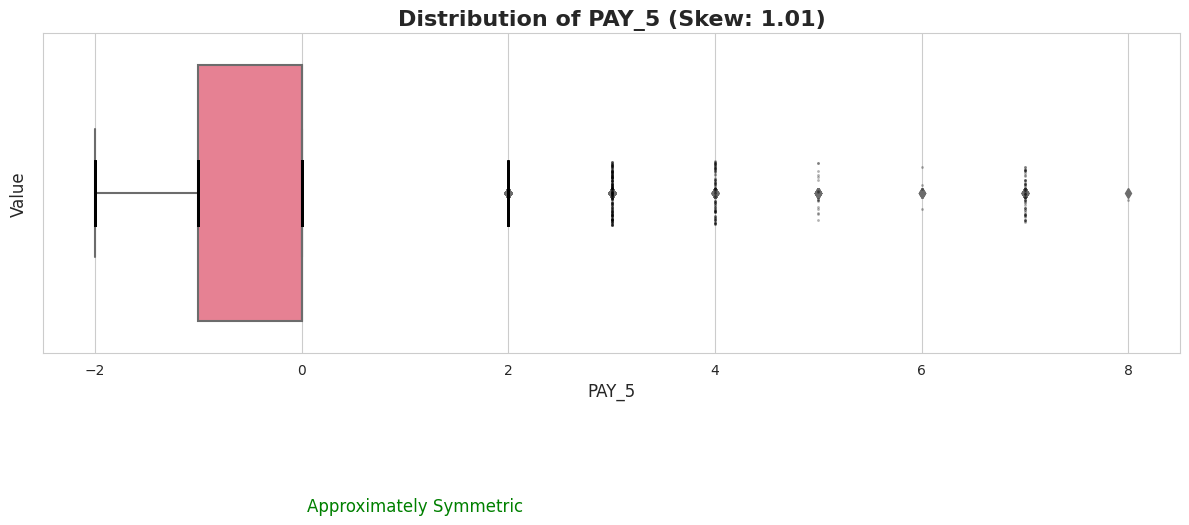

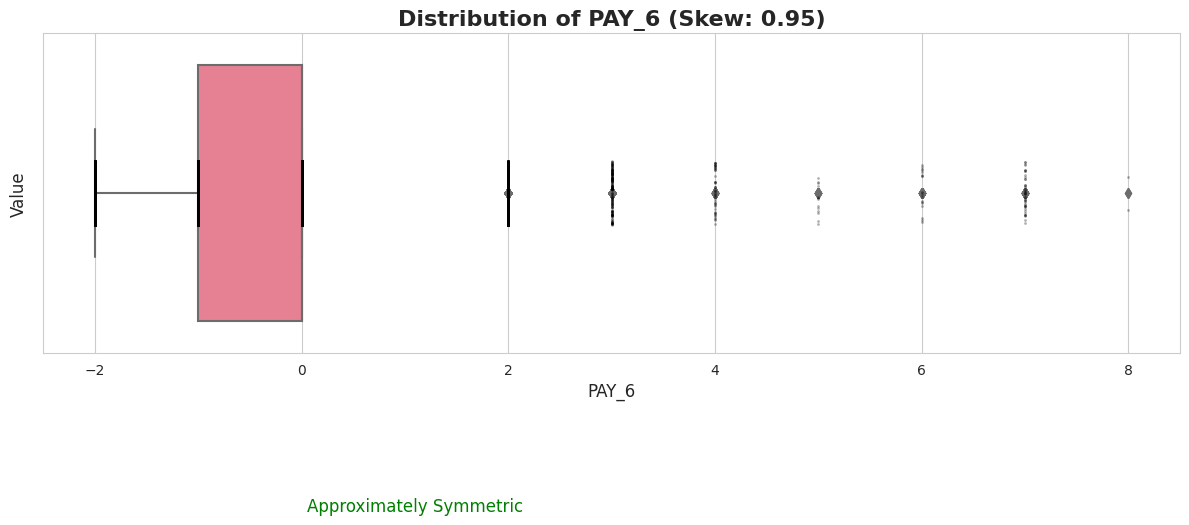

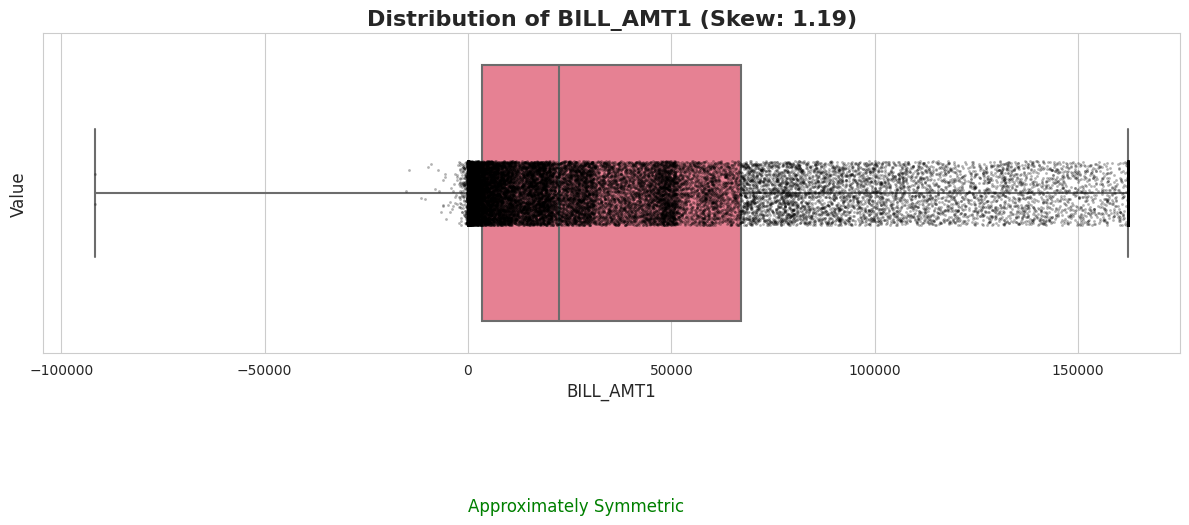

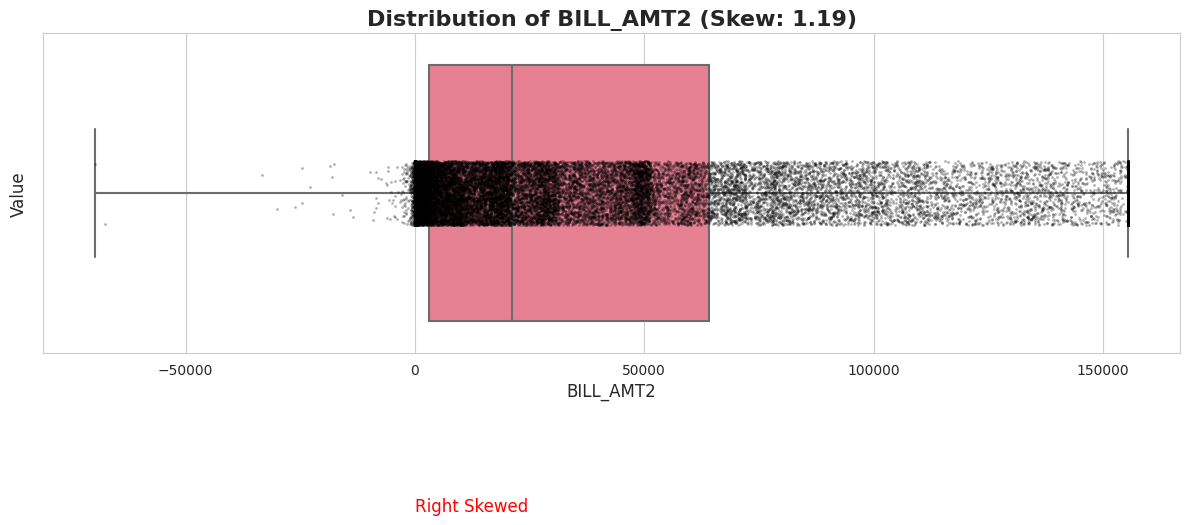

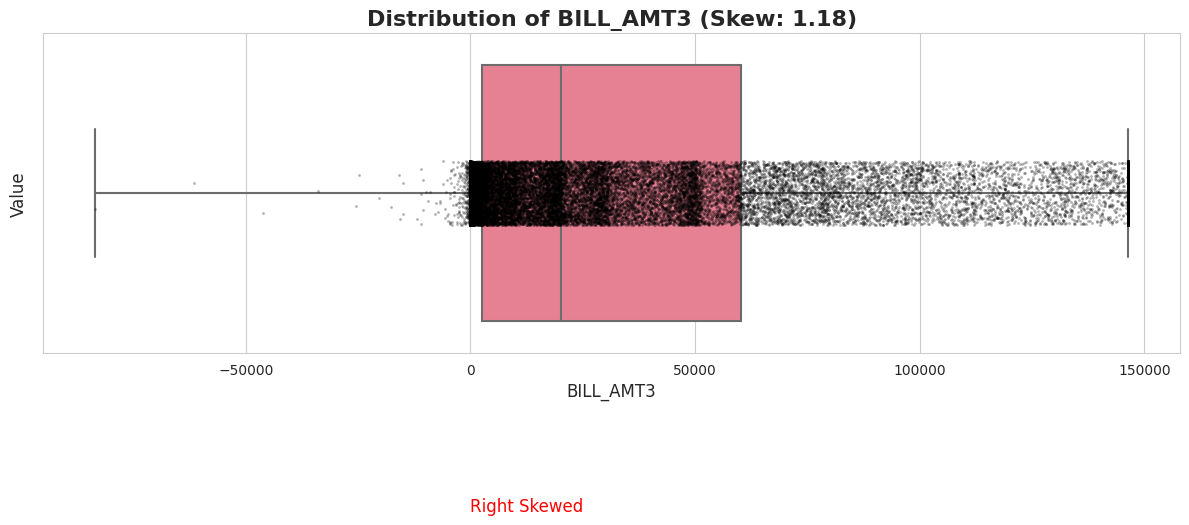

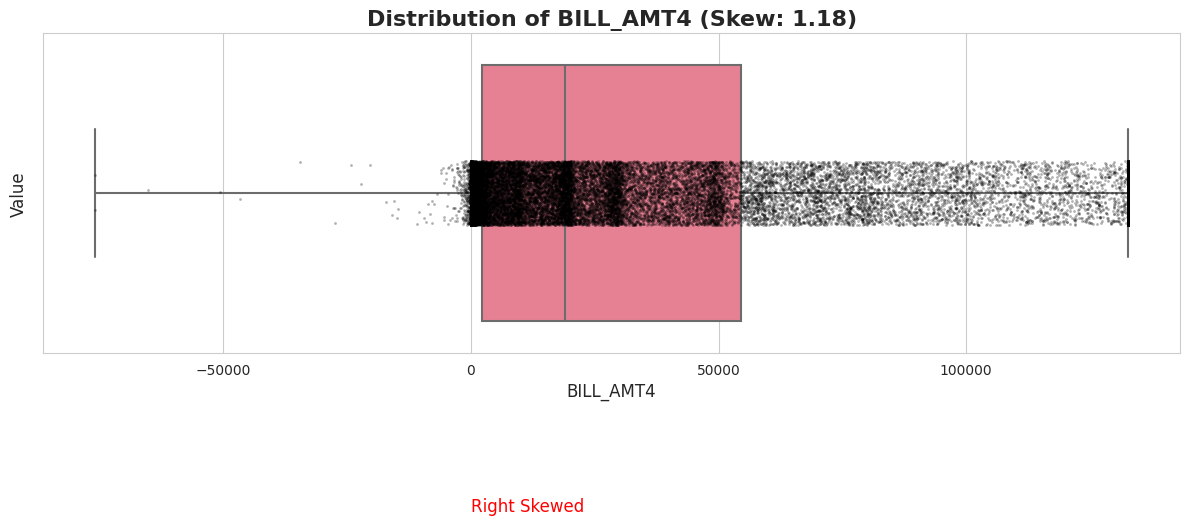

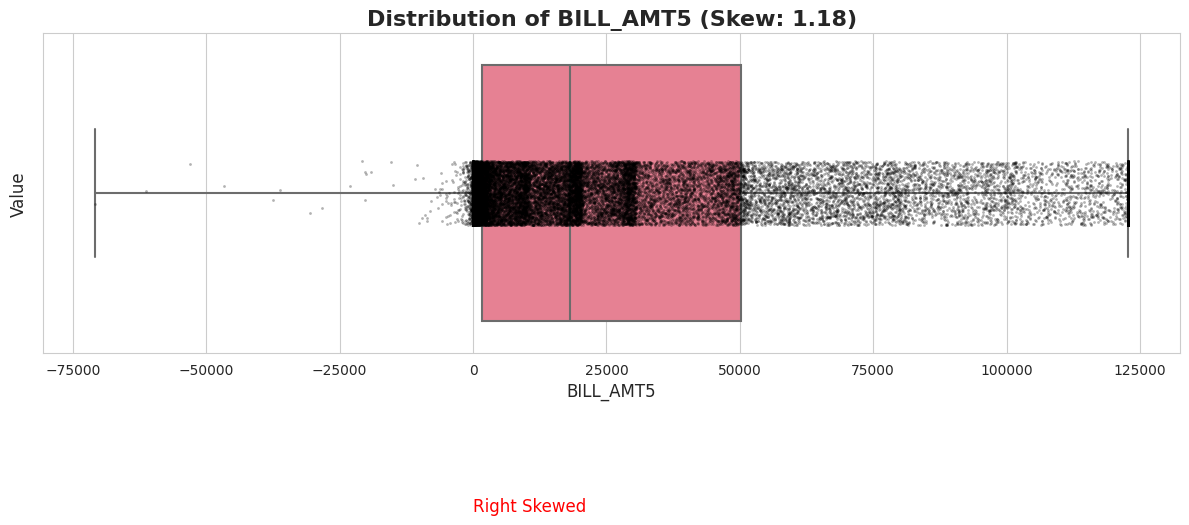

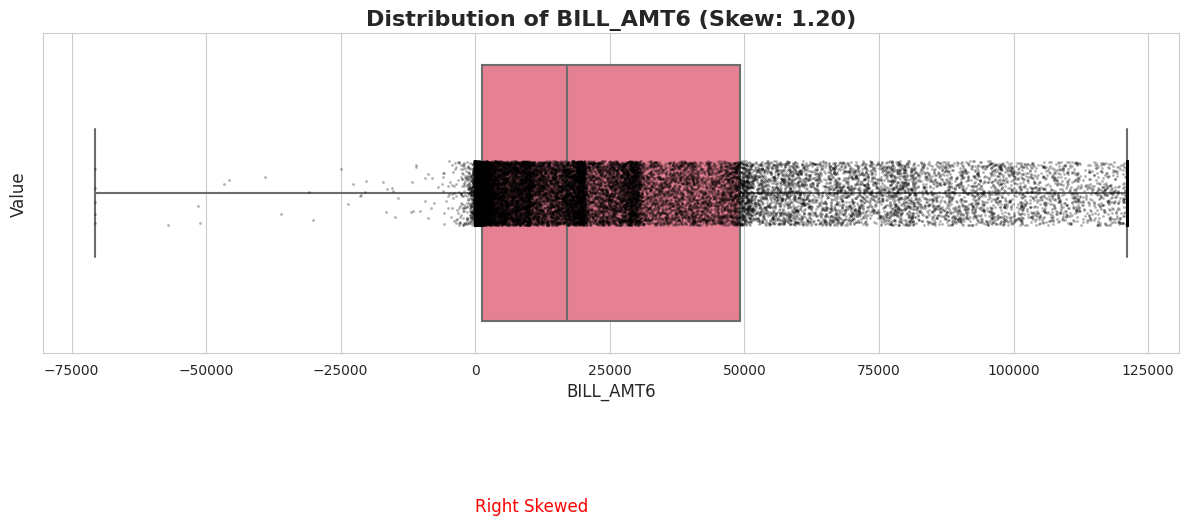

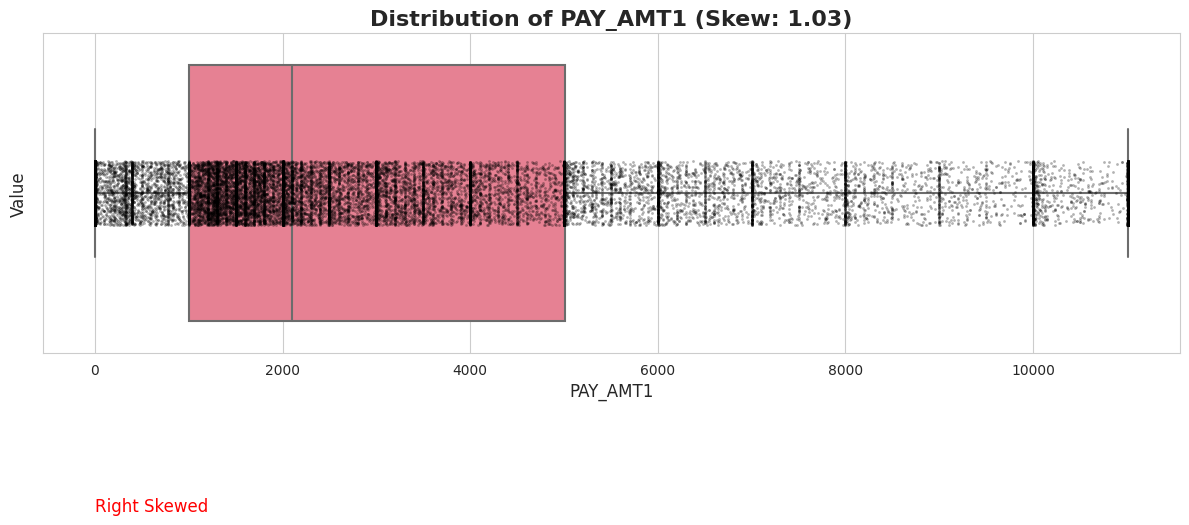

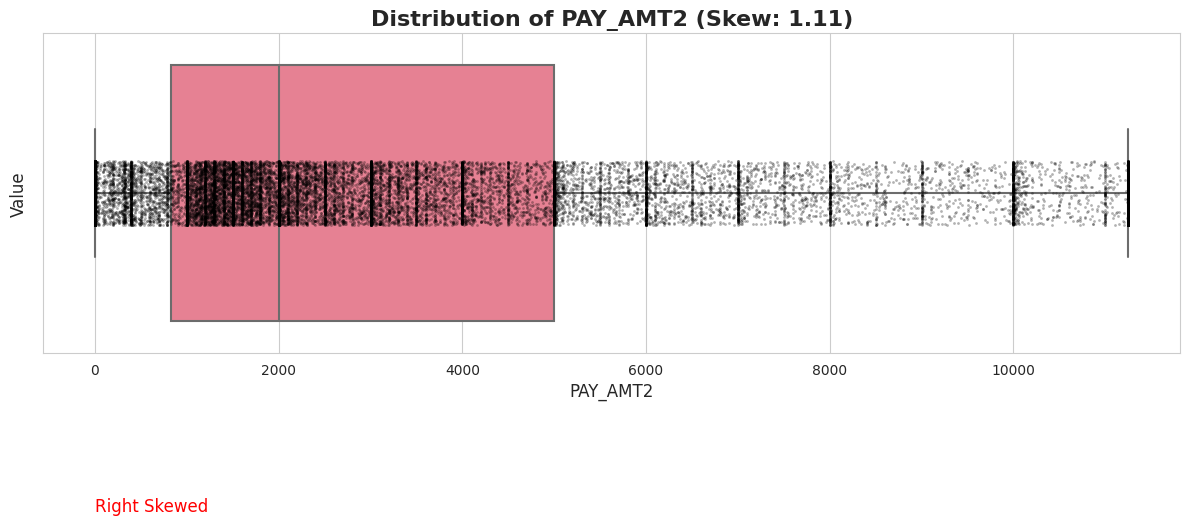

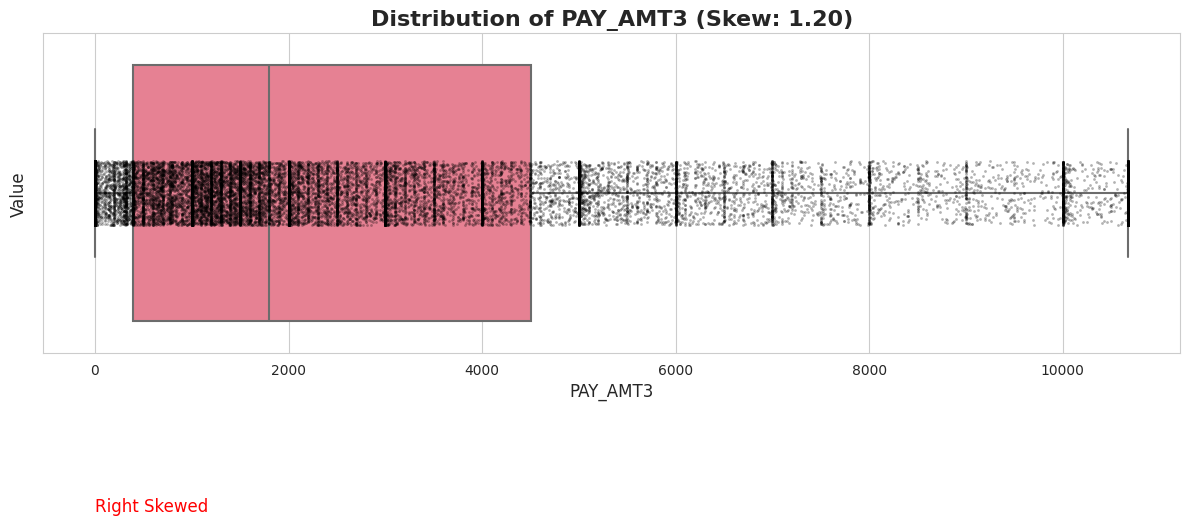

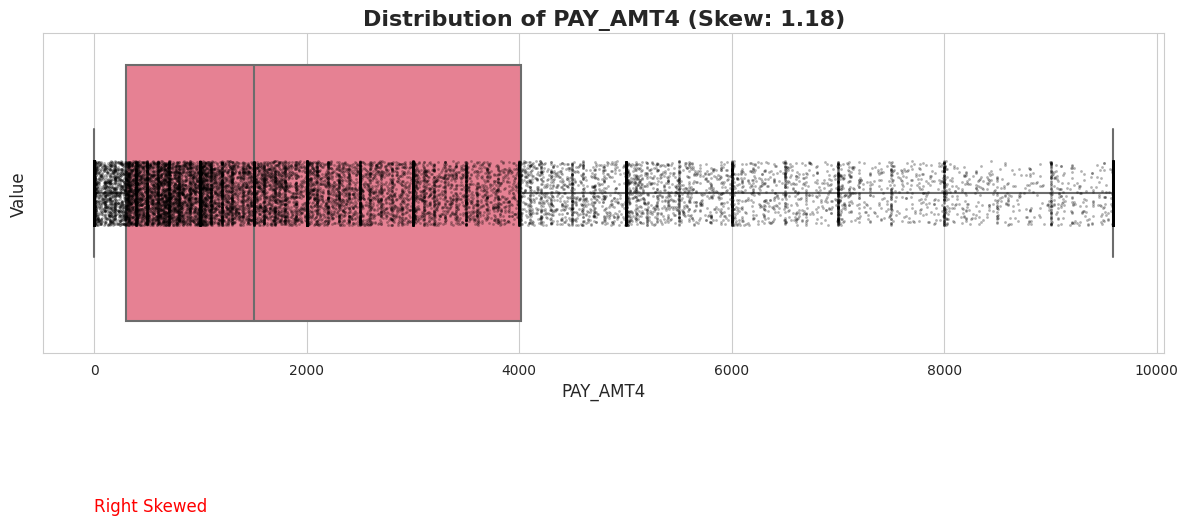

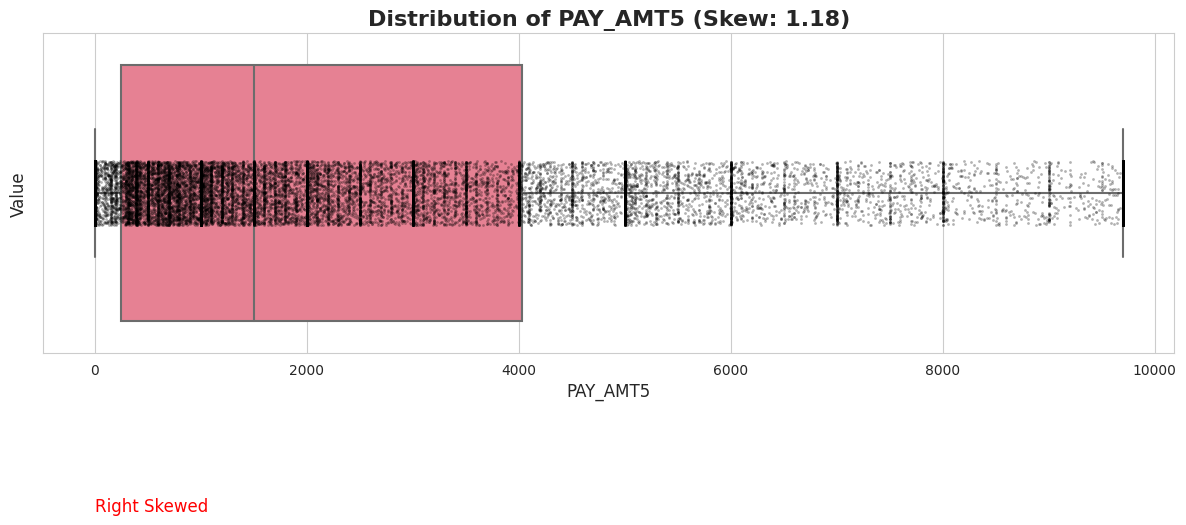

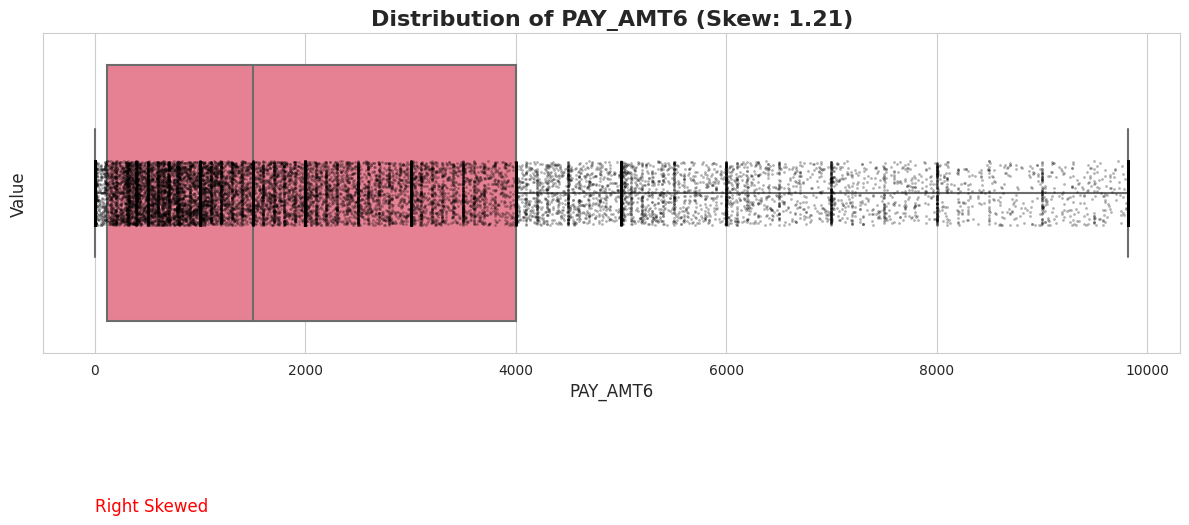

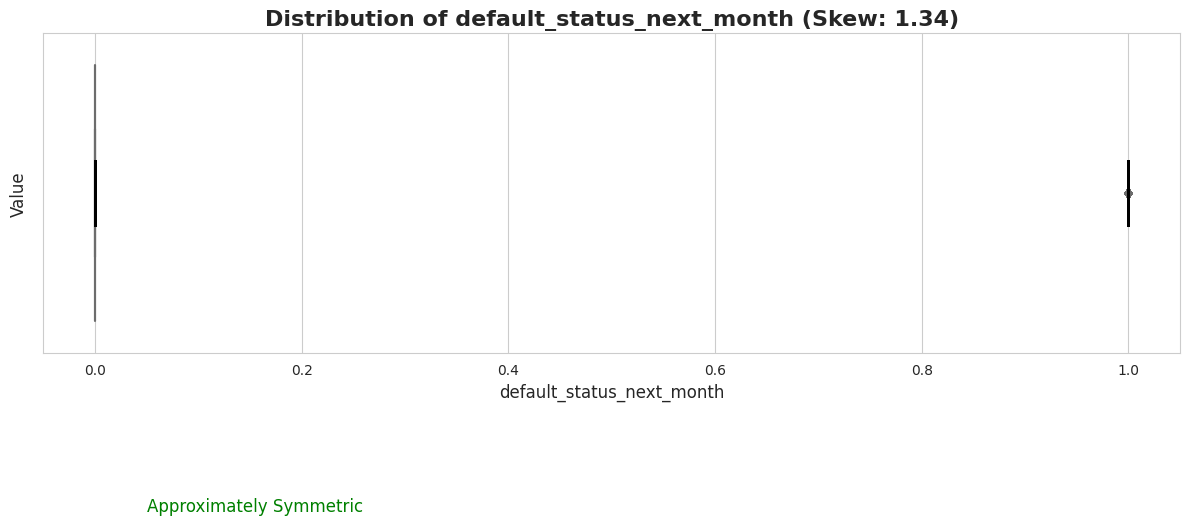

In [26]:
skewed_features = checking_for_outliers(payment_df, list())

**As we can see that the outliers are removed from all of numerical features, but skewness is still there.**

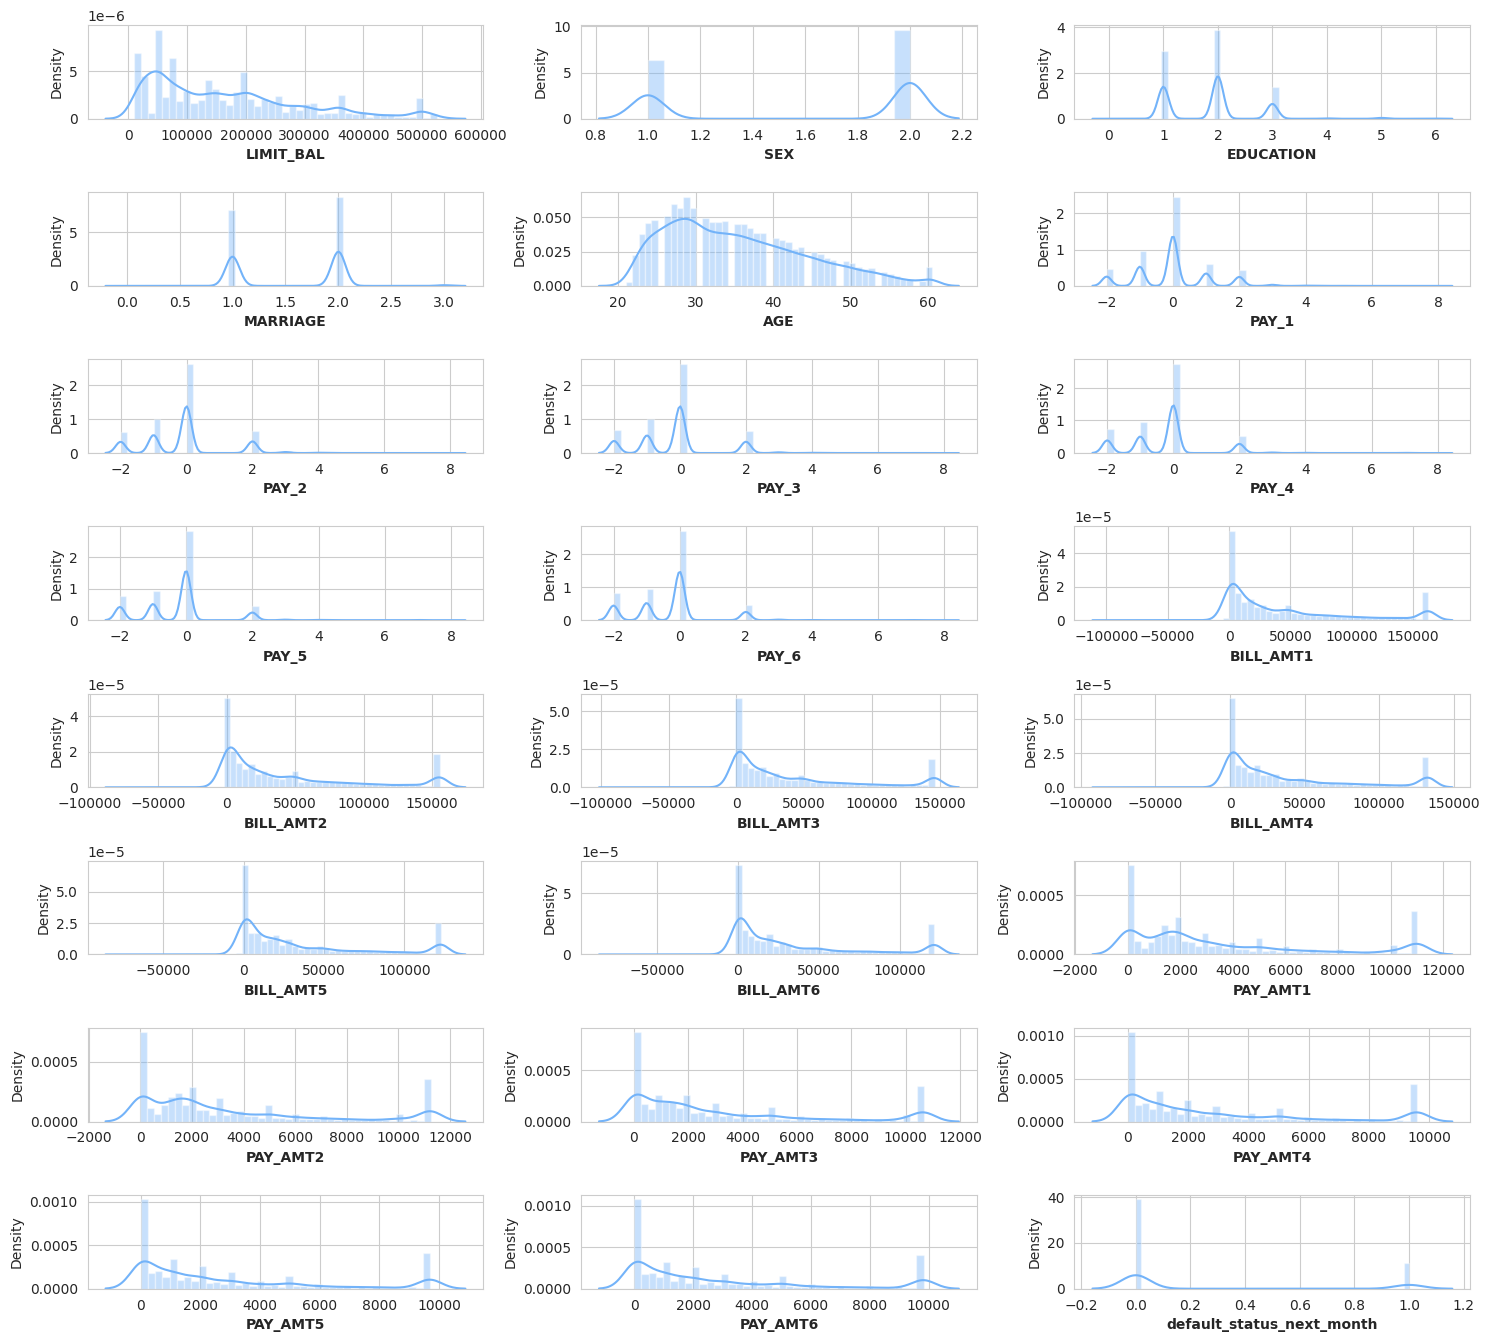

In [28]:
plt.figure(figsize = (15, 100))

for i, col in enumerate(payment_df.columns):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=payment_df[col], color='#73b3f9')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

**Now as It's clearly visible that after removing outliers thera is a shift in the distribution of the features as they follow more gaussian like distribution.**

In [30]:
payment_df = payment_df[payment_df["BILL_AMT1"] >= 0]

In [35]:
payment_df.shape

(29410, 24)

**Here we are dropping the instances having negative value in the very first bill statement because a person cannot have negative amount as bill in the very first month.**

In [31]:
## Let's deal with some undocumented and mislabeled categories
payment_df["EDUCATION"].value_counts()

EDUCATION
2    13815
1    10301
3     4835
5      278
4      116
6       51
0       14
Name: count, dtype: int64

In [32]:
payment_df["EDUCATION"] = payment_df["EDUCATION"].map(lambda x : 4 if x in (5, 6, 0) else x)

payment_df["EDUCATION"].value_counts()

EDUCATION
2    13815
1    10301
3     4835
4      459
Name: count, dtype: int64

In [33]:
payment_df["MARRIAGE"].value_counts()

MARRIAGE
2    15661
1    13377
3      318
0       54
Name: count, dtype: int64

In [34]:
payment_df["MARRIAGE"] = payment_df["MARRIAGE"].map(lambda x : 3 if x == 0 else x)

payment_df["MARRIAGE"].value_counts()

MARRIAGE
2    15661
1    13377
3      372
Name: count, dtype: int64

In [38]:
highly_correlated_features = find_high_correlations(payment_df, threshold=0.90, exclude_column='default_status_next_month')

if len(highly_correlated_features) == 0:
    print(f"There is no features pairs having correlation > 0.90")
else:
    print("Highly correlated feature pairs (correlation > 0.90):")
    for feat1, feat2, corr in highly_correlated_features:
        print(f"{feat1} - {feat2}: {corr:.2f}")

Highly correlated feature pairs (correlation > 0.90):
BILL_AMT1 - BILL_AMT2: 0.95
BILL_AMT5 - BILL_AMT6: 0.94
BILL_AMT2 - BILL_AMT3: 0.94
BILL_AMT4 - BILL_AMT5: 0.94
BILL_AMT3 - BILL_AMT4: 0.93
BILL_AMT1 - BILL_AMT3: 0.90


**Dropping all the features to deal with multicollinearity.**

In [39]:
payment_df.drop(columns=["BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"], axis=1, inplace=True)

### Splitting the Data into Train, Validation and Test

In [40]:
from sklearn.model_selection import train_test_split

test_size = 0.3
train_data, test_data = train_test_split(payment_df, stratify=payment_df.default_status_next_month, 
                                         test_size=test_size, random_state=42)

In [41]:
train_data.default_status_next_month.value_counts()

default_status_next_month
0    16018
1     4569
Name: count, dtype: int64

In [42]:
test_data.default_status_next_month.value_counts() * int((1 - test_size) / test_size)

default_status_next_month
0    13730
1     3916
Name: count, dtype: int64

In [43]:
train_data, validation_data = train_test_split(train_data, stratify=train_data.default_status_next_month,
                                               test_size=test_size, random_state=42)

train_data.default_status_next_month.value_counts()

default_status_next_month
0    11212
1     3198
Name: count, dtype: int64

In [44]:
validation_data.default_status_next_month.value_counts() * int((1 - test_size) / test_size)

default_status_next_month
0    9612
1    2742
Name: count, dtype: int64

In [45]:
X_train, y_train = train_data.drop(columns=["default_status_next_month"], axis=1), train_data["default_status_next_month"]
X_val, y_val = validation_data.drop(columns=["default_status_next_month"], axis=1), validation_data["default_status_next_month"]
X_test, y_test = test_data.drop(columns=["default_status_next_month"], axis=1), test_data["default_status_next_month"]

print(f"Shape of the train data: {train_data.shape}")
print(f"Shape of the X_train: {X_train.shape}")
print(f"Shape of the y_train: {y_train.shape}\n\n")

print(f"Shape of the test data: {test_data.shape}")
print(f"Shape of the X_test: {X_test.shape}")
print(f"Shape of the y_test: {y_test.shape}\n\n")

print(f"Shape of the validation data: {validation_data.shape}")
print(f"Shape of the X_val: {X_val.shape}")
print(f"Shape of the y_val: {y_val.shape}\n\n")

Shape of the train data: (14410, 19)
Shape of the X_train: (14410, 18)
Shape of the y_train: (14410,)


Shape of the test data: (8823, 19)
Shape of the X_test: (8823, 18)
Shape of the y_test: (8823,)


Shape of the validation data: (6177, 19)
Shape of the X_val: (6177, 18)
Shape of the y_val: (6177,)




In [46]:
## Let's do balancing on train_data
from imblearn.over_sampling import SMOTE

print(f"Distribution of the target feature before resampling: {y_train.value_counts()}")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Distribution of the target feature after resampling: {y_train_resampled.value_counts()}")

Distribution of the target feature before resampling: default_status_next_month
0    11212
1     3198
Name: count, dtype: int64
Distribution of the target feature after resampling: default_status_next_month
0    11212
1    11212
Name: count, dtype: int64


In [47]:
X_train_resampled.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    50000.0    2          1         2  28.0      0      0      0      0   
1    70000.0    2          3         2  29.0     -1     -1      2      0   
2    50000.0    1          3         1  47.0      0      0      2      0   
3   390000.0    1          1         1  33.0      0      0      0      0   
4    80000.0    2          3         2  39.0      0     -1     -1     -1   

   PAY_5  PAY_6  BILL_AMT1  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0      2    48726.0    2406.0    2000.0     462.0   736.000       0.0   
1      0      0    24336.0    3010.0       0.0     875.0   600.000    1000.0   
2      0      0    13244.0    2000.0    1000.0    1000.0  1000.000    1000.0   
3      0      0    17794.0    6000.0    5000.0    5000.0  4000.000    5000.0   
4     -1      0     4285.0    1866.0    5256.0    4451.0  9589.125    9000.0   

   PAY_AMT6  
0   147.000  
1   600.000  
2  1000.000  
3  8883.000  
4  9823.375

In [52]:
skewed_features = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [53]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

power_transformation = PowerTransformer(method="yeo-johnson", copy=False, standardize=True)
standard_scaler = StandardScaler()

power_pipeline = Pipeline(
    steps=[
        ("power_transformation", power_transformation)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("power_pipeline", power_pipeline, skewed_features),
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('power_pipeline',
                                 Pipeline(steps=[('power_transformation',
                                                  PowerTransformer(copy=False))]),
                                 ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6'])])

In [54]:
non_skewed_features = [x for x in list(X_train_resampled.columns) if x not in skewed_features]

In [55]:
cols_names = skewed_features + non_skewed_features

print("Before Transformation:")
print(X_train_resampled[skewed_features].head())

X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train_resampled), columns=cols_names)

print("After Transformation:")
print(X_train_preprocessed[skewed_features].head())

X_val_preprocessed = pd.DataFrame(preprocessor.transform(X_val), columns=cols_names)

X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test), columns=cols_names)

Before Transformation:
   LIMIT_BAL   AGE  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
0    50000.0  28.0    2406.0    2000.0     462.0   736.000       0.0   147.000
1    70000.0  29.0    3010.0       0.0     875.0   600.000    1000.0   600.000
2    50000.0  47.0    2000.0    1000.0    1000.0  1000.000    1000.0  1000.000
3   390000.0  33.0    6000.0    5000.0    5000.0  4000.000    5000.0  8883.000
4    80000.0  39.0    1866.0    5256.0    4451.0  9589.125    9000.0  9823.375
After Transformation:
   LIMIT_BAL       AGE  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0  -0.809917 -0.877064  0.245099  0.141555 -0.435112 -0.146493 -1.608220   
1  -0.492742 -0.721111  0.400166 -1.738633 -0.153079 -0.238326  0.008708   
2  -0.809917  1.263197  0.124939 -0.254651 -0.087757  0.000594  0.008708   
3   1.522530 -0.160878  0.950643  0.811518  0.913971  0.830044  0.983825   
4  -0.360582  0.531390  0.081583  0.853668  0.826260  1.525405  1.450133   

   PAY_AMT6  
0 -0.71621

In [56]:
X_train_preprocessed.head()

LIMIT_BAL       AGE  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0  -0.809917 -0.877064  0.245099  0.141555 -0.435112 -0.146493 -1.608220   
1  -0.492742 -0.721111  0.400166 -1.738633 -0.153079 -0.238326  0.008708   
2  -0.809917  1.263197  0.124939 -0.254651 -0.087757  0.000594  0.008708   
3   1.522530 -0.160878  0.950643  0.811518  0.913971  0.830044  0.983825   
4  -0.360582  0.531390  0.081583  0.853668  0.826260  1.525405  1.450133   

   PAY_AMT6  SEX  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
0 -0.716219  2.0        1.0       2.0    0.0    0.0    0.0    0.0    0.0   
1 -0.206572  2.0        3.0       2.0   -1.0   -1.0    2.0    0.0    0.0   
2  0.026996  1.0        3.0       1.0    0.0    0.0    2.0    0.0    0.0   
3  1.433736  1.0        1.0       1.0    0.0    0.0    0.0    0.0    0.0   
4  1.518515  2.0        3.0       2.0    0.0   -1.0   -1.0   -1.0   -1.0   

   PAY_6  BILL_AMT1  
0    2.0    48726.0  
1    0.0    24336.0  
2    0.0    13244.0  
3    0.0    17794.0  
4    0.0     4285.0

In [57]:
cols_name = list(X_train_preprocessed.columns)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
model_training(X_train_preprocessed, y_train_resampled, X_val_preprocessed, y_val, models)

SVC
Accuracy: 0.4572
Precision: 0.2295
Recall: 0.6134
F1 Score: 0.3341


DecisionTreeClassifier
Accuracy: 0.6884
Precision: 0.3553
Recall: 0.4960
F1 Score: 0.4140


KNeighborsClassifier
Accuracy: 0.5511
Precision: 0.2449
Recall: 0.4909
F1 Score: 0.3268


AdaBoostClassifier
Accuracy: 0.7298
Precision: 0.4207
Recall: 0.5770
F1 Score: 0.4866


GradientBoostingClassifier
Accuracy: 0.7609
Precision: 0.4684
Recall: 0.5733
F1 Score: 0.5156


RandomForestClassifier
Accuracy: 0.7904
Precision: 0.5286
Recall: 0.5128
F1 Score: 0.5205




In [103]:
model_performance

accuracy  precision    recall  f1_score  \
SVC                         0.745556   0.442997  0.585786  0.504482   
DecisionTreeClassifier      0.680317   0.339036  0.469490  0.393739   
KNeighborsClassifier        0.710476   0.389995  0.548457  0.455847   
AdaBoostClassifier          0.733810   0.424226  0.570711  0.486685   
GradientBoostingClassifier  0.762698   0.469679  0.567121  0.513821   
RandomForestClassifier      0.781905   0.507170  0.482412  0.494481   

                            training_time  prediction_time  total_time  
SVC                             20.187864         5.385752   25.573616  
DecisionTreeClassifier           0.522299         0.003546    0.525845  
KNeighborsClassifier             0.004738         1.241014    1.245753  
AdaBoostClassifier               2.660544         0.052151    2.712696  
GradientBoostingClassifier      10.935442         0.014944   10.950387  
RandomForestClassifier           7.146327         0.165380    7.311707

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train_preprocessed, y_train_resampled)

y_val_pred = classifier.predict(X_val_preprocessed)

In [105]:
y_val_pred_proba = classifier.predict_proba(X_val_preprocessed)[:, 1]

In [106]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7814
Precision: 0.5060
Recall: 0.4882
F1 Score: 0.4969
ROC AUC Score: 0.7457


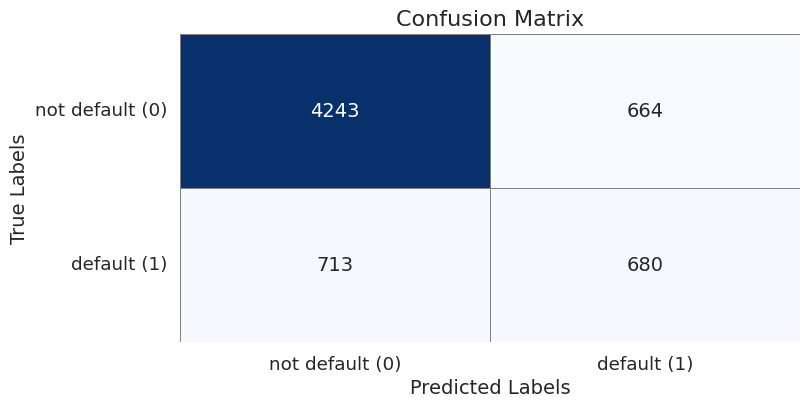

In [107]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

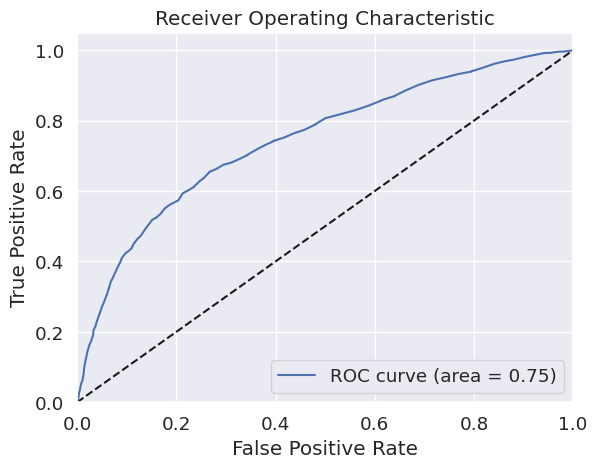

In [108]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [109]:
## Evaluating model performance on test dataset
y_test_pred = classifier.predict(X_test_preprocessed)
y_test_pred_proba = classifier.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7826
Precision: 0.5092
Recall: 0.4726
F1 Score: 0.4902
ROC AUC Score: 0.7465


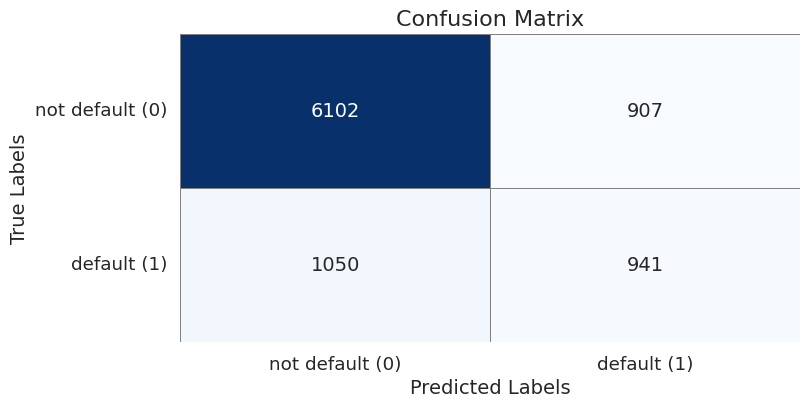

In [110]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

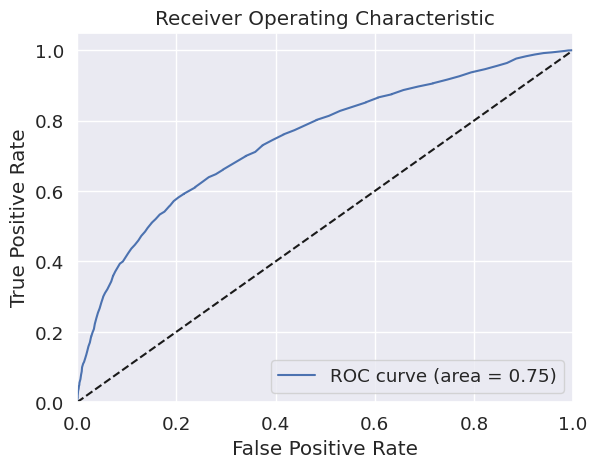

In [111]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Feature Importance for Random Forest Classifier')

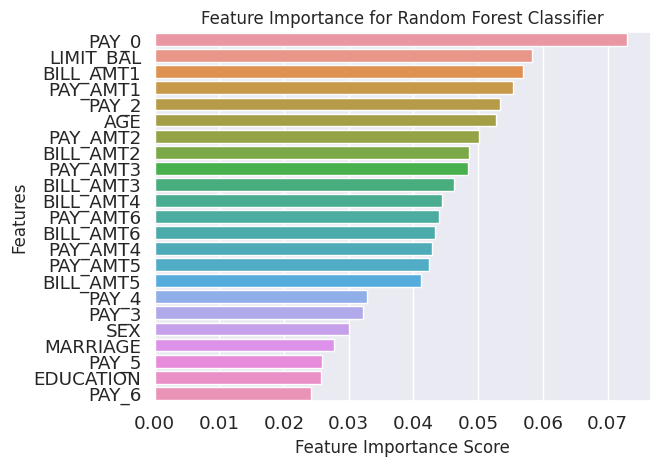

In [114]:
important_features = pd.Series(classifier.feature_importances_, index=list(X_train_preprocessed.columns)).sort_values(ascending=False)

sns.barplot(x = important_features, y=important_features.index)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance for Random Forest Classifier", fontsize=12)

In [115]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(classifier, threshold = 0.035)
important_features = selector.fit_transform(X_train_preprocessed, y_train_resampled)

selected_feature = X_train_preprocessed.columns[selector.get_support()]

print(f"selected features:\n {selected_feature}")

print(f"Old shape: {X_train_preprocessed.shape}\n")
print(f"New shape: {important_features.shape}")

selected features:
 Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2'],
      dtype='object')
Old shape: (22896, 23)

New shape: (22896, 16)


In [116]:
classifier.fit(important_features, y_train_resampled)

RandomForestClassifier(random_state=42)

In [117]:
X_val_preprocessed = selector.transform(X_val_preprocessed)

In [118]:
y_val_pred = classifier.predict(X_val_preprocessed)
y_val_pred_proba = classifier.predict_proba(X_val_preprocessed)[:, 1]

In [119]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7951
Precision: 0.5407
Recall: 0.4860
F1 Score: 0.5119
ROC AUC Score: 0.7457


In [120]:
X_train_preprocessed.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.363474 -1.535575   0.498382   0.546751   0.632441   0.661570   0.711067   
1  -0.643157  1.436019   0.005869   0.006519   0.045788   0.067845   0.105432   
2  -0.495349  0.875167   0.348494   0.421228   0.486468  -0.106605  -0.107469   
3   1.438416 -0.650210   4.078585   4.016751   3.870142   3.527569   3.835057   
4   0.645930  2.266367  -0.721119  -0.732766  -0.749146  -0.712085  -0.691027   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_AMT6  SEX  EDUCATION  MARRIAGE  \
0   0.737778  0.316967  0.355480  ...  0.581105  2.0        2.0       2.0   
1   0.104997  0.345265  0.602958  ...  0.479464  1.0        3.0       1.0   
2  -0.100671  0.361031  0.337064  ...  0.034822  2.0        3.0       2.0   
3   3.539191 -1.753086 -1.737913  ...  1.201837  2.0        2.0       2.0   
4  -0.661598 -1.753086 -1.737913  ... -0.334757  2.0        3.0       2.0   

   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3    4.0    3.0    2.0    0.0    0.0    0.0  
4   -1.0    3.0    2.0   -1.0   -1.0   -1.0  

[5 rows x 23 columns]

In [123]:
from lightgbm import LGBMClassifier

classifier = LGBMClassifier()

classifier.fit(X_train_preprocessed, y_train_resampled)

y_val_pred = classifier.predict(X_val_preprocessed)

[LightGBM] [Info] Number of positive: 11448, number of negative: 11448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3445
[LightGBM] [Info] Number of data points in the train set: 22896, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [124]:
y_val_pred_proba = classifier.predict_proba(X_val_preprocessed)[:, 1]

In [125]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7798
Precision: 0.5020
Recall: 0.5370
F1 Score: 0.5189
ROC AUC Score: 0.7578


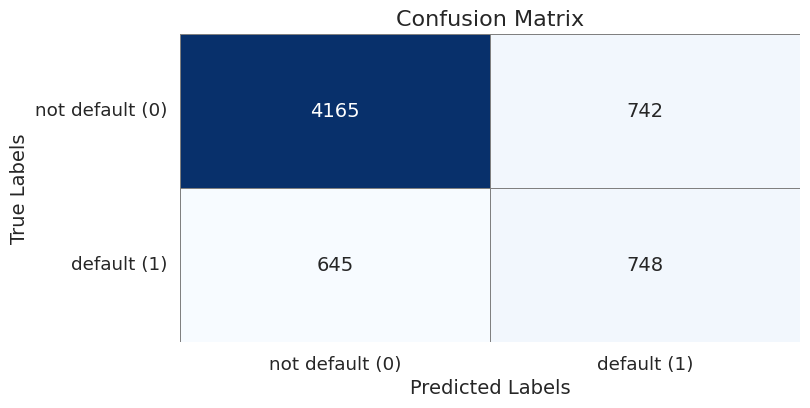

In [126]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

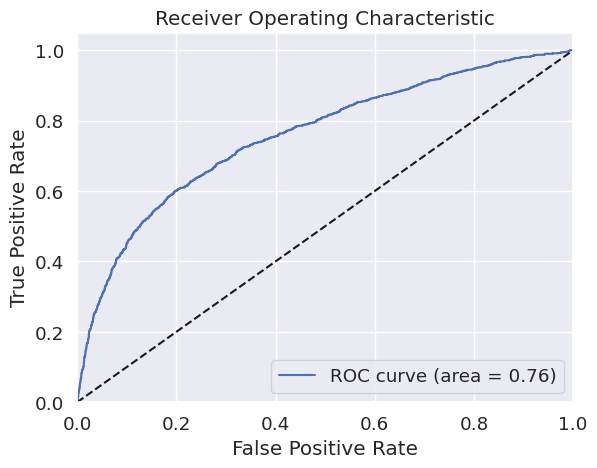

In [127]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [128]:
## Evaluating model performance on test dataset
y_test_pred = classifier.predict(X_test_preprocessed)
y_test_pred_proba = classifier.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7733
Precision: 0.4882
Recall: 0.5103
F1 Score: 0.4990
ROC AUC Score: 0.7555


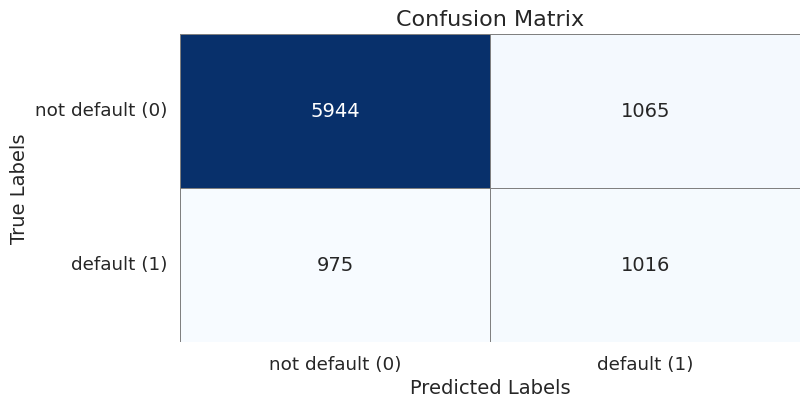

In [129]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

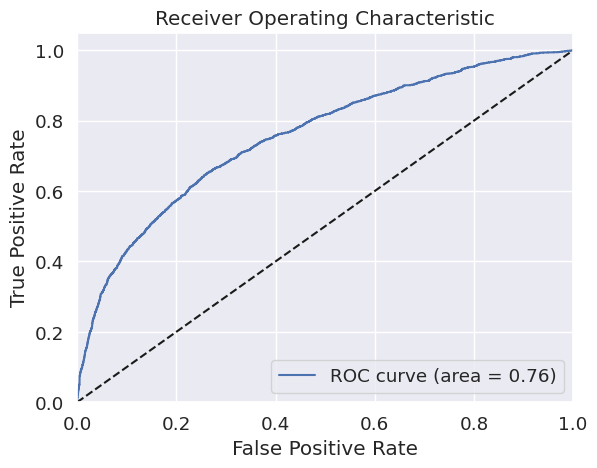

In [130]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Feature Importance for Random Forest Classifier')

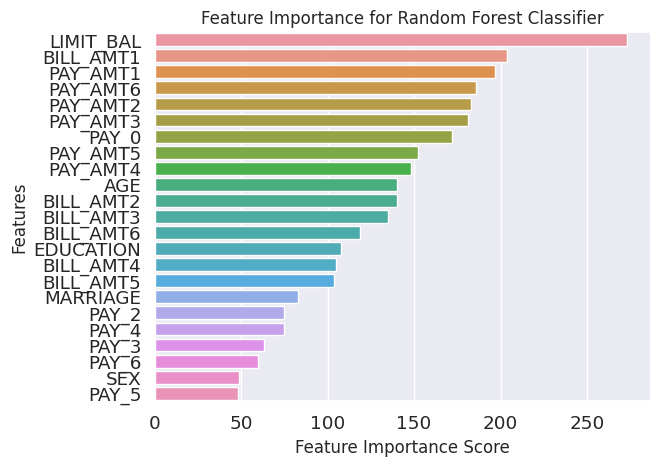

In [131]:
important_features = pd.Series(classifier.feature_importances_, index=list(X_train_preprocessed.columns)).sort_values(ascending=False)

sns.barplot(x = important_features, y=important_features.index)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance for Random Forest Classifier", fontsize=12)

In [132]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(classifier, threshold = 50)
important_features = selector.fit_transform(X_train_preprocessed, y_train_resampled)

selected_feature = X_train_preprocessed.columns[selector.get_support()]

print(f"selected features:\n {selected_feature}")

print(f"Old shape: {X_train_preprocessed.shape}\n")
print(f"New shape: {important_features.shape}")

[LightGBM] [Info] Number of positive: 11448, number of negative: 11448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3445
[LightGBM] [Info] Number of data points in the train set: 22896, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
selected features:
 Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION', 'MARRIAGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6'],
      dtype='object')
Old shape: (22896, 23)

New shape: (22896, 21)


In [133]:
classifier.fit(important_features, y_train_resampled)

[LightGBM] [Info] Number of positive: 11448, number of negative: 11448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3431
[LightGBM] [Info] Number of data points in the train set: 22896, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [134]:
X_val_preprocessed = selector.transform(X_val_preprocessed)

In [135]:
y_val_pred = classifier.predict(X_val_preprocessed)
y_val_pred_proba = classifier.predict_proba(X_val_preprocessed)[:, 1]

In [136]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7794
Precision: 0.5010
Recall: 0.5341
F1 Score: 0.5170
ROC AUC Score: 0.7589


In [139]:
X_val_preprocessed.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -1.252882  1.506525  -0.654988  -0.678292  -0.639997  -0.725652  -0.704258   
1   0.870449  0.783737  -1.098901  -4.183481  -9.607009   0.791216   2.409020   
2   0.308329  1.830127   0.442981   0.533927   0.576860   0.632508   0.724334   
3   0.645930  0.963449  -0.691663  -0.688371  -0.749146  -0.644267  -0.602936   
4  -0.812042  1.363355   0.050760  -0.083094  -0.246257  -0.510977  -0.535388   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_AMT6  SEX  EDUCATION  MARRIAGE  \
0  -0.672232 -1.753086 -0.040267  ... -1.571725  1.0        3.0       1.0   
1   2.200402 -1.427108 -1.343756  ...  0.766002  2.0        3.0       1.0   
2   0.758175  0.481813 -1.737913  ...  0.596412  1.0        2.0       1.0   
3  -0.610814  0.185950 -0.600681  ...  0.627725  2.0        2.0       1.0   
4  -0.531970  0.527261 -0.098524  ...  0.251967  2.0        3.0       1.0   

   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  
0   -1.0    2.0    0.0    0.0   -2.0   -2.0  
1    1.0   -2.0   -2.0   -1.0    0.0    0.0  
2    1.0    2.0    2.0    0.0    0.0    0.0  
3   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0  
4    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 23 columns]

In [140]:
X_train_copy = X_train_preprocessed.drop(["EDUCATION", "MARRIAGE", "SEX"], axis=1)
X_val_copy = X_val_preprocessed.drop(["EDUCATION", "MARRIAGE", "SEX"], axis=1)

X_train_copy.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.363474 -1.535575   0.498382   0.546751   0.632441   0.661570   0.711067   
1  -0.643157  1.436019   0.005869   0.006519   0.045788   0.067845   0.105432   
2  -0.495349  0.875167   0.348494   0.421228   0.486468  -0.106605  -0.107469   
3   1.438416 -0.650210   4.078585   4.016751   3.870142   3.527569   3.835057   
4   0.645930  2.266367  -0.721119  -0.732766  -0.749146  -0.712085  -0.691027   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   0.737778  0.316967  0.355480  0.436440  0.506288  0.523353  0.581105   
1   0.104997  0.345265  0.602958  0.373284  0.297786  0.717020  0.479464   
2  -0.100671  0.361031  0.337064  0.364104  0.165186  0.345763  0.034822   
3   3.539191 -1.753086 -1.737913  1.178220  1.272947  1.217634  1.201837   
4  -0.661598 -1.753086 -1.737913 -0.491178 -0.388051 -0.391013 -0.334757   

   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3    4.0    3.0    2.0    0.0    0.0    0.0  
4   -1.0    3.0    2.0   -1.0   -1.0   -1.0

In [141]:
X_test_copy = X_test_preprocessed.drop(["EDUCATION", "MARRIAGE", "SEX"], axis=1)
X_test_copy.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   0.817284 -0.499477   0.773350   0.719708   0.682071   0.209013   0.199164   
1  -0.363474 -0.218920  -0.628751  -0.630683  -0.654453  -0.592166  -0.597010   
2  -0.134863 -0.650210   1.582566   0.628621   0.585901   0.371433   0.365420   
3  -2.057856  0.382443  -0.661164  -0.672787  -0.679172  -0.648633  -0.624163   
4  -0.033978  0.037128  -0.302132  -0.242494  -0.179087  -0.151019  -0.040259   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   0.174543  0.649659  0.533494  0.269681  0.346456  0.452342  0.191577   
1  -0.603404 -1.753086 -1.737913  0.730273 -1.612844 -1.613690 -1.571725   
2   0.289909  2.916625  0.499446  0.264625  0.334679  0.345998  1.561118   
3  -0.612566 -1.753086 -1.737913 -0.327897 -0.307003 -1.613690 -0.935178   
4   0.056228  0.127218  0.161848  0.126901  0.809936  0.950514 -1.571725   

   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1   -1.0    3.0    2.0   -1.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3   -1.0    4.0    3.0    2.0    2.0    2.0  
4    0.0    0.0    0.0    0.0    0.0    0.0

In [302]:
x = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

def handle_PAY_X(df):
    for i in x:
        df[i] = df[i].map(lambda x : 1 if x > 1 else x)
        
handle_PAY_X(X_train_copy)
handle_PAY_X(X_val_copy)
handle_PAY_X(X_test_copy)

In [307]:
X_train_copy.PAY_4.value_counts()

PAY_4
0.0    18786
1.0     4110
Name: count, dtype: int64

In [39]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "SVC" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "XGBClassifier" : XGBClassifier(),
    "LGBMClassifier" : LGBMClassifier(),
    "CatBoostClassifier" : CatBoostClassifier()
}

In [305]:
model_training(X_train_copy, y_train_resampled, X_val_copy, y_val, models)

SVC
Accuracy: 0.7590
Precision: 0.4652
Recall: 0.6001
F1 Score: 0.5241


DecisionTreeClassifier
Accuracy: 0.6851
Precision: 0.3429
Recall: 0.4630
F1 Score: 0.3940


KNeighborsClassifier
Accuracy: 0.6973
Precision: 0.3720
Recall: 0.5363
F1 Score: 0.4393


AdaBoostClassifier
Accuracy: 0.7392
Precision: 0.4337
Recall: 0.5872
F1 Score: 0.4989


GradientBoostingClassifier
Accuracy: 0.7671
Precision: 0.4788
Recall: 0.5987
F1 Score: 0.5321


RandomForestClassifier
Accuracy: 0.7862
Precision: 0.5173
Recall: 0.4939
F1 Score: 0.5053


XGBClassifier
Accuracy: 0.7560
Precision: 0.4519
Recall: 0.4853
F1 Score: 0.4680


[LightGBM] [Info] Number of positive: 11448, number of negative: 11448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 22896, number of used features: 20
[LightGBM] [Info] [binary:

In [306]:
## after removing the undocumented and converting PAY_X features to 0 and 1
model_performance

accuracy  precision    recall  f1_score  \
SVC                         0.759048   0.465220  0.600144  0.524138   
DecisionTreeClassifier      0.685079   0.342903  0.463029  0.394013   
KNeighborsClassifier        0.697302   0.372012  0.536253  0.439283   
AdaBoostClassifier          0.739206   0.433722  0.587222  0.498933   
GradientBoostingClassifier  0.767143   0.478760  0.598708  0.532057   
RandomForestClassifier      0.786190   0.517293  0.493898  0.505325   
XGBClassifier               0.756032   0.451872  0.485284  0.467982   
LGBMClassifier              0.769683   0.481898  0.554200  0.515526   
CatBoostClassifier          0.775873   0.493603  0.526202  0.509382   

                            training_time  prediction_time  total_time  
SVC                             20.590148         5.437606   26.027755  
DecisionTreeClassifier           0.523687         0.004153    0.527840  
KNeighborsClassifier             0.005202         1.073512    1.078714  
AdaBoostClassifier               2.370131         0.045169    2.415300  
GradientBoostingClassifier      10.271547         0.013478   10.285025  
RandomForestClassifier           7.764533         0.148419    7.912952  
XGBClassifier                    0.839166         0.020473    0.859639  
LGBMClassifier                   0.775459         0.046680    0.822139  
CatBoostClassifier               8.088702         0.013723    8.102424

In [361]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def objective(trial):
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    
    model = RandomForestClassifier(
        **params,
        random_state=42
    )
    
    def custom_scorer(y_true, y_pred):
        precision = precision_score(y_true=y_true, y_pred=y_pred)
        recall = recall_score(y_true=y_true, y_pred=y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)
        
        return (precision + recall + roc_auc) / 3
    
    scores = cross_val_score(model, X_train_resampled_copy, y_train_resampled, cv=5, scoring=make_scorer(custom_scorer))
    
    return scores.mean()

In [362]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"\nBest Hyperparameter: {best_params}")

[I 2024-06-30 14:38:25,369] A new study created in memory with name: no-name-9ac852ce-70be-435d-a71a-a9abcef61918
[I 2024-06-30 14:39:17,670] Trial 0 finished with value: 0.7923993306622205 and parameters: {'n_estimators': 197, 'max_depth': 28, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7923993306622205.
[I 2024-06-30 14:39:47,701] Trial 1 finished with value: 0.782861356334225 and parameters: {'n_estimators': 119, 'max_depth': 27, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7923993306622205.
[I 2024-06-30 14:40:23,602] Trial 2 finished with value: 0.7935940754299228 and parameters: {'n_estimators': 135, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 2 with value: 0.7935940754299228.
[I 2024-06-30 14:41:17,364] Trial 3 finished with value: 0.8237746489629838 and parameters: {'n_estimators': 180, 'max_depth': 20,


Best Hyperparameter: {'n_estimators': 102, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


In [363]:
best_score = study.best_value
print(f"\nBest custom score (average of precision, recall and roc_auc_score): {best_score}")


Best custom score (average of precision, recall and roc_auc_score): 0.834242453566252


In [368]:
randomFC = RandomForestClassifier(**best_params, random_state=42)

randomFC.fit(X_train_resampled_copy, y_train_resampled)

y_test_pred = randomFC.predict(X_test_copy)
y_test_pred_proba = randomFC.predict_proba(X_test_copy)[:, 1]

In [369]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7824
Precision: 0.5088
Recall: 0.4776
F1 Score: 0.4927
ROC AUC Score: 0.7500
